In [6]:
#importing python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.metrics import r2_score
from scipy import stats
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')#ignores all generated warnings
from sklearn.model_selection import GridSearchCV
# import xgboost as xgb
import shap
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

#import warnings
#warnings.filterwarnings('ignore')
import sweetviz as sv

## Iporting data nd QC 238 features:

In [393]:
output_path='Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Replicated Output\\'

 

model_build_data_v5_D_1_2=pd.read_parquet(output_path+"Development_Data_238_Variables.parquet")
model_build_data_v5_D_3=pd.read_parquet(output_path+"OOT_1_Data_238_Variables.parquet")
model_build_data_v5_D_4=pd.read_parquet(output_path+"OOT_2_Data_238_Variables.parquet")

 
var_list_238=model_build_data_v5_D_1_2.columns[4:]
print(len(var_list_238))

print("Dimension of the development (Train_Test) data: ", model_build_data_v5_D_1_2.shape)
model_build_data_v5_D_1_2.head()

df_dev=model_build_data_v5_D_1_2.copy()
display(df_dev.head())

# X_train, X_test, y_train, y_test = train_test_split(model_build_data_v5_D_1_2[var_list_238], model_build_data_v5_D_1_2['DPD90IN24'], test_size=0.3, random_state=42)

238
Dimension of the development (Train_Test) data:  (793589, 242)


,ID,DPD90IN24,YYYY_MM,FICTBV10_SCORE,P13_ALL2011,P13_ALL2183,P13_ALL2184,P13_ALL2639,P13_ALL2887,P13_ALL4028,...,TBCC2310,TRTR3502,TRTR3601,TRTR3625,P13_ALL0448,P13_ALL6400,P13_FIP8120,P13_RTA7110,TBCC3304,TCOL3572
0,43022146870.0_6231766587.0,0.0,2017-06,656.0,0.0,NaN,NaN,0.0,0.0,131.0,...,0.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,4.0,NaN
1,19007188326.0_6199468014.0,0.0,2017-06,663.0,7.0,0.0,0.0,4.0,0.0,141.0,...,NaN,0.0,-180.0,0.0,6.0,400.0,NaN,7.0,NaN,NaN
2,35493838750.0_6178585467.0,0.0,2017-06,637.0,0.0,0.0,1.0,0.0,0.0,23.0,...,0.0,0.0,NaN,NaN,1.0,400.0,NaN,9.0,1.0,NaN
3,19224701819.0_6159146304.0,0.0,2017-06,643.0,0.0,1.0,1.0,2.0,0.0,114.0,...,0.0,0.0,-105.0,5.0,3.0,400.0,77.0,2.0,5.0,NaN
4,30168483295.0_6219366909.0,0.0,2017-06,648.0,3.0,NaN,NaN,0.0,0.0,91.0,...,NaN,0.0,-158.0,1.0,3.0,1.0,NaN,9.0,NaN,NaN


In [396]:
len(model_build_data_v5_D_3)

121537

In [397]:
len(model_build_data_v5_D_4)

391215

In [182]:
df_dev.columns

file = open('238_cols.txt','w')
for column in list(df_dev.columns):
    file.write(column+"\n")

file.close()

### Report generation using Sweetviz: 

In [ ]:
#creating a EDA report using sweetviz
import sweetviz as sv
analyze_report = sv.analyze(df_dev,pairwise_analysis="off")

#Change open_browser to TRUE if you intend to display the report in browser

analyze_report.show_html('sweetviz_EDA.html', open_browser= True ) 
 

In [ ]:
## EDA
### Exploratory analysis of the data and genefrate the whole quality check report of the final data used : 

In [ ]:
## Set the path for the data analysis output : 

data_report_output_path='Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Data_QC\\'


writer = pd.ExcelWriter(data_report_output_path+"data_Report_238.xlsx", engine='xlsxwriter')



# writer.save()


# Select the final variables for which you wnt to do the data QC analysis 

final_model_features=df_dev.columns[3:].values


def data_qc_analysis (variables,dataframe,drop_columns_list) :
    
    df_outlier_count=pd.DataFrame()
    df_summary_outlier_count=pd.DataFrame()

    
    ##**Data dtype analysis  **####
    datatypes_df = pd.DataFrame(dataframe.dtypes)
    datatypes_df.to_excel(writer,sheet_name="data_types")
    
    
    ## Drop the customer id and dependent variable for the data QC analysis : 

    df_copy=dataframe.drop(drop_columns_list,axis=1,errors='ignore')
    
    print("Data QC Analysis report : ")
    print("\n")
    
    ##*******************Data Dimensions summary*****************************************************##
    print("Data Dimension summary:")
    
    n_rows=df_copy.shape[0]
    n_cols=df_copy.shape[1]
    numeric_cols=df_copy.select_dtypes(exclude=['object']).shape[1]
    cols=df_copy.columns
    df_data_dim_Summary=pd.DataFrame([[n_rows,n_cols,numeric_cols]],columns=['# rows','# Columns','# numeric cols'])
    display(df_data_dim_Summary)
    print("\n")
    

    

    
    ##*************Missing value analysis *********************************************************##
    
    print("Missing value summary:")
    percent_missing=df_copy.isnull().sum()*100/len(df_copy)
    missing_value_df=pd.DataFrame({'Column_Name':df_copy.columns,
                                  'Percent_Missing':percent_missing})
    missing_value_df.sort_values('Percent_Missing',inplace=True,ascending=False)
    print("\n")
    print("Top Missing Values:")
    
    display(missing_value_df.head(10))
    
    missing_value_df.to_excel(writer,sheet_name="Missing_Value")
    

    
    ###**Convert variables to numeric formats ***##
    df_copy.iloc[:,:]=df_copy.iloc[:,:].apply(pd.to_numeric)
    
    
    ##******************Summary Statistics analysis **********************************************##
    df_copy_descrb=df_copy[variables].describe([.05,.25,.5,.75,.9,.95,.99])
    print("\n")
    print("Summary statistics:")
    
    display(df_copy_descrb.T.head(10))
    
    df_copy_descrb.T.to_excel(writer,sheet_name="descriptive_stats")
        

    
    ##***************************Outlier Analysis ***************************##
    df1=df_copy_descrb[variables].copy()
    
    for column in df1:
        Q1=np.percentile(df1[column],25,interpolation='midpoint')
        Q3=np.percentile(df1[column],75,interpolation='midpoint')
        IQR=Q3-Q1
        upper=Q3+1.5*IQR
        lower=Q1-1.5*IQR
        max_val=max(df1[column])
        min_val=min(df1[column])
        
        
        #Count of obs above upper bound and below lower bound:
        upper_obs=df1[column]>=(Q3+1.5*IQR)
        upper_count=upper_obs.sum()
        
        lower_obs=df1[column]<=(Q1-1.5*IQR)
        lower_count=lower_obs.sum()
        
        total_outlier_count=upper_count+lower_count
        
        df_outlier_count=pd.DataFrame([[column,total_outlier_count,upper_count,lower_count,max_val,min_val]],
                                      columns=['column_name','total_outlier_count','upper_outlier_count',
                                               'lower_outlier_count','max_value','min_value'])
        
        df_summary_outlier_count=df_summary_outlier_count.append(df_outlier_count)
    print("\n")
    print("Outlier analysis summary for the chosen variaables :")
    display(df_summary_outlier_count.head(10))
    
    df_summary_outlier_count.to_excel(writer,sheet_name="outlier_summary")

    writer.save()

          
    ##***************************Box plots for all the chosen variables for outlier Analysis ***************************##
    
#     print("Box plot for the chosen variables:")
#     print("\n")
    
#     df2=df_copy[variables].select_dtypes(exclude=['object'])
        
#     for column in df2:
#         plt.figure(figsize=(10,1))
#         sns.boxplot(data=df2,x=column)
        
    
    
    
    

In [ ]:
drop_list=['ID','DPD90IN24','YYYY_MM']
data_qc_analysis(final_model_features,df_dev,drop_list)

In [ ]:
## FICO Benchmarking analysis :
fico_df=model_build_data_v5_D_4[['DPD90IN24','FICTBV10_SCORE']]
fico_df.head()


In [ ]:
fico_df['FICTBV10_SCORE'].min()

In [ ]:
## Determine KS-ROC matrix : 

from sklearn.metrics import roc_auc_score
def ks_w2(y_real,y_proba,weight=1):
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba
    df['weight']=weight

    # Recover each class
    df1 = df[df['real'] == 0]
    df2 = df[df['real'] == 1]

    data1 = df1['proba']
    data2 = df2['proba']

    wt1 = df1['weight']
    wt2 = df2['weight']

    ix1 = np.argsort(data1)
    ix2 = np.argsort(data2)

    data1 = data1.iloc[ix1]
    data2 = data2.iloc[ix2]
    wei1 = wt1.iloc[ix1]
    wei2 = wt2.iloc[ix2]

    data = np.concatenate([data1, data2])
    cwei1 = np.hstack([0, np.cumsum(wei1)/sum(wei1)])
    cwei2 = np.hstack([0, np.cumsum(wei2)/sum(wei2)])
    cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
    cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]

    ks_stat=np.max(np.abs(cdf1we - cdf2we))
#     roc_auc = roc_auc_score(df['real'].values,df['proba'].values)
    roc_auc = roc_auc_score(df['real'],df['proba'])

    Gini=2*roc_auc-1
    
    print("KS : ", ks_stat)
    print("Gini : ", Gini)
    print("roc_auc : ", roc_auc)

    return ks_stat,Gini


In [ ]:
ks_w2(fico_df['DPD90IN24'],fico_df['FICTBV10_SCORE'],weight=1)

In [ ]:
y_pred = model_01.predict_proba(X)
y_pred

In [ ]:
data = {"P13_BCA8370": -1,"P13_REH7120": 1,"P13_ALL8183": -1,"P13_IQF9540": -1,"TBCC3351": 1,"TBCC2502": 1,"P13_UPL5020": 1,"P13_ALL4520": -1,"P13_BCC5421": -1,
        "TBCC4502": 1,"P13_RTR7150": 1,"P13_PIL8132": -1,"P13_ALS5400": -1,"P13_ALL8323": -1,"P13_ALL8164": -1,"TBCC3205": -1,"P13_BCA5431": -1,"P13_ALL8020": -1,
        "TRTR3282": 1,"P13_BCC5400": -1,"P13_BCC7147": 1,"P13_REV3424": 1,"TAUA4710": -1,"P13_IQT9510": -1,"P13_BCX7110": 1,"P13_BCX0438": 1,"P13_CRU4180": 1,
        "TBCA2260": -1,"P13_ALL8552": -1,"P13_RTR5627": -1,"P13_ILN7150": 1,"P13_ALL5935": -1,"P13_IQZ9425": 1,"TBCC4305": -1,"P13_IQZ9420": 1,"P13_USE8220": -1,
        "P13_IQZ9427": 1,"P13_BCC5520": -1,"P13_ALL9219": -1,"P13_ALL7333": -1,"TBCA2628": 1,"TBCA3263": -1,"P13_BCC8322": -1,"P13_BCC8132": -1,"P13_ILN5400": -1,
        "TBCC4303": 1,"P13_RTR8320": -1,"P13_RTR8220": -1,"TBCC3502": 1,"P13_REV6230": 1,"TBCC3305": -1,"TBCC3356": 1,"P13_ALL7519": 1,"TRTR3260": -1,
        "P13_IQZ9426": 1,"P13_IQB9540": -1}

feature_56_monotonic_trend = pd.DataFrame(list(data.items()), columns=['Feature', 'Monotonic Trend'])
feature_56_monotonic_trend.to_excel('Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Data_QC\\monotone.xlsx')

## Read the non-startified data (2.6 Mn):

In [420]:
input_path='Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Model_Testing_results\\Final_47_feat_data_sets\\'



train_non_strat_full_samp=pd.read_parquet(input_path+"Train_Data_47_Features_Non_Stratified.parquet")
test_non_strat_full_samp=pd.read_parquet(input_path+"Test_Data_47_Features_Non_Stratified.parquet")
oot_1_non_strat_full_samp=pd.read_parquet(input_path+"OOT_1_Data_47_Features_Non_Stratified.parquet")
oot_2_non_strat_full_samp=pd.read_parquet(input_path+"OOT_2_Data_47_Features_Non_Stratified.parquet")

print(len(train_non_strat_full_samp)+len(test_non_strat_full_samp)+len(oot_1_non_strat_full_samp)+len(oot_2_non_strat_full_samp))

2612629


In [428]:
df_dev=pd.concat([train_non_strat_full_samp,test_non_strat_full_samp],axis=0)
df_dev['FICO_bucket'].value_counts(normalize=True)

3. 661-700    0.419775
2. 621-660    0.300626
1. 560-620    0.279598
Name: FICO_bucket, dtype: float64

In [405]:
top_10_features_SHAP=['P13_BCA8370','P13_ALS5400','P13_ALL8164','P13_REH7120','TBCC3351','P13_BCC5400','P13_BCX0438','P13_IQF9540','P13_RTR7150','TBCC4502']

top_features_df_before_strat_full_samp=pd.concat([train_non_strat_full_samp[top_10_features_SHAP],test_non_strat_full_samp[top_10_features_SHAP]],axis=0)


df_before_strat_full_samp_desribe=top_features_df_before_strat_full_samp.describe()
df_before_strat_full_samp_desribe

,P13_BCA8370,P13_ALS5400,P13_ALL8164,P13_REH7120,TBCC3351,P13_BCC5400,P13_BCX0438,P13_IQF9540,P13_RTR7150,TBCC4502
count,1.587262e+06,1.587262e+06,1.587262e+06,1.587262e+06,1.587262e+06,1.587262e+06,1.587262e+06,1.587262e+06,1.587262e+06,1.587262e+06
mean,4.690990e+01,8.473208e+04,7.174473e+01,7.870367e+01,7.968676e+01,6.892003e+03,1.556209e+00,7.132602e+02,7.554970e+01,3.681353e+00
std,3.601949e+01,2.927215e+05,2.214596e+01,3.118492e+01,2.766314e+01,7.486581e+03,1.681182e+00,1.535313e+02,3.543753e+01,8.199651e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.100000e+01,1.403825e+04,8.300000e+01,6.600000e+01,6.500000e+01,1.825500e+03,0.000000e+00,7.610000e+02,5.400000e+01,0.000000e+00
50%,3.700000e+01,2.819850e+04,8.300000e+01,9.200000e+01,9.300000e+01,4.500000e+03,1.000000e+00,7.610000e+02,9.450000e+01,1.000000e+00
75%,6.300000e+01,1.200000e+05,8.300000e+01,1.000000e+02,9.750000e+01,9.500000e+03,2.000000e+00,7.610000e+02,9.450000e+01,3.000000e+00
max,1.820000e+02,2.112032e+08,8.300000e+01,9.900000e+02,9.900000e+02,5.000000e+05,5.200000e+01,7.610000e+02,9.900000e+02,4.710000e+02


In [410]:
top_features_df_before_strat_full_samp.isnull().sum()

P13_BCA8370    0
P13_ALS5400    0
P13_ALL8164    0
P13_REH7120    0
TBCC3351       0
P13_BCC5400    0
P13_BCX0438    0
P13_IQF9540    0
P13_RTR7150    0
TBCC4502       0
dtype: int64

In [406]:
top_10_features_SHAP=['P13_BCA8370','P13_ALS5400','P13_ALL8164','P13_REH7120','TBCC3351','P13_BCC5400','P13_BCX0438','P13_IQF9540','P13_RTR7150','TBCC4502']

top_features_df_before_strat_50pct_samp=model_build_data_v5_D_1_2[top_10_features_SHAP].copy()


df_before_strat_50_pct_samp_desribe=top_features_df_before_strat_50pct_samp.describe()
df_before_strat_50_pct_samp_desribe

,P13_BCA8370,P13_ALS5400,P13_ALL8164,P13_REH7120,TBCC3351,P13_BCC5400,P13_BCX0438,P13_IQF9540,P13_RTR7150,TBCC4502
count,740845.000000,7.884110e+05,194829.000000,728920.000000,666710.000000,735331.000000,719601.000000,90840.000000,394199.000000,666750.000000
mean,49.309309,8.474116e+04,37.032536,76.830396,76.309845,7288.455608,1.561315,344.245905,56.293463,3.998368
std,39.255172,2.070989e+05,20.225307,31.926551,29.048582,7610.351033,1.766253,227.538461,42.344869,8.876872
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.399900e+04,21.000000,62.000000,58.000000,2000.000000,0.000000,135.000000,24.000000,0.000000
50%,40.000000,2.799400e+04,35.000000,90.000000,87.000000,5000.000000,1.000000,333.000000,54.000000,1.000000
75%,66.000000,1.214430e+05,53.000000,98.000000,99.000000,10000.000000,2.000000,540.000000,90.000000,4.000000
max,612.000000,1.048950e+08,83.000000,990.000000,990.000000,300000.000000,49.000000,761.000000,990.000000,295.000000


In [408]:
model_build_data_v5_D_1_2['DPD90IN24'].describe()

count    793589.000000
mean          0.096306
std           0.295010
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: DPD90IN24, dtype: float64

In [409]:
DPD90_df_before_strat_full_samp=pd.concat([train_non_strat_full_samp['DPD90IN24'],test_non_strat_full_samp['DPD90IN24']],axis=0)
DPD90_df_before_strat_full_samp.describe()

count    1.587262e+06
mean     9.607551e-02
std      2.946949e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: DPD90IN24, dtype: float64

In [429]:
##Size of total startified sample set : 

input_path='Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Model_Testing_results\\Final_47_feat_data_sets\\'



train_strat_full_samp=pd.read_parquet(input_path+"Train_Data_47_Features.parquet")
test_strat_full_samp=pd.read_parquet(input_path+"Test_Data_47_Features.parquet")
oot_1_strat_full_samp=pd.read_parquet(input_path+"OOT_1_Stratified_Data_47_Features.parquet")
oot_2_strat_full_samp=pd.read_parquet(input_path+"OOT_2_Stratified_Data_47_Features.parquet")

print(len(train_strat_full_samp))
print(len(test_strat_full_samp))
print(len(oot_1_strat_full_samp))
print(len(oot_2_strat_full_samp))
print(len(train_strat_full_samp)+len(test_strat_full_samp)+len(oot_1_strat_full_samp)+len(oot_2_strat_full_samp))

567139
243060
123225
391703
1325127


In [430]:
df_dev_strat=pd.concat([train_strat_full_samp,test_strat_full_samp],axis=0)
df_dev_strat['FICO_bucket'].value_counts(normalize=True)

2. 621-660    0.588958
3. 661-700    0.247174
1. 560-620    0.163868
Name: FICO_bucket, dtype: float64

## Read the final stratified and post MVI data with 47 variables for different testing : 

In [7]:
output_path='Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Model_Testing_results\\'

Input_file_path='Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Model_Testing_results\\Final_47_feat_data_sets\\'


LT_56_imputed_train=pd.read_parquet(Input_file_path+"Train_Data_47_Features.parquet")
LT_56_imputed_test=pd.read_parquet(Input_file_path+"Test_Data_47_Features.parquet")
LT_56_imputed_oot_1=pd.read_parquet(Input_file_path+"OOT_1_Data_47_Features.parquet")
LT_56_imputed_oot_2=pd.read_parquet(Input_file_path+"OOT_2_Data_47_Features.parquet")

LT_56_imputed_oot_1_stratified=pd.read_parquet(Input_file_path+"OOT_1_Stratified_Data_47_Features.parquet")
LT_56_imputed_oot_2_stratified=pd.read_parquet(Input_file_path+"OOT_2_Stratified_Data_47_Features.parquet")



print(LT_56_imputed_train.shape)
print(LT_56_imputed_test.shape)
print(LT_56_imputed_oot_1.shape)
print(LT_56_imputed_oot_2.shape)
print(LT_56_imputed_oot_1_stratified.shape)
print(LT_56_imputed_oot_2_stratified.shape)


var_list_56=LT_56_imputed_train.columns

list_1=['ID', 'DPD90IN24', 'YYYY_MM', 'FICO_bucket', 'FICTBV10_SCORE', 
                               'BCC_DEBT', 'BCC_ACTIVE_COUNT', 'BCC_UTIL', 'MON_SINCE_BK']

vars_47_final= var_list_56.drop(['ID', 'DPD90IN24', 'YYYY_MM', 'FICO_bucket', 'FICTBV10_SCORE', 
                               'BCC_DEBT', 'BCC_ACTIVE_COUNT', 'BCC_UTIL', 'MON_SINCE_BK'])
    


print(len(var_list_56))
print(len(vars_47_final))





# X_train, X_test, y_train, y_test = train_test_split(model_build_data_v5_D_1_2[var_list_238], model_build_data_v5_D_1_2['DPD90IN24'], test_size=0.3, random_state=42)

(567139, 56)
(243060, 56)
(243012, 56)
(782355, 56)
(123225, 56)
(391703, 56)
56
47


In [417]:
LT_56_imputed_train['P13_UPL5020']

0           267.5
1         31440.0
2           267.5
3           267.5
4           267.5
           ...   
567134      267.5
567135      267.5
567136      267.5
567137     3372.0
567138     1211.0
Name: P13_UPL5020, Length: 567139, dtype: float64

In [395]:
top_10_features_SHAP=['P13_BCA8370','P13_ALS5400','P13_ALL8164','P13_REH7120','TBCC3351','P13_BCC5400','P13_BCX0438','P13_IQF9540','P13_RTR7150','TBCC4502']

top_features_df_after_strat=pd.concat([LT_56_imputed_train[top_10_features_SHAP],LT_56_imputed_test[top_10_features_SHAP]],axis=0)
# top_features_df_after_strat=LT_56_imputed_train[top_10_features_SHAP].copy()

df_after_strat_desribe=top_features_df_after_strat.describe()
df_after_strat_desribe

,P13_BCA8370,P13_ALS5400,P13_ALL8164,P13_REH7120,TBCC3351,P13_BCC5400,P13_BCX0438,P13_IQF9540,P13_RTR7150,TBCC4502
count,810199.000000,8.101990e+05,810199.000000,810199.000000,810199.000000,810199.000000,810199.000000,810199.000000,810199.000000,810199.000000
mean,46.376505,8.443657e+04,72.133056,79.188903,80.508796,6702.423378,1.582906,713.043447,75.289137,3.781420
std,35.479964,2.583021e+05,21.630806,30.933105,26.994418,7245.434957,1.700878,153.332204,35.543622,8.377447
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.408700e+04,83.000000,68.000000,67.000000,1825.500000,0.000000,761.000000,54.000000,0.000000
50%,36.000000,2.837200e+04,83.000000,92.000000,93.000000,4500.000000,1.000000,761.000000,94.500000,2.000000
75%,62.000000,1.201025e+05,83.000000,100.000000,98.000000,9000.000000,2.000000,761.000000,94.500000,3.000000
max,182.000000,1.441087e+08,83.000000,990.000000,990.000000,302200.000000,52.000000,761.000000,990.000000,403.000000


In [398]:
len(LT_56_imputed_train)

567139

In [399]:
len(LT_56_imputed_test)

243060

In [362]:
## DEfalt Rate analysis ;

dataset=LT_56_imputed_train.copy()

print('count_obs: ', len(dataset))

print('Total_default:',dataset['DPD90IN24'].sum() )

print('Default_Rate:',dataset['DPD90IN24'].sum()/dataset['DPD90IN24'].count() )

count_obs:  567139
Total_default: 53447.0
Default_Rate: 0.09423968374595998


In [363]:
## DEfalt Rate analysis ;

dataset=LT_56_imputed_test.copy()

print('count_obs: ', len(dataset))

print('Total_default:',dataset['DPD90IN24'].sum() )

print('Default_Rate:',dataset['DPD90IN24'].sum()/dataset['DPD90IN24'].count() )

count_obs:  243060
Total_default: 23069.0
Default_Rate: 0.09491072163251872


In [364]:
## DEfalt Rate analysis ;

dataset=LT_56_imputed_oot_1_stratified.copy()

print('count_obs: ', len(dataset))

print('Total_default:',dataset['DPD90IN24'].sum() )

print('Default_Rate:',dataset['DPD90IN24'].sum()/dataset['DPD90IN24'].count() )

count_obs:  123225
Total_default: 11342.0
Default_Rate: 0.09204301075268817


In [365]:
## DEfalt Rate analysis ;

dataset=LT_56_imputed_oot_2_stratified.copy()

print('count_obs: ', len(dataset))

print('Total_default:',dataset['DPD90IN24'].sum() )

print('Default_Rate:',dataset['DPD90IN24'].sum()/dataset['DPD90IN24'].count() )

count_obs:  391703
Total_default: 45614.0
Default_Rate: 0.11645047395603302


In [ ]:
#creating a EDA report using sweetviz
import sweetviz as sv

df_dev_47=LT_56_imputed_train[vars_47_final].copy()
display(df_dev_47.head())


analyze_report = sv.analyze(df_dev_47,pairwise_analysis="off")



#Change open_browser to TRUE if you intend to display the report in browser

analyze_report.show_html('sweetviz_EDA_final47_data_postmvi.html', open_browser= True ) 
 

In [156]:
## Set the path for the data analysis output : 

data_report_output_path='Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Model_Testing_results\\'


writer = pd.ExcelWriter(data_report_output_path+"data_Report_47_post_mvi.xlsx", engine='xlsxwriter')

df_dev_47=LT_56_imputed_train[vars_47_final].copy()


# Select the final variables for which you wnt to do the data QC analysis 

final_model_features_47=df_dev_47.columns.values


def data_qc_analysis (variables,dataframe,drop_columns_list) :
    
    df_outlier_count=pd.DataFrame()
    df_summary_outlier_count=pd.DataFrame()

    
    ##**Data dtype analysis  **####
    datatypes_df = pd.DataFrame(dataframe.dtypes)
    datatypes_df.to_excel(writer,sheet_name="data_types")
    
    
    ## Drop the customer id and dependent variable for the data QC analysis : 

    df_copy=dataframe.drop(drop_columns_list,axis=1,errors='ignore')
    
    print("Data QC Analysis report : ")
    print("\n")
    
    ##*******************Data Dimensions summary*****************************************************##
    print("Data Dimension summary:")
    
    n_rows=df_copy.shape[0]
    n_cols=df_copy.shape[1]
    numeric_cols=df_copy.select_dtypes(exclude=['object']).shape[1]
    cols=df_copy.columns
    df_data_dim_Summary=pd.DataFrame([[n_rows,n_cols,numeric_cols]],columns=['# rows','# Columns','# numeric cols'])
    display(df_data_dim_Summary)
    print("\n")
    

    

    
    ##*************Missing value analysis *********************************************************##
    
    print("Missing value summary:")
    percent_missing=df_copy.isnull().sum()*100/len(df_copy)
    missing_value_df=pd.DataFrame({'Column_Name':df_copy.columns,
                                  'Percent_Missing':percent_missing})
    missing_value_df.sort_values('Percent_Missing',inplace=True,ascending=False)
    print("\n")
    print("Top Missing Values:")
    
    display(missing_value_df.head(10))
    
    missing_value_df.to_excel(writer,sheet_name="Missing_Value")
    

    
    ###**Convert variables to numeric formats ***##
    df_copy.iloc[:,:]=df_copy.iloc[:,:].apply(pd.to_numeric)
    
    
    ##******************Summary Statistics analysis **********************************************##
    df_copy_descrb=df_copy[variables].describe([.05,.25,.5,.75,.9,.95,.99])
    print("\n")
    print("Summary statistics:")
    
    display(df_copy_descrb.T.head(10))
    
    df_copy_descrb.T.to_excel(writer,sheet_name="descriptive_stats")
        

    
    ##***************************Outlier Analysis ***************************##
    df1=df_copy[variables].copy()
    
    for column in df1.columns:
        Q1=np.percentile(df1[column],25,interpolation='midpoint')
        Q3=np.percentile(df1[column],75,interpolation='midpoint')
        p99=np.percentile(df1[column],99,interpolation='midpoint')
        p01=np.percentile(df1[column],1,interpolation='midpoint')
        
        IQR=Q3-Q1
        upper=Q3+1.5*IQR
        lower=Q1-1.5*IQR
        max_val=max(df1[column])
        min_val=min(df1[column])
        
        
        #Count of obs above upper bound and below lower bound:
        upper_obs=df1[column]>=(Q3+1.5*IQR)
        upper_count=upper_obs.sum()
        
        lower_obs=df1[column]<=(Q1-1.5*IQR)
        lower_count=lower_obs.sum()
        
        total_outlier_count=upper_count+lower_count
        pcgt_outlier=total_outlier_count/len(df1)
        
        upper_obs_p99=df1[column]>=p99
        upper_count_p99=upper_obs_p99.sum()
        
        lower_obs_p01=df1[column]<=p01
        lower_count_p01=lower_obs_p01.sum()
        
        total_extreme_count=upper_count_p99+lower_count_p01
        pcgt_extreme=total_extreme_count/len(df1)
        
        df_outlier_count=pd.DataFrame([[column,total_outlier_count,upper_count,lower_count,max_val,min_val,len(df1),total_extreme_count]],
                                      columns=['column_name','total_outlier_count','upper_outlier_count',
                                               'lower_outlier_count','max_value','min_value','length','total_extreme_count'])
        
        df_summary_outlier_count=df_summary_outlier_count.append(df_outlier_count)
    print("\n")
    print("Outlier analysis summary for the chosen variaables :")
    display(df_summary_outlier_count.head(10))
    
    df_summary_outlier_count.to_excel(writer,sheet_name="outlier_summary")

    writer.save()

          
    ##***************************Box plots for all the chosen variables for outlier Analysis ***************************##
    
#     print("Box plot for the chosen variables:")
#     print("\n")
    
#     df2=df_copy[variables].select_dtypes(exclude=['object'])
        
#     for column in df2:
#         plt.figure(figsize=(10,1))
#         sns.boxplot(data=df2,x=column)
        
    
   
data_qc_analysis (final_model_features_47,df_dev_47,[])
    

Data QC Analysis report : 


Data Dimension summary:


,# rows,# Columns,# numeric cols
0,567139,47,47




Missing value summary:


Top Missing Values:


,Column_Name,Percent_Missing
P13_BCC7147,P13_BCC7147,0.0
TBCC4305,TBCC4305,0.0
P13_IQZ9427,P13_IQZ9427,0.0
TBCA2260,TBCA2260,0.0
TBCC3205,TBCC3205,0.0
P13_BCA8370,P13_BCA8370,0.0
TBCA2628,TBCA2628,0.0
TBCC3305,TBCC3305,0.0
TBCC4502,TBCC4502,0.0
TBCC3502,TBCC3502,0.0




Summary statistics:


,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
P13_BCC7147,567139.0,40.430538,25.815479,0.0,0.0,31.5,31.5,49.0,87.0,96.0,101.0,342.0
P13_IQB9540,567139.0,319.016134,278.870790,0.0,8.0,73.0,220.0,592.0,758.0,758.0,758.0,758.0
TRTR3282,567139.0,78.205600,32.334316,0.0,0.0,68.0,98.5,98.5,100.0,100.0,100.0,100.0
P13_ALL9219,567139.0,8.339210,21.315777,0.0,1.0,1.0,1.0,1.0,30.0,69.0,99.0,99.0
P13_BCX7110,567139.0,62.885093,29.429954,0.0,4.0,41.0,76.0,84.0,97.0,99.0,103.0,701.0
TBCA3263,567139.0,4.398312,3.983082,0.0,0.0,0.0,4.0,8.0,11.0,12.0,12.0,12.0
TBCC3351,567139.0,80.526293,26.958743,0.0,22.0,67.0,93.0,98.0,101.0,104.0,117.0,753.0
P13_ILN7150,567139.0,99.046954,33.569124,0.0,66.0,100.0,100.0,101.5,101.5,101.5,150.0,990.0
TRTR3260,567139.0,361.109537,845.028987,0.0,0.0,42.5,94.0,318.0,874.0,1570.0,3976.0,58030.0
P13_BCC5400,567139.0,6704.525057,7258.191754,0.0,500.0,1825.5,4500.0,9000.0,15800.0,21100.0,32000.0,302200.0




Outlier analysis summary for the chosen variaables :


,column_name,total_outlier_count,upper_outlier_count,lower_outlier_count,max_value,min_value,length,total_extreme_count
0,P13_BCC7147,128925,84798,44127,342.0,0.0,567139,37475
0,P13_IQB9540,0,0,0,758.0,0.0,567139,125353
0,TRTR3282,66263,0,66263,100.0,0.0,567139,130341
0,P13_ALL9219,1052213,566395,485818,99.0,0.0,567139,491789
0,P13_BCX7110,142,142,0,701.0,0.0,567139,24835
0,TBCA3263,0,0,0,12.0,0.0,567139,176090
0,TBCC3351,26911,1050,25861,753.0,0.0,567139,11755
0,P13_ILN7150,100910,17976,82934,990.0,0.0,567139,11423
0,TRTR3260,67901,67901,0,58030.0,0.0,567139,36305
0,P13_BCC5400,36776,36776,0,302200.0,0.0,567139,19217


## Report on pre MVI dataset: 

In [142]:



output_path='Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Model_Testing_results\\'

Input_file_path='Z:\\DAC-SoFi - Model Validation 2023\Working Materials\\CC NP Long Term Risk Model\\Model_Testing_results\\Pre-MVI datasets\\'


LT_238_pre_mvi_dev=pd.read_parquet(Input_file_path+"Train_Data_After_Strat_Before_MVI.parquet")



##We need to rename a few features on the Pre-MVI data as those have been renamed during MVI operation

rename_pre_post_mvi_dict = {
'TRENDED3D_TAUA4710':'TAUA4710',
'TRENDED3D_TBCA2260':'TBCA2260',
'TRENDED3D_TBCA2628':'TBCA2628',
'TRENDED3D_TBCA3263':'TBCA3263',
'TRENDED3D_TBCC2502':'TBCC2502',
'TRENDED3D_TBCC3205':'TBCC3205',
'TRENDED3D_TBCC3305':'TBCC3305',
'TRENDED3D_TBCC3351':'TBCC3351',
'TRENDED3D_TBCC3502':'TBCC3502',
'TRENDED3D_TBCC4303':'TBCC4303',
 'TRENDED3D_TBCC4305':'TBCC4305',
 'TRENDED3D_TBCC4502':'TBCC4502',
'TRENDED3D_TRTR3260':'TRTR3260',
'TRENDED3D_TRTR3282':'TRTR3282'
}

LT_238_pre_mvi_dev=LT_238_pre_mvi_dev.rename(columns=rename_pre_post_mvi_dict)
# LT_238_pre_mvi_oot=LT_238_pre_mvi_oot.rename(columns=rename_pre_post_mvi_dict)



LT_47_pre_mvi_dev=LT_238_pre_mvi_dev.filter(vars_47_final).copy() 
# LT_47_pre_mvi_oot=LT_238_pre_mvi_oot.filter(vars_47_final).copy()

print(LT_47_pre_mvi_dev.shape)
# print(LT_47_pre_mvi_oot.shape)
# print(LT_56_pre_mvi_oot_2.shape)


display(LT_47_pre_mvi_dev.head())
# display(LT_47_pre_mvi_oot.head())



(567139, 47)


,P13_BCC7147,P13_IQB9540,TRTR3282,P13_ALL9219,P13_BCX7110,TBCA3263,TBCC3351,P13_ILN7150,TRTR3260,P13_BCC5400,...,P13_ALL7333,P13_IQZ9420,P13_ALL4520,TAUA4710,P13_ALL8552,P13_IQT9510,P13_ALS5400,P13_BCC8322,P13_RTR7150,P13_ALL5935
0,50.0,111.0,NaN,NaN,50.0,10.0,34.0,NaN,NaN,16000.0,...,82.0,4.0,14.0,NaN,48.0,1.0,16000.0,7.0,NaN,0.0
1,NaN,NaN,77.0,102.0,97.0,1.0,99.0,100.0,662.0,7150.0,...,100.0,5.0,42.0,NaN,75.0,0.0,27500.0,28.0,61.0,1800.0
2,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,4.0,44.0,NaN,73.0,1.0,27999.0,NaN,NaN,0.0
3,NaN,52.0,9.0,NaN,NaN,3.0,90.0,49.0,400.0,5000.0,...,71.0,3.0,30.0,NaN,55.0,1.0,17921.0,19.0,8.0,420.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,15000.0,...,100.0,0.0,16.0,NaN,NaN,NaN,15000.0,NaN,NaN,0.0


In [127]:
#creating a EDA report using sweetviz
import sweetviz as sv
analyze_report = sv.analyze(LT_47_pre_mvi_dev,pairwise_analysis="off")

#Change open_browser to TRUE if you intend to display the report in browser

analyze_report.show_html('sweetviz_EDA_final47_data_premvi.html', open_browser= True ) 
 


Report sweetviz_EDA_final47_data_premvi.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [157]:
## Set the path for the data analysis output : 

data_report_output_path='Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Model_Testing_results\\'


writer = pd.ExcelWriter(data_report_output_path+"data_Report_47_pre_mvi.xlsx", engine='xlsxwriter')




# Select the final variables for which you wnt to do the data QC analysis 

final_model_features_47=LT_47_pre_mvi_dev.columns.values


def data_qc_analysis (variables,dataframe,drop_columns_list) :
    
    df_outlier_count_pre_mvi=pd.DataFrame()
    df_summary_outlier_count_pre_mvi=pd.DataFrame()

    
    ##**Data dtype analysis  **####
    datatypes_df = pd.DataFrame(dataframe.dtypes)
    datatypes_df.to_excel(writer,sheet_name="data_types")
    
    
    ## Drop the customer id and dependent variable for the data QC analysis : 

    df_copy=dataframe.drop(drop_columns_list,axis=1,errors='ignore')
    
    print("Data QC Analysis report : ")
    print("\n")
    
    ##*******************Data Dimensions summary*****************************************************##
    print("Data Dimension summary:")
    
    n_rows=df_copy.shape[0]
    n_cols=df_copy.shape[1]
    numeric_cols=df_copy.select_dtypes(exclude=['object']).shape[1]
    cols=df_copy.columns
    df_data_dim_Summary=pd.DataFrame([[n_rows,n_cols,numeric_cols]],columns=['# rows','# Columns','# numeric cols'])
    display(df_data_dim_Summary)
    print("\n")
    

    

    
    ##*************Missing value analysis *********************************************************##
    
    print("Missing value summary:")
    percent_missing=df_copy.isnull().sum()*100/len(df_copy)
    missing_value_df=pd.DataFrame({'Column_Name':df_copy.columns,
                                  'Percent_Missing':percent_missing})
    missing_value_df.sort_values('Percent_Missing',inplace=True,ascending=False)
    print("\n")
    print("Top Missing Values:")
    
    display(missing_value_df.head(10))
    
    missing_value_df.to_excel(writer,sheet_name="Missing_Value")
    

    
    ###**Convert variables to numeric formats ***##
    df_copy.iloc[:,:]=df_copy.iloc[:,:].apply(pd.to_numeric)
    
    
    ##******************Summary Statistics analysis **********************************************##
    df_copy_descrb=df_copy[variables].describe([.05,.25,.5,.75,.9,.95,.99])
    print("\n")
    print("Summary statistics:")
    
    display(df_copy_descrb.T.head(10))
    
    df_copy_descrb.T.to_excel(writer,sheet_name="descriptive_stats")
        

    
    ##***************************Outlier Analysis ***************************##
#     df1=df_copy_descrb[variables].copy()
    df1=df_copy[variables].copy()
    
    for column in df1.columns:
        Q1=np.percentile(df1[column],25,interpolation='midpoint')
        Q3=np.percentile(df1[column],75,interpolation='midpoint')
        p99=np.percentile(df1[column],99,interpolation='midpoint')
        p01=np.percentile(df1[column],1,interpolation='midpoint')
        
        IQR=Q3-Q1
        upper=Q3+1.5*IQR
        lower=Q1-1.5*IQR
        max_val=max(df1[column])
        min_val=min(df1[column])
        
        
        #Count of obs above upper bound and below lower bound:
        upper_obs=df1[column]>=(Q3+1.5*IQR)
        upper_count=upper_obs.sum()
        
        lower_obs=df1[column]<=(Q1-1.5*IQR)
        lower_count=lower_obs.sum()
        
        total_outlier_count=upper_count+lower_count
        pcgt_outlier=total_outlier_count/len(df1)
        
        upper_obs_p99=df1[column]>=p99
        upper_count_p99=upper_obs_p99.sum()
        
        lower_obs_p01=df1[column]<=p01
        lower_count_p01=lower_obs_p01.sum()
        
        total_extreme_count=upper_count_p99+lower_count_p01
        pcgt_extreme=total_extreme_count/len(df1)
        
        df_outlier_count_pre_mvi=pd.DataFrame([[column,total_outlier_count,upper_count,lower_count,max_val,min_val,len(df1),total_extreme_count]],
                                      columns=['column_name','total_outlier_count','upper_outlier_count',
                                               'lower_outlier_count','max_value','min_value','length','total_extreme_count'])
        
        
        df_summary_outlier_count_pre_mvi=df_summary_outlier_count_pre_mvi.append(df_outlier_count_pre_mvi)
    print("\n")
    print("Outlier analysis summary for the chosen variaables :")
    display(df_summary_outlier_count_pre_mvi.head(10))
    
    df_summary_outlier_count_pre_mvi.to_excel(writer,sheet_name="outlier_summary")

    writer.save()

          
    ##***************************Box plots for all the chosen variables for outlier Analysis ***************************##
    
#     print("Box plot for the chosen variables:")
#     print("\n")
    
#     df2=df_copy[variables].select_dtypes(exclude=['object'])
        
#     for column in df2:
#         plt.figure(figsize=(10,1))
#         sns.boxplot(data=df2,x=column)
        
    

    
data_qc_analysis (final_model_features_47,LT_47_pre_mvi_dev,[])
    

Data QC Analysis report : 


Data Dimension summary:


,# rows,# Columns,# numeric cols
0,567139,47,47




Missing value summary:


Top Missing Values:


,Column_Name,Percent_Missing
P13_IQF9540,P13_IQF9540,88.408133
P13_ALL9219,P13_ALL9219,85.375367
TAUA4710,TAUA4710,85.016724
P13_UPL5020,P13_UPL5020,83.432457
P13_ALL8164,P13_ALL8164,75.838904
P13_PIL8132,P13_PIL8132,74.809703
P13_CRU4180,P13_CRU4180,69.191327
P13_BCC7147,P13_BCC7147,50.335456
P13_RTR7150,P13_RTR7150,49.269932
P13_ILN7150,P13_ILN7150,41.711291




Summary statistics:


,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
P13_BCC7147,281667.0,49.481718,34.338416,0.0,0.0,17.0,50.0,82.0,96.0,99.0,103.0,342.0
P13_IQB9540,451772.0,206.915196,189.344621,0.0,6.0,52.0,149.0,314.0,506.0,613.0,725.0,761.0
TRTR3282,370220.0,67.411064,35.581186,0.0,0.0,43.0,82.0,99.0,100.0,100.0,100.0,100.0
P13_ALL9219,82942.0,51.620434,31.657676,0.0,4.0,23.0,52.0,79.0,95.0,102.0,110.0,116.0
P13_BCX7110,460062.0,59.483550,31.724189,0.0,2.0,34.0,64.0,88.0,98.0,100.0,104.0,701.0
TBCA3263,469403.0,5.314099,3.781752,0.0,0.0,2.0,5.0,9.0,11.0,12.0,12.0,12.0
TBCC3351,479100.0,77.407220,28.242777,0.0,19.0,60.0,88.0,99.0,102.0,105.0,119.0,753.0
P13_ILN7150,330578.0,97.291559,43.885061,0.0,50.0,97.0,100.0,100.0,100.0,105.0,200.0,990.0
TRTR3260,388994.0,507.021031,986.567495,0.0,0.0,85.0,202.0,500.0,1221.7,2039.0,4730.0,58030.0
P13_BCC5400,527122.0,7074.921181,7398.401448,0.0,500.0,2000.0,5000.0,9900.0,16400.0,22000.0,33000.0,302200.0




Outlier analysis summary for the chosen variaables :


,column_name,total_outlier_count,upper_outlier_count,lower_outlier_count,max_value,min_value,length,total_extreme_count
0,P13_BCC7147,0,0,0,342.0,0.0,567139,0
0,P13_IQB9540,0,0,0,761.0,0.0,567139,0
0,TRTR3282,0,0,0,NaN,NaN,567139,0
0,P13_ALL9219,0,0,0,NaN,NaN,567139,0
0,P13_BCX7110,0,0,0,701.0,0.0,567139,0
0,TBCA3263,0,0,0,12.0,0.0,567139,0
0,TBCC3351,0,0,0,753.0,0.0,567139,0
0,P13_ILN7150,0,0,0,NaN,NaN,567139,0
0,TRTR3260,0,0,0,NaN,NaN,567139,0
0,P13_BCC5400,0,0,0,302200.0,0.0,567139,0


## Independent Replicatipn of the final model:


In [8]:

import pandas as pd
import numpy as np
import lightgbm as lgb
import shap as shap
import pyarrow as pa
import pyarrow.parquet as pq


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from itertools import product

import time
import re
import psutil
import multiprocessing

In [9]:

list_1=['ID', 'DPD90IN24', 'YYYY_MM', 'FICO_bucket', 'FICTBV10_SCORE', 
                               'BCC_DEBT', 'BCC_ACTIVE_COUNT', 'BCC_UTIL', 'MON_SINCE_BK']

LT_47_imputed_train_features = LT_56_imputed_train.drop(columns=list_1).copy()
LT_47_imputed_test_features  = LT_56_imputed_test.drop(columns=list_1).copy()
LT_47_imputed_oot_1_features = LT_56_imputed_oot_1.drop(columns=list_1).copy()
LT_47_imputed_oot_2_features = LT_56_imputed_oot_2.drop(columns=list_1).copy()
LT_47_imputed_oot_1_stratified_features = LT_56_imputed_oot_1_stratified.drop(columns=list_1).copy()
LT_47_imputed_oot_2_stratified_features = LT_56_imputed_oot_2_stratified.drop(columns=list_1).copy()


# LT_56_imputed_oot_1_stratified


LT_47_imputed_train_features_sorted = LT_47_imputed_train_features.reindex(sorted(LT_47_imputed_train_features.columns), axis=1).copy()
LT_47_imputed_test_features_sorted  = LT_47_imputed_test_features.reindex(sorted(LT_47_imputed_test_features.columns), axis=1).copy()
LT_47_imputed_oot_1_features_sorted = LT_47_imputed_oot_1_features.reindex(sorted(LT_47_imputed_oot_1_features.columns), axis=1).copy()
LT_47_imputed_oot_2_features_sorted = LT_47_imputed_oot_2_features.reindex(sorted(LT_47_imputed_oot_2_features.columns), axis=1).copy()


##Added by validator : 
LT_47_imputed_oot_b_features_sorted = LT_47_imputed_oot_2_features.reindex(sorted(LT_47_imputed_oot_2_features.columns), axis=1).copy()
LT_47_imputed_oot_a_features_sorted = LT_47_imputed_oot_1_features.reindex(sorted(LT_47_imputed_oot_1_features.columns), axis=1).copy()
LT_47_imputed_oot_a_stratified_sorted=LT_47_imputed_oot_1_stratified_features.reindex(sorted(LT_47_imputed_oot_1_stratified_features.columns), axis=1).copy()
LT_47_imputed_oot_b_stratified_sorted=LT_47_imputed_oot_2_stratified_features.reindex(sorted(LT_47_imputed_oot_2_stratified_features.columns), axis=1).copy()

In [10]:
LT_56_imputed_test['FICO_bucket'].unique()

['1. 560-620', '3. 661-700', '2. 621-660']
Categories (3, object): ['1. 560-620' < '2. 621-660' < '3. 661-700']

In [11]:
data = {"P13_BCA8370": -1,"P13_REH7120": 1,"P13_ALL8183": -1,"P13_IQF9540": -1,"TBCC3351": 1,"TBCC2502": 1,"P13_UPL5020": 1,"P13_ALL4520": -1,"P13_BCC5421": -1,
        "TBCC4502": 1,"P13_RTR7150": 1,"P13_PIL8132": -1,"P13_ALS5400": -1,"P13_ALL8323": -1,"P13_ALL8164": -1,"TBCC3205": -1,"P13_BCA5431": -1,"P13_ALL8020": -1,
        "TRTR3282": 1,"P13_BCC5400": -1,"P13_BCC7147": 1,"P13_REV3424": 1,"TAUA4710": -1,"P13_IQT9510": -1,"P13_BCX7110": 1,"P13_BCX0438": 1,"P13_CRU4180": 1,
        "TBCA2260": -1,"P13_ALL8552": -1,"P13_RTR5627": -1,"P13_ILN7150": 1,"P13_ALL5935": -1,"P13_IQZ9425": 1,"TBCC4305": -1,"P13_IQZ9420": 1,"P13_USE8220": -1,
        "P13_IQZ9427": 1,"P13_BCC5520": -1,"P13_ALL9219": -1,"P13_ALL7333": -1,"TBCA2628": 1,"TBCA3263": -1,"P13_BCC8322": -1,"P13_BCC8132": -1,"P13_ILN5400": -1,
        "TBCC4303": 1,"P13_RTR8320": -1,"P13_RTR8220": -1,"TBCC3502": 1,"P13_REV6230": 1,"TBCC3305": -1,"TBCC3356": 1,"P13_ALL7519": 1,"TRTR3260": -1,
        "P13_IQZ9426": 1,"P13_IQB9540": -1}

feature_56_monotonic_trend = pd.DataFrame(list(data.items()), columns=['Feature', 'Monotonic Trend'])
feature_56_monotonic_trend.head()

,Feature,Monotonic Trend
0,P13_BCA8370,-1
1,P13_REH7120,1
2,P13_ALL8183,-1
3,P13_IQF9540,-1
4,TBCC3351,1


In [12]:

result = pd.DataFrame(columns=['model_version','#features_all','overfit_auc_all','overfit_auc_core',
                               'auc_TEST_all','ks_TEST_all','gini_TEST_all','capture_rate25_TEST_all','cum_bad_rate25_TEST_all',
                               'auc_TEST_core','ks_TEST_core','gini_TEST_core','capture_rate25_TEST_core','cum_bad_rate25_TEST_core',
                               'auc_OOT_all','ks_OOT_all','gini_OOT_all','capture_rate25_OOT_core','cum_bad_rate25_OOT_core',
                               'auc_OOT_core','ks_OOT_core','gini_OOT_core','capture_rate25_OOT_all','cum_bad_rate25_OOT_all',
                               'auc_TRAIN_all','ks_TRAIN_all','gini_TRAIN_all','AUC_train_core','ks_TRAIN_core',
                               'gini_TRAIN_core', 'auc_score_oot_a_all','gini_score_oot_a_all','ks_score_oot_a_all',
                               'auc_score_oot_a_core','gini_score_oot_a_core','ks_score_oot_a_core','auc_score_oot_a_all_strat',
                               'gini_score_oot_a_all_strat','ks_score_oot_a_all_strat','auc_score_oot_b_all_strat',
                               'gini_score_oot_b_all_strat','ks_score_oot_b_all_strat','auc_score_oot_a_core_strat',
                               'gini_score_oot_a_core_strat','ks_score_oot_a_core_strat','auc_score_oot_b_core_strat',
                               'gini_score_oot_b_core_strat','ks_score_oot_b_core_strat'])

row_counter=1

monotone_constraints_56 = [feature_56_monotonic_trend.set_index('Feature')['Monotonic Trend'][col] for col in LT_47_imputed_train_features_sorted.columns]


params_dict = {
        'learning_rate': 0.050,
        'num_iterations': 500,
        'min_data_in_leaf': 2500,
        'feature_fraction': 0.75,
        'num_leaves': 16,
        'lambda_l1':0,
        'lambda_l2':0,
        'bagging_fraction':1.0,
        'objective': 'binary',
        'metric': 'binary_logloss',
        'seed': 2023,
        'verbose': -1,
        'monotone_constraints': monotone_constraints_56,
        'monotone_constraints_method':'advanced',
        'early_stopping_round':50
    }
    
params = params_dict.values()
train_data = lgb.Dataset(LT_47_imputed_train_features_sorted, label = LT_56_imputed_train['DPD90IN24'])
test_data  = lgb.Dataset(LT_47_imputed_test_features_sorted, label = LT_56_imputed_test['DPD90IN24'])


model_lgb = lgb.train(params_dict, train_data,valid_sets=[test_data])

train_dev_eval = LT_56_imputed_train[list_1].copy()
test_dev_eval  =  LT_56_imputed_test[list_1].copy()
oot_b_eval     = LT_56_imputed_oot_2[list_1].copy()

##Added by validator for additional results:
oot_a_eval     = LT_56_imputed_oot_1[list_1].copy()
oot_a_eval_startified = LT_56_imputed_oot_1_stratified[list_1].copy()
oot_b_eval_startified = LT_56_imputed_oot_2_stratified[list_1].copy()

train_dev_eval['predicted_target'] = model_lgb.predict(LT_47_imputed_train_features_sorted)
test_dev_eval['predicted_target']  = model_lgb.predict(LT_47_imputed_test_features_sorted)
oot_b_eval['predicted_target']     = model_lgb.predict(LT_47_imputed_oot_b_features_sorted)

##Added by validator for additional results:
oot_a_eval['predicted_target']     = model_lgb.predict(LT_47_imputed_oot_a_features_sorted)
oot_a_eval_startified['predicted_target'] = model_lgb.predict(LT_47_imputed_oot_a_stratified_sorted)
oot_b_eval_startified['predicted_target'] = model_lgb.predict(LT_47_imputed_oot_b_stratified_sorted)
## Validator addition ends ####

#Overall Performance
auc_score_train_all = roc_auc_score(train_dev_eval['DPD90IN24'], train_dev_eval['predicted_target'])
gini_score_train_all = 2 * roc_auc_score(train_dev_eval['DPD90IN24'], train_dev_eval['predicted_target']) - 1
fpr_train_all, tpr_train_all, thresholds_train_all = roc_curve(train_dev_eval['DPD90IN24'], train_dev_eval['predicted_target'])
ks_score_train_all = max(tpr_train_all - fpr_train_all)

auc_score_test_all = roc_auc_score(test_dev_eval['DPD90IN24'], test_dev_eval['predicted_target'])
gini_score_test_all = 2 * roc_auc_score(test_dev_eval['DPD90IN24'], test_dev_eval['predicted_target']) - 1
fpr_test_all, tpr_test_all, thresholds_test_all = roc_curve(test_dev_eval['DPD90IN24'], test_dev_eval['predicted_target'])
ks_score_test_all = max(tpr_test_all - fpr_test_all)

quantile_25_test = test_dev_eval['predicted_target'].quantile(0.75)

subset_test_dev_eval = test_dev_eval[test_dev_eval['predicted_target'] > quantile_25_test]
cumulative_bad_rate_test_all = subset_test_dev_eval['DPD90IN24'].sum() / len(subset_test_dev_eval)
capture_rate_test_all = subset_test_dev_eval['DPD90IN24'].sum() / test_dev_eval['DPD90IN24'].sum()

auc_score_oot_all = roc_auc_score(oot_b_eval['DPD90IN24'], oot_b_eval['predicted_target'])
gini_score_oot_all = 2 * roc_auc_score(oot_b_eval['DPD90IN24'], oot_b_eval['predicted_target']) - 1
fpr_oot_b_all, tpr_oot_b_all, thresholds_oot_b_all = roc_curve(oot_b_eval['DPD90IN24'], oot_b_eval['predicted_target'])
ks_score_oot_all = max(tpr_oot_b_all- fpr_oot_b_all)

subset_oot_dev_eval = oot_b_eval[oot_b_eval['predicted_target'] > quantile_25_test]
cumulative_bad_rate_oot_all = subset_oot_dev_eval['DPD90IN24'].sum() / len(subset_oot_dev_eval)
capture_rate_oot_all = subset_oot_dev_eval['DPD90IN24'].sum() / oot_b_eval['DPD90IN24'].sum()

##Added by validator for additional results: 
auc_score_oot_a_all = roc_auc_score(oot_a_eval['DPD90IN24'], oot_a_eval['predicted_target'])
gini_score_oot_a_all = 2 * roc_auc_score(oot_a_eval['DPD90IN24'], oot_a_eval['predicted_target']) - 1
fpr_oot_a_all, tpr_oot_a_all, thresholds_oot_a_all = roc_curve(oot_a_eval['DPD90IN24'], oot_a_eval['predicted_target'])
ks_score_oot_a_all = max(tpr_oot_a_all- fpr_oot_a_all)

auc_score_oot_a_all_strat = roc_auc_score(oot_a_eval_startified['DPD90IN24'], oot_a_eval_startified['predicted_target'])
gini_score_oot_a_all_strat = 2 * roc_auc_score(oot_a_eval_startified['DPD90IN24'], oot_a_eval_startified['predicted_target']) - 1
fpr_oot_a_all_strat, tpr_oot_a_all_strat, thresholds_oot_a_all_strat = roc_curve(oot_a_eval_startified['DPD90IN24'], oot_a_eval_startified['predicted_target'])
ks_score_oot_a_all_strat = max(tpr_oot_a_all_strat- fpr_oot_a_all_strat)

auc_score_oot_b_all_strat = roc_auc_score(oot_b_eval_startified['DPD90IN24'], oot_b_eval_startified['predicted_target'])
gini_score_oot_b_all_strat = 2 * roc_auc_score(oot_b_eval_startified['DPD90IN24'], oot_b_eval_startified['predicted_target']) - 1
fpr_oot_b_all_strat, tpr_oot_b_all_strat, thresholds_oot_b_all_strat = roc_curve(oot_b_eval_startified['DPD90IN24'], oot_b_eval_startified['predicted_target'])
ks_score_oot_b_all_strat = max(tpr_oot_b_all_strat- fpr_oot_b_all_strat)

## Validator addition ends ####

#FICO 621-660 Segment
train_subset = train_dev_eval[train_dev_eval['FICO_bucket'] == '2. 621-660'].copy()
test_subset = test_dev_eval[test_dev_eval['FICO_bucket'] == '2. 621-660'].copy()
oot_subset = oot_b_eval[oot_b_eval['FICO_bucket'] == '2. 621-660'].copy()

##Added by validator for additional results: 
oot_a_subset = oot_a_eval[oot_a_eval['FICO_bucket'] == '2. 621-660'].copy()
oot_a_subset_strat = oot_a_eval_startified[oot_a_eval_startified['FICO_bucket'] == '2. 621-660'].copy()
oot_b_subset_strat = oot_b_eval_startified[oot_b_eval_startified['FICO_bucket'] == '2. 621-660'].copy()
## Validator addition ends ####


#FICO 621-660 Performance
auc_score_train_core = roc_auc_score(train_subset['DPD90IN24'], train_subset['predicted_target'])
gini_score_train_core = 2 * roc_auc_score(train_subset['DPD90IN24'], train_subset['predicted_target']) - 1
fpr_train_core, tpr_train_core, thresholds_train_core = roc_curve(train_subset['DPD90IN24'], train_subset['predicted_target'])
ks_score_train_core = max(tpr_train_core - fpr_train_core)

auc_score_test_core = roc_auc_score(test_subset['DPD90IN24'], test_subset['predicted_target'])
gini_score_test_core = 2 * roc_auc_score(test_subset['DPD90IN24'], test_subset['predicted_target']) - 1
fpr_test_core, tpr_test_core, thresholds_test_core = roc_curve(test_subset['DPD90IN24'], test_subset['predicted_target'])
ks_score_test_core = max(tpr_test_core - fpr_test_core)

quantile_25_test_core = test_subset['predicted_target'].quantile(0.75)

subset_test_dev_eval_core = test_subset[test_subset['predicted_target'] > quantile_25_test_core]
cumulative_bad_rate_test_core = subset_test_dev_eval_core['DPD90IN24'].sum() / len(subset_test_dev_eval_core)
capture_rate_test_core = subset_test_dev_eval_core['DPD90IN24'].sum() / test_subset['DPD90IN24'].sum()

auc_score_oot_core = roc_auc_score(oot_subset['DPD90IN24'], oot_subset['predicted_target'])
gini_score_oot_core = 2 * roc_auc_score(oot_subset['DPD90IN24'], oot_subset['predicted_target']) - 1
fpr_oot_b_core, tpr_oot_b_core, thresholds_oot_b_core = roc_curve(oot_subset['DPD90IN24'], oot_subset['predicted_target'])
ks_score_oot_core = max(tpr_oot_b_core - fpr_oot_b_core)

subset_oot_dev_eval_core = oot_subset[oot_subset['predicted_target'] > quantile_25_test_core]
cumulative_bad_rate_oot_core = subset_oot_dev_eval_core['DPD90IN24'].sum() / len(subset_oot_dev_eval_core)
capture_rate_oot_core = subset_oot_dev_eval_core['DPD90IN24'].sum() / oot_subset['DPD90IN24'].sum()


##Added by validator for additional results: 
auc_score_oot_a_core = roc_auc_score(oot_a_subset['DPD90IN24'], oot_a_subset['predicted_target'])
gini_score_oot_a_core = 2 * roc_auc_score(oot_a_subset['DPD90IN24'], oot_a_subset['predicted_target']) - 1
fpr_oot_a_core, tpr_oot_a_core, thresholds_oot_a_core = roc_curve(oot_a_subset['DPD90IN24'], oot_a_subset['predicted_target'])
ks_score_oot_a_core = max(tpr_oot_a_core - fpr_oot_a_core)

auc_score_oot_a_core_strat = roc_auc_score(oot_a_subset_strat['DPD90IN24'], oot_a_subset_strat['predicted_target'])
gini_score_oot_a_core_strat = 2 * roc_auc_score(oot_a_subset_strat['DPD90IN24'], oot_a_subset_strat['predicted_target']) - 1
fpr_oot_a_core_strat, tpr_oot_a_core_strat, thresholds_oot_a_core_strat = roc_curve(oot_a_subset_strat['DPD90IN24'], oot_a_subset_strat['predicted_target'])
ks_score_oot_a_core_strat = max(tpr_oot_a_core_strat - fpr_oot_a_core_strat)

auc_score_oot_b_core_strat = roc_auc_score(oot_b_subset_strat['DPD90IN24'], oot_b_subset_strat['predicted_target'])
gini_score_oot_b_core_strat = 2 * roc_auc_score(oot_b_subset_strat['DPD90IN24'], oot_b_subset_strat['predicted_target']) - 1
fpr_oot_b_core_strat, tpr_oot_b_core_strat, thresholds_oot_b_core_strat = roc_curve(oot_b_subset_strat['DPD90IN24'], oot_b_subset_strat['predicted_target'])
ks_score_oot_b_core_strat = max(tpr_oot_b_core_strat - fpr_oot_b_core_strat)
## Validator addition ends ####


result.loc[row_counter] = [params,len(LT_56_imputed_train.drop(columns=list_1).columns),auc_score_train_all-auc_score_test_all,auc_score_train_core-auc_score_test_core,
                           auc_score_test_all, ks_score_test_all, gini_score_test_all, capture_rate_test_all, cumulative_bad_rate_test_all,
                           auc_score_test_core, ks_score_test_core, gini_score_test_core, capture_rate_test_core, cumulative_bad_rate_test_core,
                           auc_score_oot_all, ks_score_oot_all, gini_score_oot_all, capture_rate_oot_all, cumulative_bad_rate_oot_all,
                           auc_score_oot_core, ks_score_oot_core, gini_score_oot_core,capture_rate_oot_core,cumulative_bad_rate_oot_core,
                           auc_score_train_all, ks_score_train_all, gini_score_train_all,auc_score_train_core,ks_score_train_core,gini_score_train_core,
                          auc_score_oot_a_all,gini_score_oot_a_all,ks_score_oot_a_all,auc_score_oot_a_core,
                           gini_score_oot_a_core,ks_score_oot_a_core, auc_score_oot_a_all_strat, gini_score_oot_a_all_strat,
                          ks_score_oot_a_all_strat, auc_score_oot_b_all_strat, gini_score_oot_b_all_strat,
                          ks_score_oot_b_all_strat, auc_score_oot_a_core_strat, gini_score_oot_a_core_strat, ks_score_oot_a_core_strat,
                          auc_score_oot_b_core_strat, gini_score_oot_b_core_strat, ks_score_oot_b_core_strat]

result

,model_version,#features_all,overfit_auc_all,overfit_auc_core,auc_TEST_all,ks_TEST_all,gini_TEST_all,capture_rate25_TEST_all,cum_bad_rate25_TEST_all,auc_TEST_core,...,ks_score_oot_a_all_strat,auc_score_oot_b_all_strat,gini_score_oot_b_all_strat,ks_score_oot_b_all_strat,auc_score_oot_a_core_strat,gini_score_oot_a_core_strat,ks_score_oot_a_core_strat,auc_score_oot_b_core_strat,gini_score_oot_b_core_strat,ks_score_oot_b_core_strat
1,"(0.05, 500, 2500, 0.75, 16, 0, 0, 1.0, binary,...",47,0.011674,0.009523,0.680205,0.256214,0.36041,0.464736,0.176434,0.652005,...,0.259648,0.69938,0.398761,0.289172,0.654433,0.308866,0.227142,0.660228,0.320456,0.22848


In [372]:
result[['auc_TRAIN_all','ks_TRAIN_all','gini_TRAIN_all','auc_TEST_all','ks_TEST_all','gini_TEST_all',
         
                               'auc_score_oot_a_all_strat',
                            'gini_score_oot_a_all_strat','ks_score_oot_a_all_strat','auc_score_oot_b_all_strat',
                               'gini_score_oot_b_all_strat','ks_score_oot_b_all_strat']]

,auc_TRAIN_all,ks_TRAIN_all,gini_TRAIN_all,auc_TEST_all,ks_TEST_all,gini_TEST_all,auc_score_oot_a_all_strat,gini_score_oot_a_all_strat,ks_score_oot_a_all_strat,auc_score_oot_b_all_strat,gini_score_oot_b_all_strat,ks_score_oot_b_all_strat
1,0.691879,0.276163,0.383757,0.680205,0.256214,0.36041,0.677758,0.355516,0.259648,0.69938,0.398761,0.289172


In [244]:
result.to_csv('Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Model_Testing_results\\validator_replication_results_LT.csv')

## Trying out MLExplainer: 

In [55]:
# from explainerdashboard import ClassifierExplainer, ExplainerDashboard


!pip install shapash -- user

Defaulting to user installation because normal site-packages is not writeable

ERROR: Ignored the following versions that require a different python version: 1.0 Requires-Python >3.5, < 3.8; 1.0.1 Requires-Python >3.5, < 3.8; 1.1.0 Requires-Python >3.5, < 3.9; 1.2.0 Requires-Python >3.5, < 3.9; 1.3.1 Requires-Python >3.5, < 3.9; 1.3.2 Requires-Python >3.5, < 3.9; 1.4.0 Requires-Python >3.5, <=3.9; 1.4.1 Requires-Python >3.5, <=3.9; 1.4.2 Requires-Python >3.5, <3.10; 1.4.4 Requires-Python >3.5, <3.10; 1.5.0 Requires-Python >3.5, <3.10; 1.6.0 Requires-Python >3.5, <3.10; 1.6.1 Requires-Python >3.5, <3.10; 1.7.1 Requires-Python >3.5, <3.10; 2.0.0 Requires-Python >3.5, <3.10; 2.0.1 Requires-Python >3.5, <3.10; 2.0.2 Requires-Python >3.5, <3.10; 2.1.0 Requires-Python >3.6, <3.11; 2.1.1 Requires-Python >3.6, <3.11; 2.2.0 Requires-Python >3.6, <3.11; 2.2.1 Requires-Python >3.6, <3.11; 2.2.2 Requires-Python >3.6, <3.11; 2.3.0 Requires-Python >3.7, <3.11; 2.3.2 Requires-Python >3.7, <3.11; 2.3.3 Requires-Python >3.7, <3.11; 2.3.4 Requires-Python >3.7, <3.11; 2.3.5 Require

In [22]:
feature_descr_df=pd.read_excel('Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\feature_descriptions_LTR.xlsx',sheet_name='Sheet1')
display(feature_descr_df.head())

feature_descr_dict=feature_descr_df.to_dict()
feature_descr_dict

,Feature,feature description
0,P13_BCA8370,Average life span of a bankcard revolving and ...
1,P13_ALS5400,Maximum credit amount on trades excluding coll...
2,P13_ALL8164,Number of months since the most recent present...
3,P13_REH7120,Maximum single balance to credit amount ratio ...
4,TBCC3351,Maximum total balance to credit amount ratio o...


{'Feature': {0: 'P13_BCA8370',
  1: 'P13_ALS5400',
  2: 'P13_ALL8164',
  3: 'P13_REH7120',
  4: 'TBCC3351',
  5: 'P13_BCC5400',
  6: 'P13_BCX0438',
  7: 'P13_IQF9540',
  8: 'P13_RTR7150',
  9: 'TBCC4502',
  10: 'P13_UPL5020',
  11: 'P13_ALL4520',
  12: 'P13_ALL8552',
  13: 'P13_BCC7147',
  14: 'P13_RTR8320',
  15: 'P13_REV6230',
  16: 'P13_PIL8132',
  17: 'TBCC2502',
  18: 'P13_IQZ9420',
  19: 'TBCA2260',
  20: 'TRTR3282',
  21: 'TBCA3263',
  22: 'P13_REV3424',
  23: 'TBCC3305',
  24: 'P13_ILN7150',
  25: 'P13_CRU4180',
  26: 'TAUA4710',
  27: 'P13_RTR5627',
  28: 'TBCC3205',
  29: 'P13_ILN5400',
  30: 'P13_ALL5935',
  31: 'P13_BCX7110',
  32: 'TBCC3502',
  33: 'P13_IQZ9425',
  34: 'P13_ALL9219',
  35: 'P13_IQZ9427',
  36: 'P13_IQT9510',
  37: 'P13_ALL7333',
  38: 'P13_BCC8322',
  39: 'P13_BCC8132',
  40: 'P13_ALL7519',
  41: 'P13_IQZ9426',
  42: 'TBCC4303',
  43: 'TBCC4305',
  44: 'P13_IQB9540',
  45: 'TRTR3260',
  46: 'TBCA2628'},
 'feature description': {0: 'Average life span of a b

In [18]:
final_model_features=feature_descr_df['Feature'].to_list()
len(final_model_features)



47

In [49]:
## Build LightGBM with sklearn:


# lightgbm for classification
from numpy import mean
from numpy import std

from lightgbm import LGBMClassifier

from matplotlib import pyplot


list_1=['ID', 'DPD90IN24', 'YYYY_MM', 'FICO_bucket', 'FICTBV10_SCORE', 
                               'BCC_DEBT', 'BCC_ACTIVE_COUNT', 'BCC_UTIL', 'MON_SINCE_BK']


LT_47_imputed_train_features = LT_56_imputed_train.drop(columns=list_1).copy()
LT_47_imputed_test_features  = LT_56_imputed_test.drop(columns=list_1).copy()
LT_47_imputed_oot_1_features = LT_56_imputed_oot_1.drop(columns=list_1).copy()
LT_47_imputed_oot_2_features = LT_56_imputed_oot_2.drop(columns=list_1).copy()


LT_47_imputed_train_features_sorted = LT_47_imputed_train_features.reindex(sorted(LT_47_imputed_train_features.columns), axis=1).copy()
LT_47_imputed_test_features_sorted  = LT_47_imputed_test_features.reindex(sorted(LT_47_imputed_test_features.columns), axis=1).copy()
LT_47_imputed_oot_1_features_sorted = LT_47_imputed_oot_1_features.reindex(sorted(LT_47_imputed_oot_1_features.columns), axis=1).copy()
LT_47_imputed_oot_2_features_sorted = LT_47_imputed_oot_2_features.reindex(sorted(LT_47_imputed_oot_2_features.columns), axis=1).copy()




monotone_constraints_56 = [feature_56_monotonic_trend.set_index('Feature')['Monotonic Trend'][col] for col in LT_47_imputed_train_features_sorted.columns]


# params_dict = {
#         learning_rate= 0.050,
#         num_iterations= 500,
#         min_data_in_leaf= 2500,
#         feature_fraction= 0.75,
#         num_leaves= 16,
#         lambda_l1=0,
#         lambda_l2=0,
#         bagging_fraction=1.0,
#         objective= 'binary',
#         metric= 'binary_logloss',
#         seed= 2023,
#         monotone_constraints= monotone_constraints_56,
#         monotone_constraints_method='advanced',
#         early_stopping_round=50
#     }
    
# params = params_dict.values()


####**************************Constraint defintion ends here ************###########################

##Create the datasets :

X_train = LT_47_imputed_train_features_sorted[final_model_features].copy()
y_train = LT_56_imputed_train['DPD90IN24'].copy()

X_test = LT_47_imputed_test_features_sorted[final_model_features].copy()
y_test = LT_56_imputed_test['DPD90IN24'].copy()

# X_oot_1 = LT_47_imputed_oot_1_features_sorted[final_model_features].copy()
# y_oot_1 = LT_56_imputed_oot_1['DPD90IN24'].copy()

# X_oot_2 = LT_47_imputed_oot_2_features_sorted[final_model_features].copy()
# y_oot_2 = LT_56_imputed_oot_2['DPD90IN24'].copy()


model=LGBMClassifier(learning_rate= 0.050,
                     boosting_type= 'gbdt',
        n_estimators= 500,
        min_child_samples= 2500,
        colsample_bytree= 0.75,
        num_leaves= 16,
        reg_alpha=0,
        reg_lambda=0,
        subsample=1.0,
        metric='binary_logloss',
        objective= 'binary',
        random_state= 2023,
        monotone_constraints= monotone_constraints_56,
#         monotone_constraints_method='advanced',
        early_stopping_round=50)
# model = LGBMClassifier(**params_dict,verbose=20,eval_metric='logloss')
model.fit(X_train, y_train,eval_set=[(X_test,y_test)])

ypred_train_dt = model.predict(X_train[final_model_features])
ypred_train_proba=model.predict_proba(X_train[final_model_features])[:,1]

ypred_test_dt = model.predict(X_test[final_model_features])
ypred_test_proba=model.predict_proba(X_test[final_model_features])[:,1]

## KS:     
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, ypred_train_proba)
train_ks = max(tpr_train - fpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, ypred_test_proba)
test_ks = max(tpr_test - fpr_test)

## AUC and Gini ;    
auc_training = roc_auc_score(y_train,ypred_train_proba)
gini_training = (2*auc_training -1)

auc_testing = roc_auc_score(y_test,ypred_test_proba)
gini_testing = (2*auc_testing -1)




print("Lighth GBM model with SKlearn wrapper on total population (Core) and (non-core)")
print("\t")

print("Length of training data : %.3f"  %len(X_train))
print("KS_Score_Training : %f"  %train_ks)
print("gini_Score_Training : %f"  %gini_training)
print ("AUC Training : %.2f" %auc_training)



print("\t")

print("Length of testing data : %.3f"  %len(X_test))
print("KS_Score_Testing : %f"  %test_ks)
print("gini_Score_Testing : %f"  %gini_testing)
print ("AUC Testing : %.2f" %auc_testing)





[LightGBM] [Info] Number of positive: 53447, number of negative: 513692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6551
[LightGBM] [Info] Number of data points in the train set: 567139, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094240 -> initscore=-2.262933
[LightGBM] [Info] Start training from score -2.262933
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.296761
Lighth GBM model with SKlearn wrapper on total population (Core) and (non-core)
	
Length of training data : 567139.000
KS_Score_Training : 0.257031
gini_Score_Training : 0.360217
AUC Training : 0.68
	
Length of testing data : 243060.000
KS_Score_Testing : 0.243566
gini_Score_Testing : 0.341982
AUC Testing : 0.67


In [47]:
len(monotone_constraints_56)

47

In [23]:

X_test=LT_56_imputed_test[final_model_features]
y_test=LT_56_imputed_test['DPD90IN24']
explainer = ClassifierExplainer(model_lgb, X_test, y_test, 
                                descriptions=feature_descr_dict, # adds a table and hover labels to dashboard
                                target = "DPD90IN24", # defaults to y.name
                                )

db = ExplainerDashboard(explainer, 
                        title="LightGBM Model Explainer", # defaults to "Model Explainer"
                        shap_interaction=False, # you can switch off tabs with bools
                        )
db.run(port=8050)

AssertionError: for ClassifierExplainer, model should be a scikit-learn compatible *classifier* model that has a predict_proba(...) method, so not a <class 'lightgbm.basic.Booster'>! If you are using e.g an SVM with hinge loss (which does not support predict_proba), you can try the following monkey patch:

import types
def predict_proba(self, X):
    pred = self.predict(X)
    return np.array([1-pred, pred]).T
model.predict_proba = types.MethodType(predict_proba, model)


In [388]:

monotone_constraints_56 = [feature_56_monotonic_trend.set_index('Feature')['Monotonic Trend'][col] for col in LT_47_imputed_train_features_sorted.columns]

list_1_new=['ID', 'DPD90IN24', 'Good_Flag','YYYY_MM', 'FICO_bucket', 'FICTBV10_SCORE', 
                               'BCC_DEBT', 'BCC_ACTIVE_COUNT', 'BCC_UTIL', 'MON_SINCE_BK']


LT_56_imputed_train['Good_Flag']=1-LT_56_imputed_train['DPD90IN24']
LT_56_imputed_test['Good_Flag']=1-LT_56_imputed_test['DPD90IN24']
# LT_56_imputed_oot_1_stratified['Good_Flag'] = 1-LT_56_imputed_oot_1_stratified['DPD90IN24']
# LT_56_imputed_oot_2_stratified['Good_Flag'] = 1-LT_56_imputed_oot_2_stratified['DPD90IN24']

params_dict = {
        'learning_rate': 0.050,
        'num_iterations': 500,
        'min_data_in_leaf': 2500,
        'feature_fraction': 0.75,
        'num_leaves': 16,
        'lambda_l1':0,
        'lambda_l2':0,
        'bagging_fraction':1.0,
        'objective': 'binary',
        'metric': 'binary_logloss',
        'seed': 2023,
        'verbose': -1,
        'monotone_constraints': monotone_constraints_56,
        'monotone_constraints_method':'advanced',
        'early_stopping_round':50
    }
    
params = params_dict.values()
train_data_new = lgb.Dataset(LT_47_imputed_train_features_sorted, label = LT_56_imputed_train['Good_Flag'])
test_data_new  = lgb.Dataset(LT_47_imputed_test_features_sorted, label = LT_56_imputed_test['Good_Flag'])

model_lgb_new = lgb.train(params_dict, train_data_new,valid_sets=[test_data_new])

y_pred_train_new=model_lgb_new.predict(LT_47_imputed_train_features_sorted)
y_pred_test_new=model_lgb_new.predict(LT_47_imputed_test_features_sorted)

#Overall Performance
auc_score_train_new = roc_auc_score(LT_56_imputed_train['Good_Flag'],y_pred_train_new)
auc_score_test_new = roc_auc_score(LT_56_imputed_test['Good_Flag'],y_pred_test_new)

print(auc_score_train_new)
print(auc_score_test_new)

0.5024840853908534
0.5020285844397105


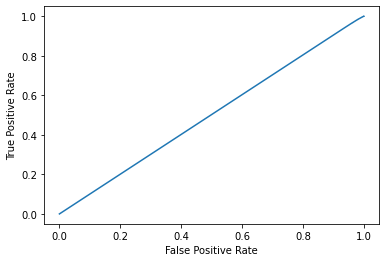

In [389]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(LT_56_imputed_train['Good_Flag'], y_pred_train_new)  


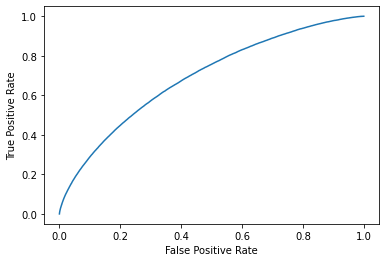

In [387]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(LT_56_imputed_train['DPD90IN24'], y_pred_train_new)  


In [ ]:
deciles of obs vs cumulative default ; plot in this way to see the model's difference

In [386]:
LT_56_imputed_train[['Good_Flag','DPD90IN24']]

,Good_Flag,DPD90IN24
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
567134,1.0,0.0
567135,1.0,0.0
567136,0.0,1.0
567137,1.0,0.0


In [385]:
y_pred_train_new

array([0.17842228, 0.09371376, 0.13277589, ..., 0.07823813, 0.05273951,
       0.04207299])

In [383]:
y_pred_train_new

array([0.90616533, 0.90616533, 0.90616533, ..., 0.90616533, 0.90616533,
       0.90616533])

In [381]:
## Trying a new model by flipping goods and bads :

result_new = pd.DataFrame(columns=['model_version','#features_all','overfit_auc_all','overfit_auc_core',
                               'auc_TEST_all','ks_TEST_all','gini_TEST_all','capture_rate25_TEST_all','cum_bad_rate25_TEST_all',
                               'auc_TEST_core','ks_TEST_core','gini_TEST_core','capture_rate25_TEST_core','cum_bad_rate25_TEST_core',
                               'auc_OOT_all','ks_OOT_all','gini_OOT_all','capture_rate25_OOT_core','cum_bad_rate25_OOT_core',
                               'auc_OOT_core','ks_OOT_core','gini_OOT_core','capture_rate25_OOT_all','cum_bad_rate25_OOT_all',
                               'auc_TRAIN_all','ks_TRAIN_all','gini_TRAIN_all','AUC_train_core','ks_TRAIN_core',
                               'gini_TRAIN_core', 'auc_score_oot_a_all','gini_score_oot_a_all','ks_score_oot_a_all',
                               'auc_score_oot_a_core','gini_score_oot_a_core','ks_score_oot_a_core','auc_score_oot_a_all_strat',
                               'gini_score_oot_a_all_strat','ks_score_oot_a_all_strat','auc_score_oot_b_all_strat',
                               'gini_score_oot_b_all_strat','ks_score_oot_b_all_strat','auc_score_oot_a_core_strat',
                               'gini_score_oot_a_core_strat','ks_score_oot_a_core_strat','auc_score_oot_b_core_strat',
                               'gini_score_oot_b_core_strat','ks_score_oot_b_core_strat'])

row_counter=1

monotone_constraints_56 = [feature_56_monotonic_trend.set_index('Feature')['Monotonic Trend'][col] for col in LT_47_imputed_train_features_sorted.columns]

list_1_new=['ID', 'DPD90IN24', 'Good_Flag','YYYY_MM', 'FICO_bucket', 'FICTBV10_SCORE', 
                               'BCC_DEBT', 'BCC_ACTIVE_COUNT', 'BCC_UTIL', 'MON_SINCE_BK']


LT_56_imputed_train['Good_Flag']=1-LT_56_imputed_train['DPD90IN24']
LT_56_imputed_test['Good_Flag']=1-LT_56_imputed_test['DPD90IN24']
LT_56_imputed_oot_2['Good_Flag']=1-LT_56_imputed_oot_2['DPD90IN24']
LT_56_imputed_oot_1['Good_Flag']=1-LT_56_imputed_oot_1['DPD90IN24']
LT_56_imputed_oot_1_stratified['Good_Flag'] = 1-LT_56_imputed_oot_1_stratified['DPD90IN24']
LT_56_imputed_oot_2_stratified['Good_Flag'] = 1-LT_56_imputed_oot_2_stratified['DPD90IN24']

params_dict = {
        'learning_rate': 0.050,
        'num_iterations': 500,
        'min_data_in_leaf': 2500,
        'feature_fraction': 0.75,
        'num_leaves': 16,
        'lambda_l1':0,
        'lambda_l2':0,
        'bagging_fraction':1.0,
        'objective': 'binary',
        'metric': 'binary_logloss',
        'seed': 2023,
        'verbose': -1,
        'monotone_constraints': monotone_constraints_56,
        'monotone_constraints_method':'advanced',
        'early_stopping_round':50
    }
    
params = params_dict.values()
train_data_new = lgb.Dataset(LT_47_imputed_train_features_sorted, label = LT_56_imputed_train['Good_Flag'])
test_data_new  = lgb.Dataset(LT_47_imputed_test_features_sorted, label = LT_56_imputed_test['Good_Flag'])


model_lgb_new = lgb.train(params_dict, train_data_new,valid_sets=[test_data_new])

train_dev_eval = LT_56_imputed_train[list_1_new].copy()
test_dev_eval  =  LT_56_imputed_test[list_1_new].copy()
oot_b_eval     = LT_56_imputed_oot_2[list_1_new].copy()

##Added by validator for additional results:
oot_a_eval     = LT_56_imputed_oot_1[list_1_new].copy()
oot_a_eval_startified = LT_56_imputed_oot_1_stratified[list_1_new].copy()
oot_b_eval_startified = LT_56_imputed_oot_2_stratified[list_1_new].copy()

train_dev_eval['predicted_target'] = model_lgb_new.predict(LT_47_imputed_train_features_sorted)
test_dev_eval['predicted_target']  = model_lgb_new.predict(LT_47_imputed_test_features_sorted)
oot_b_eval['predicted_target']     = model_lgb_new.predict(LT_47_imputed_oot_b_features_sorted)

##Added by validator for additional results:
oot_a_eval['predicted_target']     = model_lgb_new.predict(LT_47_imputed_oot_a_features_sorted)
oot_a_eval_startified['predicted_target'] = model_lgb_new.predict(LT_47_imputed_oot_a_stratified_sorted)
oot_b_eval_startified['predicted_target'] = model_lgb_new.predict(LT_47_imputed_oot_b_stratified_sorted)
## Validator addition ends ####

#Overall Performance
auc_score_train_all = roc_auc_score(train_dev_eval['Good_Flag'], train_dev_eval['predicted_target'])
gini_score_train_all = 2 * roc_auc_score(train_dev_eval['Good_Flag'], train_dev_eval['predicted_target']) - 1
fpr_train_all, tpr_train_all, thresholds_train_all = roc_curve(train_dev_eval['Good_Flag'], train_dev_eval['predicted_target'])
ks_score_train_all = max(tpr_train_all - fpr_train_all)

auc_score_test_all = roc_auc_score(test_dev_eval['Good_Flag'], test_dev_eval['predicted_target'])
gini_score_test_all = 2 * roc_auc_score(test_dev_eval['Good_Flag'], test_dev_eval['predicted_target']) - 1
fpr_test_all, tpr_test_all, thresholds_test_all = roc_curve(test_dev_eval['Good_Flag'], test_dev_eval['predicted_target'])
ks_score_test_all = max(tpr_test_all - fpr_test_all)

quantile_25_test = test_dev_eval['predicted_target'].quantile(0.75)

subset_test_dev_eval = test_dev_eval[test_dev_eval['predicted_target'] > quantile_25_test]
cumulative_bad_rate_test_all = subset_test_dev_eval['Good_Flag'].sum() / len(subset_test_dev_eval)
capture_rate_test_all = subset_test_dev_eval['Good_Flag'].sum() / test_dev_eval['Good_Flag'].sum()

auc_score_oot_all = roc_auc_score(oot_b_eval['Good_Flag'], oot_b_eval['predicted_target'])
gini_score_oot_all = 2 * roc_auc_score(oot_b_eval['Good_Flag'], oot_b_eval['predicted_target']) - 1
fpr_oot_b_all, tpr_oot_b_all, thresholds_oot_b_all = roc_curve(oot_b_eval['Good_Flag'], oot_b_eval['predicted_target'])
ks_score_oot_all = max(tpr_oot_b_all- fpr_oot_b_all)

subset_oot_dev_eval = oot_b_eval[oot_b_eval['predicted_target'] > quantile_25_test]
cumulative_bad_rate_oot_all = subset_oot_dev_eval['Good_Flag'].sum() / len(subset_oot_dev_eval)
capture_rate_oot_all = subset_oot_dev_eval['Good_Flag'].sum() / oot_b_eval['Good_Flag'].sum()

##Added by validator for additional results: 
auc_score_oot_a_all = roc_auc_score(oot_a_eval['Good_Flag'], oot_a_eval['predicted_target'])
gini_score_oot_a_all = 2 * roc_auc_score(oot_a_eval['Good_Flag'], oot_a_eval['predicted_target']) - 1
fpr_oot_a_all, tpr_oot_a_all, thresholds_oot_a_all = roc_curve(oot_a_eval['Good_Flag'], oot_a_eval['predicted_target'])
ks_score_oot_a_all = max(tpr_oot_a_all- fpr_oot_a_all)

auc_score_oot_a_all_strat = roc_auc_score(oot_a_eval_startified['Good_Flag'], oot_a_eval_startified['predicted_target'])
gini_score_oot_a_all_strat = 2 * roc_auc_score(oot_a_eval_startified['Good_Flag'], oot_a_eval_startified['predicted_target']) - 1
fpr_oot_a_all_strat, tpr_oot_a_all_strat, thresholds_oot_a_all_strat = roc_curve(oot_a_eval_startified['Good_Flag'], oot_a_eval_startified['predicted_target'])
ks_score_oot_a_all_strat = max(tpr_oot_a_all_strat- fpr_oot_a_all_strat)

auc_score_oot_b_all_strat = roc_auc_score(oot_b_eval_startified['Good_Flag'], oot_b_eval_startified['predicted_target'])
gini_score_oot_b_all_strat = 2 * roc_auc_score(oot_b_eval_startified['Good_Flag'], oot_b_eval_startified['predicted_target']) - 1
fpr_oot_b_all_strat, tpr_oot_b_all_strat, thresholds_oot_b_all_strat = roc_curve(oot_b_eval_startified['Good_Flag'], oot_b_eval_startified['predicted_target'])
ks_score_oot_b_all_strat = max(tpr_oot_b_all_strat- fpr_oot_b_all_strat)

## Validator addition ends ####

#FICO 621-660 Segment
train_subset = train_dev_eval[train_dev_eval['FICO_bucket'] == '2. 621-660'].copy()
test_subset = test_dev_eval[test_dev_eval['FICO_bucket'] == '2. 621-660'].copy()
oot_subset = oot_b_eval[oot_b_eval['FICO_bucket'] == '2. 621-660'].copy()

##Added by validator for additional results: 
oot_a_subset = oot_a_eval[oot_a_eval['FICO_bucket'] == '2. 621-660'].copy()
oot_a_subset_strat = oot_a_eval_startified[oot_a_eval_startified['FICO_bucket'] == '2. 621-660'].copy()
oot_b_subset_strat = oot_b_eval_startified[oot_b_eval_startified['FICO_bucket'] == '2. 621-660'].copy()
## Validator addition ends ####


#FICO 621-660 Performance
auc_score_train_core = roc_auc_score(train_subset['Good_Flag'], train_subset['predicted_target'])
gini_score_train_core = 2 * roc_auc_score(train_subset['Good_Flag'], train_subset['predicted_target']) - 1
fpr_train_core, tpr_train_core, thresholds_train_core = roc_curve(train_subset['Good_Flag'], train_subset['predicted_target'])
ks_score_train_core = max(tpr_train_core - fpr_train_core)

auc_score_test_core = roc_auc_score(test_subset['Good_Flag'], test_subset['predicted_target'])
gini_score_test_core = 2 * roc_auc_score(test_subset['Good_Flag'], test_subset['predicted_target']) - 1
fpr_test_core, tpr_test_core, thresholds_test_core = roc_curve(test_subset['Good_Flag'], test_subset['predicted_target'])
ks_score_test_core = max(tpr_test_core - fpr_test_core)

quantile_25_test_core = test_subset['predicted_target'].quantile(0.75)

subset_test_dev_eval_core = test_subset[test_subset['predicted_target'] > quantile_25_test_core]
cumulative_bad_rate_test_core = subset_test_dev_eval_core['Good_Flag'].sum() / len(subset_test_dev_eval_core)
capture_rate_test_core = subset_test_dev_eval_core['Good_Flag'].sum() / test_subset['Good_Flag'].sum()

auc_score_oot_core = roc_auc_score(oot_subset['Good_Flag'], oot_subset['predicted_target'])
gini_score_oot_core = 2 * roc_auc_score(oot_subset['Good_Flag'], oot_subset['predicted_target']) - 1
fpr_oot_b_core, tpr_oot_b_core, thresholds_oot_b_core = roc_curve(oot_subset['Good_Flag'], oot_subset['predicted_target'])
ks_score_oot_core = max(tpr_oot_b_core - fpr_oot_b_core)

subset_oot_dev_eval_core = oot_subset[oot_subset['predicted_target'] > quantile_25_test_core]
cumulative_bad_rate_oot_core = subset_oot_dev_eval_core['Good_Flag'].sum() / len(subset_oot_dev_eval_core)
capture_rate_oot_core = subset_oot_dev_eval_core['Good_Flag'].sum() / oot_subset['Good_Flag'].sum()


##Added by validator for additional results: 
auc_score_oot_a_core = roc_auc_score(oot_a_subset['Good_Flag'], oot_a_subset['predicted_target'])
gini_score_oot_a_core = 2 * roc_auc_score(oot_a_subset['Good_Flag'], oot_a_subset['predicted_target']) - 1
fpr_oot_a_core, tpr_oot_a_core, thresholds_oot_a_core = roc_curve(oot_a_subset['Good_Flag'], oot_a_subset['predicted_target'])
ks_score_oot_a_core = max(tpr_oot_a_core - fpr_oot_a_core)

auc_score_oot_a_core_strat = roc_auc_score(oot_a_subset_strat['Good_Flag'], oot_a_subset_strat['predicted_target'])
gini_score_oot_a_core_strat = 2 * roc_auc_score(oot_a_subset_strat['Good_Flag'], oot_a_subset_strat['predicted_target']) - 1
fpr_oot_a_core_strat, tpr_oot_a_core_strat, thresholds_oot_a_core_strat = roc_curve(oot_a_subset_strat['Good_Flag'], oot_a_subset_strat['predicted_target'])
ks_score_oot_a_core_strat = max(tpr_oot_a_core_strat - fpr_oot_a_core_strat)

auc_score_oot_b_core_strat = roc_auc_score(oot_b_subset_strat['Good_Flag'], oot_b_subset_strat['predicted_target'])
gini_score_oot_b_core_strat = 2 * roc_auc_score(oot_b_subset_strat['Good_Flag'], oot_b_subset_strat['predicted_target']) - 1
fpr_oot_b_core_strat, tpr_oot_b_core_strat, thresholds_oot_b_core_strat = roc_curve(oot_b_subset_strat['Good_Flag'], oot_b_subset_strat['predicted_target'])
ks_score_oot_b_core_strat = max(tpr_oot_b_core_strat - fpr_oot_b_core_strat)
## Validator addition ends ####


result_new.loc[row_counter] = [params,len(LT_56_imputed_train.drop(columns=list_1).columns),auc_score_train_all-auc_score_test_all,auc_score_train_core-auc_score_test_core,
                           auc_score_test_all, ks_score_test_all, gini_score_test_all, capture_rate_test_all, cumulative_bad_rate_test_all,
                           auc_score_test_core, ks_score_test_core, gini_score_test_core, capture_rate_test_core, cumulative_bad_rate_test_core,
                           auc_score_oot_all, ks_score_oot_all, gini_score_oot_all, capture_rate_oot_all, cumulative_bad_rate_oot_all,
                           auc_score_oot_core, ks_score_oot_core, gini_score_oot_core,capture_rate_oot_core,cumulative_bad_rate_oot_core,
                           auc_score_train_all, ks_score_train_all, gini_score_train_all,auc_score_train_core,ks_score_train_core,gini_score_train_core,
                          auc_score_oot_a_all,gini_score_oot_a_all,ks_score_oot_a_all,auc_score_oot_a_core,
                           gini_score_oot_a_core,ks_score_oot_a_core, auc_score_oot_a_all_strat, gini_score_oot_a_all_strat,
                          ks_score_oot_a_all_strat, auc_score_oot_b_all_strat, gini_score_oot_b_all_strat,
                          ks_score_oot_b_all_strat, auc_score_oot_a_core_strat, gini_score_oot_a_core_strat, ks_score_oot_a_core_strat,
                          auc_score_oot_b_core_strat, gini_score_oot_b_core_strat, ks_score_oot_b_core_strat]


result_new[['auc_TRAIN_all','ks_TRAIN_all','gini_TRAIN_all','auc_TEST_all','ks_TEST_all','gini_TEST_all',
         
                               'auc_score_oot_a_all_strat',
                              'gini_score_oot_a_all_strat','ks_score_oot_a_all_strat','auc_score_oot_b_all_strat',
                               'gini_score_oot_b_all_strat','ks_score_oot_b_all_strat']]


,auc_TRAIN_all,ks_TRAIN_all,gini_TRAIN_all,auc_TEST_all,ks_TEST_all,gini_TEST_all,auc_score_oot_a_all_strat,gini_score_oot_a_all_strat,ks_score_oot_a_all_strat,auc_score_oot_b_all_strat,gini_score_oot_b_all_strat,ks_score_oot_b_all_strat
1,0.502484,0.004807,0.004968,0.502029,0.003933,0.004057,0.501551,0.003103,0.003586,0.495858,-0.008283,0.001853


In [378]:
LT_56_imputed_train['Good_Flag'].value_counts()

1.0    513692
0.0     53447
Name: Good_Flag, dtype: int64

In [379]:
LT_56_imputed_train['DPD90IN24'].value_counts()

0.0    513692
1.0     53447
Name: DPD90IN24, dtype: int64

In [ ]:
# Feature importance from Light GBM :

# clf.booster_.feature_importance(importance_type='gain')

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

feature_imp = pd.DataFrame({'Value':model_lgb.feature_importance(importance_type='gain'),'Feature':LT_47_imputed_train_features_sorted.columns})
feature_imp['%age_gain']=feature_imp['Value']/feature_imp['Value'].sum()
feature_imp.sort_values(by="Value",ascending=False,inplace=True)


plt.figure(figsize= (50, 30))
sns.set(font_scale = 4)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                    ascending=False)[0:25])
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

# plt.savefig('lgbm_importances-01.png')
plt.show()
    
feature_imp.to_csv('Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Model_Testing_results\\feature_imp.csv')

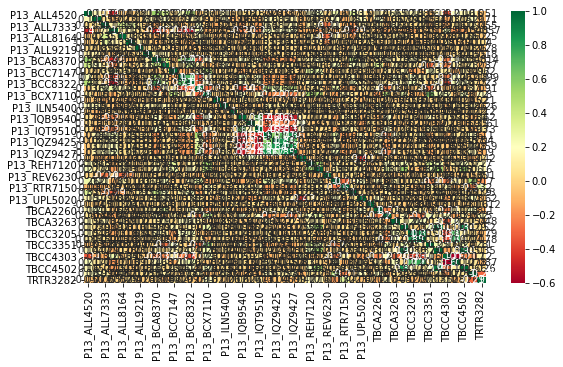

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = X_train.corr()
plt.subplots(figsize=(9, 5))
sns.heatmap(corrMatrix, annot=True, cmap="RdYlGn")
plt.show()

In [352]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

df_vif=calc_vif(X_train)

df_vif_Final=df_vif[df_vif['VIF']<=8]

vif_cehcekd_list=df_vif_Final['variables'].to_list()

print(vif_cehcekd_list)

print(len(vif_cehcekd_list))
# calc_vif(X_train)


KeyboardInterrupt: 

In [126]:
import numpy as np
data = {"P13_BCA8370": -1,"P13_REH7120": 1,"P13_IQF9540": -1,"TBCC3351": 1,"TBCC2502": 1,"P13_UPL5020": 1,"P13_ALL4520": -1,
        "TBCC4502": 1,"P13_RTR7150": 1,"P13_PIL8132": -1,"P13_ALS5400": -1,"P13_ALL8164": -1,"TBCC3205": -1,
        "TRTR3282": 1,"P13_BCC5400": -1,"P13_BCC7147": 1,"P13_REV3424": 1,"TAUA4710": -1,"P13_IQT9510": -1,"P13_BCX7110": 1,"P13_BCX0438": 1,"P13_CRU4180": 1,
        "TBCA2260": -1,"P13_ALL8552": -1,"P13_RTR5627": -1,"P13_ILN7150": 1,"P13_ALL5935": -1,"P13_IQZ9425": 1,"TBCC4305": -1,"P13_IQZ9420": 1,
        "P13_IQZ9427": 1,"P13_ALL9219": -1,"P13_ALL7333": -1,"TBCA2628": 1,"TBCA3263": -1,"P13_BCC8322": -1,"P13_BCC8132": -1,"P13_ILN5400": -1,
        "TBCC4303": 1,"P13_RTR8320": -1,"TBCC3502": 1,"P13_REV6230": 1,"TBCC3305": -1,"P13_ALL7519": 1,"TRTR3260": -1,
        "P13_IQZ9426": 1,"P13_IQB9540": -1}

feature_47_monotonic_trend_df = pd.DataFrame(list(data.items()), columns=['Feature', 'Monotonic_Trend'])
feature_47_monotonic_trend_df['Lower_Bound']=np.where(feature_47_monotonic_trend_df['Monotonic_Trend']==1,0,-np.inf)
feature_47_monotonic_trend_df['Upper_Bound']=np.where(feature_47_monotonic_trend_df['Monotonic_Trend']==1,np.inf,0)
feature_47_monotonic_trend_df.head()


final_monotonic_features = feature_47_monotonic_trend_df['Feature'].isin(vif_cehcekd_list)
final_monotonic_features_df =  feature_47_monotonic_trend_df[final_monotonic_features]
final_monotonic_features_df

,Feature,Monotonic_Trend,Lower_Bound,Upper_Bound
5,P13_UPL5020,1,0.0,inf
10,P13_ALS5400,-1,-inf,0.0
14,P13_BCC5400,-1,-inf,0.0
15,P13_BCC7147,1,0.0,inf
16,P13_REV3424,1,0.0,inf
18,P13_IQT9510,-1,-inf,0.0
20,P13_BCX0438,1,0.0,inf
21,P13_CRU4180,1,0.0,inf
22,TBCA2260,-1,-inf,0.0
23,P13_ALL8552,-1,-inf,0.0


In [127]:
len(final_monotonic_features_df)

23

## Alternative model development :

In [131]:
## Logistic regression;
from sklearn.linear_model import LogisticRegression
# train using clogistic
from scipy.optimize import Bounds
from clogistic import LogisticRegression as clLogisticRegression


 

list_1=['ID', 'DPD90IN24', 'YYYY_MM', 'FICO_bucket', 'FICTBV10_SCORE', 
                               'BCC_DEBT', 'BCC_ACTIVE_COUNT', 'BCC_UTIL', 'MON_SINCE_BK']


LT_47_imputed_train_features = LT_56_imputed_train.drop(columns=list_1).copy()
LT_47_imputed_test_features  = LT_56_imputed_test.drop(columns=list_1).copy()
LT_47_imputed_oot_1_features = LT_56_imputed_oot_1.drop(columns=list_1).copy()
LT_47_imputed_oot_2_features = LT_56_imputed_oot_2.drop(columns=list_1).copy()


LT_47_imputed_train_features_sorted = LT_47_imputed_train_features.reindex(sorted(LT_47_imputed_train_features.columns), axis=1).copy()
LT_47_imputed_test_features_sorted  = LT_47_imputed_test_features.reindex(sorted(LT_47_imputed_test_features.columns), axis=1).copy()
LT_47_imputed_oot_1_features_sorted = LT_47_imputed_oot_1_features.reindex(sorted(LT_47_imputed_oot_1_features.columns), axis=1).copy()
LT_47_imputed_oot_2_features_sorted = LT_47_imputed_oot_2_features.reindex(sorted(LT_47_imputed_oot_2_features.columns), axis=1).copy()


# X_train = LT_47_imputed_train_features_sorted.copy()
# y_train = LT_56_imputed_train['DPD90IN24'].copy()

# X_test = LT_47_imputed_test_features_sorted.copy()
# y_test = LT_56_imputed_test['DPD90IN24'].copy()

# X_oot_1 = LT_47_imputed_oot_1_features_sorted.copy()
# y_oot_1 = LT_56_imputed_oot_1['DPD90IN24'].copy()

# X_oot_2 = LT_47_imputed_oot_2_features_sorted.copy()
# y_oot_2 = LT_56_imputed_oot_2['DPD90IN24'].copy()





#=============================================================================================================
## Final model performance on training and testing data: 

# define constraints as dataframe
import numpy as np
data = {"P13_BCA8370": -1,"P13_REH7120": 1,"P13_IQF9540": -1,"TBCC3351": 1,"TBCC2502": 1,"P13_UPL5020": 1,"P13_ALL4520": -1,
        "TBCC4502": 1,"P13_RTR7150": 1,"P13_PIL8132": -1,"P13_ALS5400": -1,"P13_ALL8164": -1,"TBCC3205": -1,
        "TRTR3282": 1,"P13_BCC5400": -1,"P13_BCC7147": 1,"P13_REV3424": 1,"TAUA4710": -1,"P13_IQT9510": -1,"P13_BCX7110": 1,"P13_BCX0438": 1,"P13_CRU4180": 1,
        "TBCA2260": -1,"P13_ALL8552": -1,"P13_RTR5627": -1,"P13_ILN7150": 1,"P13_ALL5935": -1,"P13_IQZ9425": 1,"TBCC4305": -1,"P13_IQZ9420": 1,
        "P13_IQZ9427": 1,"P13_ALL9219": -1,"P13_ALL7333": -1,"TBCA2628": 1,"TBCA3263": -1,"P13_BCC8322": -1,"P13_BCC8132": -1,"P13_ILN5400": -1,
        "TBCC4303": 1,"P13_RTR8320": -1,"TBCC3502": 1,"P13_REV6230": 1,"TBCC3305": -1,"P13_ALL7519": 1,"TRTR3260": -1,
        "P13_IQZ9426": 1,"P13_IQB9540": -1}

feature_47_monotonic_trend_df = pd.DataFrame(list(data.items()), columns=['Feature', 'Monotonic_Trend'])
feature_47_monotonic_trend_df['Lower_Bound']=np.where(feature_47_monotonic_trend_df['Monotonic_Trend']==1,0,-np.inf)
feature_47_monotonic_trend_df['Upper_Bound']=np.where(feature_47_monotonic_trend_df['Monotonic_Trend']==1,np.inf,0)


final_monotonic_features = feature_47_monotonic_trend_df['Feature'].isin(vif_cehcekd_list)
final_monotonic_features_df =  feature_47_monotonic_trend_df[final_monotonic_features]

final_model_features=final_monotonic_features_df['Feature'].to_list()


df_intercept = {'Feature': 'intercept','Monotonic_Trend':'2', 'Lower_Bound': -np.inf, 'Upper_Bound': np.inf}
final_monotonic_features_df = final_monotonic_features_df.append(df_intercept, ignore_index = True)

####**************************Constraint defintion ends here ************###########################

##Create the datasets :

X_train = LT_47_imputed_train_features_sorted[final_model_features].copy()
y_train = LT_56_imputed_train['DPD90IN24'].copy()

X_test = LT_47_imputed_test_features_sorted[final_model_features].copy()
y_test = LT_56_imputed_test['DPD90IN24'].copy()

X_oot_1 = LT_47_imputed_oot_1_features_sorted[final_model_features].copy()
y_oot_1 = LT_56_imputed_oot_1['DPD90IN24'].copy()

X_oot_2 = LT_47_imputed_oot_2_features_sorted[final_model_features].copy()
y_oot_2 = LT_56_imputed_oot_2['DPD90IN24'].copy()



# train using clogistic
from scipy.optimize import Bounds
from clogistic import LogisticRegression as clLogisticRegression

lower_bounds = final_monotonic_features_df['Lower_Bound'].to_numpy()
upper_bounds = final_monotonic_features_df['Upper_Bound'].to_numpy()
bounds = Bounds(lower_bounds, upper_bounds)

model= clLogisticRegression(penalty='l2',verbose=True, solver='L-BFGS-B')
# model= clLogisticRegression(penalty='l1',verbose=True, solver='scs')
# model = clLogisticRegression(penalty='l1',verbose=True, solver='ecos',max_iter = 500)
# model= clLogisticRegression(penalty='none',verbose=True, solver='ecos')
# model= clLogisticRegression(verbose=True, solver='ecos',penalty="elasticnet",l1_ratio=0.5)
model.fit(X_train, y_train, bounds=bounds)

## Retrieve model coeffs for ligistic reg: 

# coefficients as dataframe
cl_coef = pd.DataFrame({
    'Feature': X_train.columns.tolist() + ['intercept'],
    'Coefficient': list(model.coef_[0]) + [model.intercept_[0]]
})

display(cl_coef)


ypred_train_dt = model.predict(X_train[final_model_features])
ypred_train_proba=model.predict_proba(X_train[final_model_features])[:,1]

ypred_test_dt = model.predict(X_test[final_model_features])
ypred_test_proba=model.predict_proba(X_test[final_model_features])[:,1]

ypred_oot_1_dt = model.predict(X_oot_1[final_model_features])
ypred_oot_1_proba=model.predict_proba(X_oot_1[final_model_features])[:,1]

# ypred_oot_2_dt = model.predict(X_oot_2[final_model_features])
# ypred_oot_2_proba=model.predict_proba(X_oot_2[final_model_features])[:,1]

## KS:     
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, ypred_train_proba)
train_ks = max(tpr_train - fpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, ypred_test_proba)
test_ks = max(tpr_test - fpr_test)

fpr_oot_1, tpr_oot_1, thresholds_oot_1 = roc_curve(y_oot_1, ypred_oot_1_proba)
oot_1_ks = max(tpr_oot_1 - fpr_oot_1)

# fpr_oot_2, tpr_oot_2, thresholds_oot_2 = roc_curve(y_oot_2, ypred_oot_2_proba)
# oot_2_ks = max(tpr_oot_2 - fpr_oot_2)

## AUC and Gini ;    
auc_training = roc_auc_score(y_train,ypred_train_proba)
gini_training = (2*auc_training -1)

auc_testing = roc_auc_score(y_test,ypred_test_proba)
gini_testing = (2*auc_testing -1)

auc_oot_1 = roc_auc_score(y_oot_1,ypred_oot_1_proba)
gini_oot_1 = (2*auc_oot_1 -1)

# auc_oot_2 = roc_auc_score(y_oot_2,ypred_oot_2_proba)
# gini_oot_2 = (2*auc_oot_2 -1)



#=============================================================================================================
## Print Final model performance on training and testing data: 

print("Logistic regression on total population (Core) and (non-core)")
print("\t")

print("Length of training data : %.3f"  %len(X_train))
print("KS_Score_Training : %f"  %train_ks)
print("gini_Score_Training : %f"  %gini_training)
print ("AUC Training : %.2f" %auc_training)



print("\t")

print("Length of testing data : %.3f"  %len(X_test))
print("KS_Score_Testing : %f"  %test_ks)
print("gini_Score_Testing : %f"  %gini_testing)
print ("AUC Testing : %.2f" %auc_testing)



print("\t")

print("Length of OOT 1 data : %.3f"  %len(X_oot_1))
print("KS_Score_OOT_1 : %f"  %oot_1_ks)
print("gini_Score_OOT_1 : %f"  %gini_oot_1)
print ("AUC OOT_1 : %.2f" %auc_oot_1)


print("\t")

# print("Length of OOT 2 data : %.3f"  %len(X_oot_2))
# print("KS_Score_OOT_2 : %f"  %oot_2_ks)
# print("gini_Score_OOT_2 : %f"  %gini_oot_2)
# print ("AUC OOT_2 : %.2f" %auc_oot_2)

# print("\t")




,Feature,Coefficient
0,P13_UPL5020,2.979197e-05
1,P13_ALS5400,-1.439914e-06
2,P13_BCC5400,-6.779396e-05
3,P13_BCC7147,0.000000e+00
4,P13_REV3424,5.255056e-08
5,P13_IQT9510,-4.526414e-05
6,P13_BCX0438,0.000000e+00
7,P13_CRU4180,0.000000e+00
8,TBCA2260,-1.167128e-05
9,P13_ALL8552,-1.880159e-04


Logistic regression on total population (Core) and (non-core)
	
Length of training data : 567139.000
KS_Score_Training : 0.121585
gini_Score_Training : 0.173420
AUC Training : 0.59
	
Length of testing data : 243060.000
KS_Score_Testing : 0.124559
gini_Score_Testing : 0.175778
AUC Testing : 0.59
	
Length of OOT 1 data : 243012.000
KS_Score_OOT_1 : 0.149297
gini_Score_OOT_1 : 0.207145
AUC OOT_1 : 0.60
	


In [132]:
##Check montonicity signs: 

coef_monotone_merged=cl_coef.merge(feature_47_monotonic_trend_df,on='Feature',how='left')
coef_monotone_merged_chck=coef_monotone_merged[['Feature','Coefficient','Monotonic_Trend']].copy()
coef_monotone_merged_chck['Coef_sign']=np.where(coef_monotone_merged_chck['Coefficient']>=0,1,-1)
coef_monotone_merged_chck['Coef_sign_check']=np.where(coef_monotone_merged_chck['Coef_sign']==coef_monotone_merged_chck['Monotonic_Trend'],'True','False')

display(cl_coef.head())

coef_monotone_merged_chck.value_counts('Coef_sign_check')

,Feature,Coefficient
0,P13_UPL5020,2.979197e-05
1,P13_ALS5400,-1.439914e-06
2,P13_BCC5400,-6.779396e-05
3,P13_BCC7147,0.000000e+00
4,P13_REV3424,5.255056e-08


Coef_sign_check
True     22
False     2
dtype: int64

In [34]:
## XGBoost:

from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import train,DMatrix

list_1=['ID', 'DPD90IN24', 'YYYY_MM', 'FICO_bucket', 'FICTBV10_SCORE', 
                               'BCC_DEBT', 'BCC_ACTIVE_COUNT', 'BCC_UTIL', 'MON_SINCE_BK']


LT_47_imputed_train_features = LT_56_imputed_train.drop(columns=list_1).copy()
LT_47_imputed_test_features  = LT_56_imputed_test.drop(columns=list_1).copy()
LT_47_imputed_oot_1_features = LT_56_imputed_oot_1.drop(columns=list_1).copy()
LT_47_imputed_oot_2_features = LT_56_imputed_oot_2.drop(columns=list_1).copy()


LT_47_imputed_train_features_sorted = LT_47_imputed_train_features.reindex(sorted(LT_47_imputed_train_features.columns), axis=1).copy()
LT_47_imputed_test_features_sorted  = LT_47_imputed_test_features.reindex(sorted(LT_47_imputed_test_features.columns), axis=1).copy()
LT_47_imputed_oot_1_features_sorted = LT_47_imputed_oot_1_features.reindex(sorted(LT_47_imputed_oot_1_features.columns), axis=1).copy()
LT_47_imputed_oot_2_features_sorted = LT_47_imputed_oot_2_features.reindex(sorted(LT_47_imputed_oot_2_features.columns), axis=1).copy()


X_train = LT_47_imputed_train_features_sorted.copy()
y_train = LT_56_imputed_train['DPD90IN24'].copy()

X_test = LT_47_imputed_test_features_sorted.copy()
y_test = LT_56_imputed_test['DPD90IN24'].copy()

X_oot_1 = LT_47_imputed_oot_1_features_sorted.copy()
y_oot_1 = LT_56_imputed_oot_1['DPD90IN24'].copy()

X_oot_2 = LT_47_imputed_oot_2_features_sorted.copy()
y_oot_2 = LT_56_imputed_oot_2['DPD90IN24'].copy()



# Covert dataset to special XGBoost optimised data structure
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
doot_1 = xgb.DMatrix(X_oot_1, label=y_oot_1)
doot_2 = xgb.DMatrix(X_oot_2, label=y_oot_2)

trainDmatrix = xgb.DMatrix(X_train, label = y_train)
testDmatrix = xgb.DMatrix(X_test, label = y_test)
oot_1_Dmatrix = xgb.DMatrix(X_oot_1, label = y_oot_1)
oot_2_Dmatrix = xgb.DMatrix(X_oot_2, label = y_oot_2)

## Setting up the montonic constraint
monotone_constraints_56 = [feature_56_monotonic_trend.set_index('Feature')['Monotonic Trend'][col] for col in LT_47_imputed_train_features_sorted.columns]
monotone_constraints_56_tuple=tuple(monotone_constraints_56)

# my_tuple__1 = (1)
# N = X_train.shape[1]
# mono_array = ((my_tuple_1,) * N)

#=============================================================================================================
## Final model performance on training and testing data: 

hyper_params ={
    "objective":"binary:logistic",
    "n_jobs":4,
    "max_depth":6,
    "booster":'gbtree',
    'alpha':0,
    'lambda':0,
    'learning_rate':0.05,
    'eval_metric':'logloss',
    'nthread':2,
    "min_child_weight":1,
    "monotone_constraints":monotone_constraints_56_tuple
    }


model=train(hyper_params,trainDmatrix, evals=[(trainDmatrix,'train'),(testDmatrix,'test')],verbose_eval=10,early_stopping_rounds=50)




ypred_train_proba = model.predict(dtrain)
ypred_test_proba = model.predict(dtest)
ypred_oot_1_proba = model.predict(doot_1)
ypred_oot_2_proba = model.predict(doot_2)


## KS:     
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, ypred_train_proba)
train_ks = max(tpr_train - fpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, ypred_test_proba)
test_ks = max(tpr_test - fpr_test)

fpr_oot_1, tpr_oot_1, thresholds_oot_1 = roc_curve(y_oot_1, ypred_oot_1_proba)
oot_1_ks = max(tpr_oot_1 - fpr_oot_1)

fpr_oot_2, tpr_oot_2, thresholds_oot_2 = roc_curve(y_oot_2, ypred_oot_2_proba)
oot_2_ks = max(tpr_oot_2 - fpr_oot_2)

## AUC and Gini ;    
auc_training = roc_auc_score(y_train,ypred_train_proba)
gini_training = (2*auc_training -1)

auc_testing = roc_auc_score(y_test,ypred_test_proba)
gini_testing = (2*auc_testing -1)

auc_oot_1 = roc_auc_score(y_oot_1,ypred_oot_1_proba)
gini_oot_1 = (2*auc_oot_1 -1)

auc_oot_2 = roc_auc_score(y_oot_2,ypred_oot_2_proba)
gini_oot_2 = (2*auc_oot_2 -1)


# Actual_train_bad_rate=y_train.sum()/y_train.count()

# Actual_test_bad_rate=y_test.sum()/y_test.count()
# predicted_test_bad_rate =ypred_test_dt.sum()/len(ypred_test_dt)

# Actual_oot_bad_rate=y_oot.sum()/y_oot.count()
# predicted_oot_bad_rate =ypred_oot_dt.sum()/len(ypred_oot_dt)


#=============================================================================================================
## Print Final model performance on training and testing data: 

print("XGBoost model on total population (Core) and (non-core)")
print("\t")

print("Length of training data : %.3f"  %len(X_train))
print("KS_Score_Training : %f"  %train_ks)
print("gini_Score_Training : %f"  %gini_training)
print ("AUC Training : %.2f" %auc_training)



print("\t")

print("Length of testing data : %.3f"  %len(X_test))
print("KS_Score_Testing : %f"  %test_ks)
print("gini_Score_Testing : %f"  %gini_testing)
print ("AUC Testing : %.2f" %auc_testing)



print("\t")

print("Length of OOT 1 data : %.3f"  %len(X_oot_1))
print("KS_Score_OOT_1 : %f"  %oot_1_ks)
print("gini_Score_OOT_1 : %f"  %gini_oot_1)
print ("AUC OOT_1 : %.2f" %auc_oot_1)


print("\t")

print("Length of OOT 2 data : %.3f"  %len(X_oot_2))
print("KS_Score_OOT_2 : %f"  %oot_2_ks)
print("gini_Score_OOT_2 : %f"  %gini_oot_2)
print ("AUC OOT_2 : %.2f" %auc_oot_2)

print("\t")




[0]	train-logloss:0.66051	test-logloss:0.66058
[9]	train-logloss:0.47204	test-logloss:0.47266
XGBoost model on total population (Core) and (non-core)
	
Length of training data : 567139.000
KS_Score_Training : 0.195542
gini_Score_Training : 0.277918
AUC Training : 0.64
	
Length of testing data : 243060.000
KS_Score_Testing : 0.185434
gini_Score_Testing : 0.264648
AUC Testing : 0.63
	
Length of OOT 1 data : 243012.000
KS_Score_OOT_1 : 0.217269
gini_Score_OOT_1 : 0.297170
AUC OOT_1 : 0.65
	
Length of OOT 2 data : 782355.000
KS_Score_OOT_2 : 0.276454
gini_Score_OOT_2 : 0.374039
AUC OOT_2 : 0.69
	


## FICO Bucket wise DR distribution: 

In [228]:
list_1=['ID', 'DPD90IN24', 'YYYY_MM', 'FICO_bucket', 'FICTBV10_SCORE', 
                               'BCC_DEBT', 'BCC_ACTIVE_COUNT', 'BCC_UTIL', 'MON_SINCE_BK']

import seaborn as sns
import matplotlib.pyplot as plt

def FICO_Core_Bracket_DR_analysis(df_input):
    
    LT_56_imputed_core=pd.DataFrame()
    
    LT_56_imputed_core=df_input[df_input['FICO_bucket']=='2. 621-660'].copy()
    
    LT_56_imputed_core['FICO_Core_Brackets']=np.where(((LT_56_imputed_core['FICTBV10_SCORE']>620) 
                                                   & (LT_56_imputed_core['FICTBV10_SCORE']<=630)),'FICO:621-630',
                                                 np.where(((LT_56_imputed_core['FICTBV10_SCORE']>630) 
                                                   & (LT_56_imputed_core['FICTBV10_SCORE']<=640)),'FICO:631-640',
                                                         np.where(((LT_56_imputed_core['FICTBV10_SCORE']>640) 
                                                   & (LT_56_imputed_core['FICTBV10_SCORE']<=650)),'FICO:641-650','FICO:651-660')))    

    
    
    LT_56_imputed_core_DR=LT_56_imputed_core.groupby('FICO_Core_Brackets').agg({'DPD90IN24':'mean'}).rename(columns={'DPD90IN24':'DR'}).reset_index()                                              




    fig, ax = plt.subplots(figsize=(10, 8))
    sns. set(font_scale=1) 

    sns.barplot(x="FICO_Core_Brackets", y="DR", data=LT_56_imputed_core_DR,  ax=ax).set(title='Bad rate over various buckets')
    plt.show()
    
    return LT_56_imputed_core_DR




Default rate across various FICO Buckets of Core category in train data:


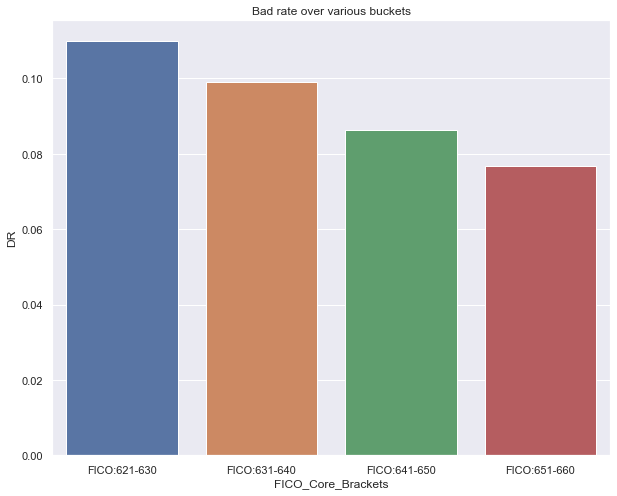

,FICO_Core_Brackets,DR
0,FICO:621-630,0.109870
1,FICO:631-640,0.099014
2,FICO:641-650,0.086206
3,FICO:651-660,0.076663


In [230]:

print('Default rate across various FICO Buckets of Core category in train data:')
FICO_Core_Bracket_DR_analysis(LT_56_imputed_train)


Default rate across various FICO Buckets of Core category in OOT_2 data:


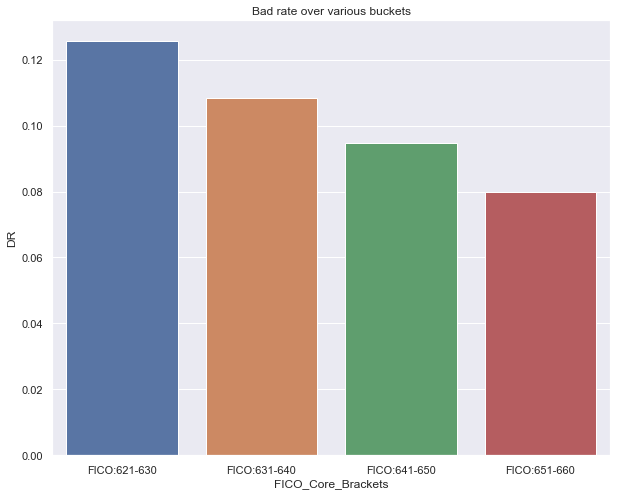

,FICO_Core_Brackets,DR
0,FICO:621-630,0.125606
1,FICO:631-640,0.108482
2,FICO:641-650,0.094842
3,FICO:651-660,0.079980


In [231]:
print('Default rate across various FICO Buckets of Core category in OOT_2 data:')
FICO_Core_Bracket_DR_analysis(LT_56_imputed_oot_2)

## Check performance of the model across these FICO Core brackets :



In [13]:
list_1=['ID', 'DPD90IN24', 'YYYY_MM', 'FICO_bucket', 'FICTBV10_SCORE', 
                               'BCC_DEBT', 'BCC_ACTIVE_COUNT', 'BCC_UTIL', 'MON_SINCE_BK','FICO_Core_Brackets']

from lightgbm import LGBMClassifier
import pandas as pd
from sklearn.metrics import accuracy_score



def FICO_Core_Bracket_model_perf_analysis(df_input,dataset_name):
    
    LT_56_imputed_core=pd.DataFrame()
    
    df_summary_segment_final=pd.DataFrame()
    
    df_summary_segment=pd.DataFrame()
    
    LT_56_imputed_core=df_input[df_input['FICO_bucket']=='2. 621-660'].copy()
    
    LT_56_imputed_core['FICO_Core_Brackets']=np.where(((LT_56_imputed_core['FICTBV10_SCORE']>620) 
                                                   & (LT_56_imputed_core['FICTBV10_SCORE']<=630)),'FICO:621-630',
                                                 np.where(((LT_56_imputed_core['FICTBV10_SCORE']>630) 
                                                   & (LT_56_imputed_core['FICTBV10_SCORE']<=640)),'FICO:631-640',
                                                         np.where(((LT_56_imputed_core['FICTBV10_SCORE']>640) 
                                                   & (LT_56_imputed_core['FICTBV10_SCORE']<=650)),'FICO:641-650','FICO:651-660')))    

    
    LT_56_imputed_core_621_30=LT_56_imputed_core[LT_56_imputed_core['FICO_Core_Brackets']=='FICO:621-630'].copy()
    LT_56_imputed_core_631_40=LT_56_imputed_core[LT_56_imputed_core['FICO_Core_Brackets']=='FICO:631-640'].copy()
    LT_56_imputed_core_641_50=LT_56_imputed_core[LT_56_imputed_core['FICO_Core_Brackets']=='FICO:641-650'].copy()
    LT_56_imputed_core_651_60=LT_56_imputed_core[LT_56_imputed_core['FICO_Core_Brackets']=='FICO:651-660'].copy()
    
    
    LT_47_imputed_core_621_30_features = LT_56_imputed_core_621_30.drop(columns=list_1).copy()
    LT_47_imputed_core_631_40_features = LT_56_imputed_core_631_40.drop(columns=list_1).copy()
    LT_47_imputed_core_641_50_features = LT_56_imputed_core_641_50.drop(columns=list_1).copy()
    LT_47_imputed_core_651_60_features = LT_56_imputed_core_651_60.drop(columns=list_1).copy()
    
    LT_47_imputed_core_621_30_features_sorted = LT_47_imputed_core_621_30_features.reindex(sorted(LT_47_imputed_core_621_30_features.columns), axis=1).copy()
    LT_47_imputed_core_631_40_features_sorted  = LT_47_imputed_core_631_40_features.reindex(sorted(LT_47_imputed_core_631_40_features.columns), axis=1).copy()
    LT_47_imputed_core_641_50_features_sorted = LT_47_imputed_core_641_50_features.reindex(sorted(LT_47_imputed_core_641_50_features.columns), axis=1).copy()
    LT_47_imputed_core_651_50_featuress_sorted = LT_47_imputed_core_651_60_features.reindex(sorted(LT_47_imputed_core_651_60_features.columns), axis=1).copy()

    
    
    X_core_621_30 = LT_47_imputed_core_621_30_features_sorted.copy()
    y_core_621_30 = LT_56_imputed_core_621_30['DPD90IN24'].copy()
    
    X_core_631_40 = LT_47_imputed_core_631_40_features_sorted.copy()
    y_core_631_40 = LT_56_imputed_core_631_40['DPD90IN24'].copy()
    
    X_core_641_50 = LT_47_imputed_core_641_50_features_sorted.copy()
    y_core_641_50 = LT_56_imputed_core_641_50['DPD90IN24'].copy()
    
    X_core_651_60 = LT_47_imputed_core_651_50_featuress_sorted.copy()
    y_core_651_60 = LT_56_imputed_core_651_60['DPD90IN24'].copy()
    
    
    y_core_621_30_pred_prob=model_lgb.predict(X_core_621_30)
    y_core_631_40_pred_prob=model_lgb.predict(X_core_631_40)
    y_core_641_50_pred_prob=model_lgb.predict(X_core_641_50)
    y_core_651_60_pred_prob=model_lgb.predict(X_core_651_60)
    
    
    auc_score_621_30 = roc_auc_score(y_core_621_30, y_core_621_30_pred_prob)
    auc_score_631_40 = roc_auc_score(y_core_631_40, y_core_631_40_pred_prob)
    auc_score_641_50 = roc_auc_score(y_core_641_50, y_core_641_50_pred_prob)
    auc_score_651_60 = roc_auc_score(y_core_651_60, y_core_651_60_pred_prob)

    
    gini_score_621_30 = 2 * auc_score_621_30-1
    gini_score_631_40 = 2 * auc_score_631_40-1
    gini_score_641_50 = 2 * auc_score_641_50-1
    gini_score_651_60 = 2 * auc_score_651_60-1
    
    
    
    fpr_621_30, tpr_621_30, thresholds_621_30 = roc_curve(y_core_621_30, y_core_621_30_pred_prob)
    fpr_631_40, tpr_631_40, thresholds_631_40 = roc_curve(y_core_631_40, y_core_631_40_pred_prob)
    fpr_641_50, tpr_641_50, thresholds_641_50 = roc_curve(y_core_641_50, y_core_641_50_pred_prob)
    fpr_651_60, tpr_651_60, thresholds_651_60 = roc_curve(y_core_651_60, y_core_651_60_pred_prob)
    
    
    ks_621_30=max(tpr_621_30-fpr_621_30)
    ks_631_40=max(tpr_631_40-fpr_631_40)
    ks_641_50=max(tpr_641_50-fpr_641_50)
    ks_651_60=max(tpr_651_60-fpr_651_60)
    
    
    ## Finally,  bringing it all under a summary table : ,
    
    df_summary_segment=pd.DataFrame([[dataset_name,auc_score_621_30,gini_score_621_30,ks_621_30,
                                      auc_score_631_40,gini_score_631_40,ks_631_40,
                                      auc_score_641_50,gini_score_641_50,ks_641_50,
                                      auc_score_651_60,gini_score_651_60,ks_651_60]],columns=['dataset_name','auc_score_621_30','gini_score_621_30','ks_621_30',
                                      'auc_score_631_40','gini_score_631_40','ks_631_40',
                                      'auc_score_641_50','gini_score_641_50','ks_641_50',
                                      'auc_score_651_60','gini_score_651_60','ks_651_60' ])
    
    df_summary_segment_final=df_summary_segment_final.append(df_summary_segment)
    
    

   
    
    
    return df_summary_segment_final
#     return X_core_621_30.head()

FICO_Core_Bracket_model_perf_analysis(LT_56_imputed_train,'Train')

,dataset_name,auc_score_621_30,gini_score_621_30,ks_621_30,auc_score_631_40,gini_score_631_40,ks_631_40,auc_score_641_50,gini_score_641_50,ks_641_50,auc_score_651_60,gini_score_651_60,ks_651_60
0,Train,0.656538,0.313077,0.223316,0.646544,0.293088,0.213605,0.662773,0.325547,0.241568,0.660739,0.321478,0.228161


In [16]:

FICO_Core_Bracket_model_perf_analysis(LT_56_imputed_test,'Test')

,dataset_name,auc_score_621_30,gini_score_621_30,ks_621_30,auc_score_631_40,gini_score_631_40,ks_631_40,auc_score_641_50,gini_score_641_50,ks_641_50,auc_score_651_60,gini_score_651_60,ks_651_60
0,Test,0.645988,0.291976,0.214062,0.646397,0.292794,0.214943,0.641875,0.283749,0.212289,0.65485,0.3097,0.223671


In [17]:

FICO_Core_Bracket_model_perf_analysis(LT_56_imputed_oot_2,'OOT_2')

,dataset_name,auc_score_621_30,gini_score_621_30,ks_621_30,auc_score_631_40,gini_score_631_40,ks_631_40,auc_score_641_50,gini_score_641_50,ks_641_50,auc_score_651_60,gini_score_651_60,ks_651_60
0,OOT_2,0.650467,0.300933,0.215816,0.656517,0.313033,0.224716,0.65227,0.304539,0.221706,0.653489,0.306978,0.218669


In [18]:
FICO_Core_Bracket_model_perf_analysis(LT_56_imputed_oot_1,'OOT_1')

,dataset_name,auc_score_621_30,gini_score_621_30,ks_621_30,auc_score_631_40,gini_score_631_40,ks_631_40,auc_score_641_50,gini_score_641_50,ks_641_50,auc_score_651_60,gini_score_651_60,ks_651_60
0,OOT_1,0.647776,0.295552,0.215648,0.651877,0.303754,0.233764,0.653828,0.307655,0.225509,0.647325,0.29465,0.210745


## K fold cross validation

In [102]:
Input_file_path='Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Model_Testing_results\\Final_47_feat_data_sets\\'
LT_56_imputed_train=pd.read_parquet(Input_file_path+"Train_Data_47_Features.parquet")

In [103]:
data = {"P13_BCA8370": -1,"P13_REH7120": 1,"P13_ALL8183": -1,"P13_IQF9540": -1,"TBCC3351": 1,"TBCC2502": 1,"P13_UPL5020": 1,"P13_ALL4520": -1,"P13_BCC5421": -1,
        "TBCC4502": 1,"P13_RTR7150": 1,"P13_PIL8132": -1,"P13_ALS5400": -1,"P13_ALL8323": -1,"P13_ALL8164": -1,"TBCC3205": -1,"P13_BCA5431": -1,"P13_ALL8020": -1,
        "TRTR3282": 1,"P13_BCC5400": -1,"P13_BCC7147": 1,"P13_REV3424": 1,"TAUA4710": -1,"P13_IQT9510": -1,"P13_BCX7110": 1,"P13_BCX0438": 1,"P13_CRU4180": 1,
        "TBCA2260": -1,"P13_ALL8552": -1,"P13_RTR5627": -1,"P13_ILN7150": 1,"P13_ALL5935": -1,"P13_IQZ9425": 1,"TBCC4305": -1,"P13_IQZ9420": 1,"P13_USE8220": -1,
        "P13_IQZ9427": 1,"P13_BCC5520": -1,"P13_ALL9219": -1,"P13_ALL7333": -1,"TBCA2628": 1,"TBCA3263": -1,"P13_BCC8322": -1,"P13_BCC8132": -1,"P13_ILN5400": -1,
        "TBCC4303": 1,"P13_RTR8320": -1,"P13_RTR8220": -1,"TBCC3502": 1,"P13_REV6230": 1,"TBCC3305": -1,"TBCC3356": 1,"P13_ALL7519": 1,"TRTR3260": -1,
        "P13_IQZ9426": 1,"P13_IQB9540": -1}

feature_56_monotonic_trend = pd.DataFrame(list(data.items()), columns=['Feature', 'Monotonic Trend'])
feature_56_monotonic_trend.head()

,Feature,Monotonic Trend
0,P13_BCA8370,-1
1,P13_REH7120,1
2,P13_ALL8183,-1
3,P13_IQF9540,-1
4,TBCC3351,1


In [109]:
## For overal population :

from lightgbm import LGBMClassifier
import pandas as pd
from sklearn.metrics import accuracy_score

## Setting up monotonic constraints : 
monotone_constraints_56 = [feature_56_monotonic_trend.set_index('Feature')['Monotonic Trend'][col] for col in LT_47_imputed_train_features_sorted.columns]



##Set up training  data:
list_1=['ID', 'DPD90IN24', 'YYYY_MM', 'FICO_bucket', 'FICTBV10_SCORE', 
                               'BCC_DEBT', 'BCC_ACTIVE_COUNT', 'BCC_UTIL', 'MON_SINCE_BK']

LT_47_imputed_train_features = LT_56_imputed_train.drop(columns=list_1).copy()
X_train = LT_47_imputed_train_features.copy()
y_train = LT_56_imputed_train['DPD90IN24'].copy()
LT_47_imputed_train_features_sorted = LT_47_imputed_train_features.reindex(sorted(LT_47_imputed_train_features.columns), axis=1).copy()

X_train = LT_47_imputed_train_features.copy()
y_train = LT_56_imputed_train['DPD90IN24'].copy()
print(len(X_train))


# Import Required Modules.,
from statistics import mean, stdev
from sklearn.model_selection import StratifiedKFold

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

df_kfold_summary_final_overall_pop=pd.DataFrame()
df_kfold_summary_overall_pop=pd.DataFrame()




for i,(train_index, test_index) in enumerate(skf.split(X_train,y_train)):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
   
    train_fold =lgb.Dataset(X_train_fold, label = y_train_fold)
    test_fold  =lgb.Dataset(X_test_fold, label = y_test_fold)

    params_dict = {
            'learning_rate': 0.050,
            'num_iterations': 500,
            'min_data_in_leaf': 2500,
            'feature_fraction': 0.75,
            'num_leaves': 16,
            'lambda_l1':0,
            'lambda_l2':0,
            'bagging_fraction':1.0,
            'objective': 'binary',
            'metric': 'binary_logloss',
            'seed': 2023,
            'verbose': -1,
            'monotone_constraints': monotone_constraints_56,
            'monotone_constraints_method':'advanced',
            'early_stopping_round':50}
    
    
    # instantiate the classifier ,
    
    model_lgb_kfold = lgb.train(params_dict, train_fold,valid_sets=[test_fold])


    
    y_train_fold_proba=model_lgb_kfold.predict(X_train_fold)
    y_test_fold_proba=model_lgb_kfold.predict(X_test_fold)
  
    
    auc_score_train_fold = roc_auc_score(y_train_fold, y_train_fold_proba)
    auc_score_test_fold = roc_auc_score(y_test_fold, y_test_fold_proba)
    
    train_fold_gini = 2 * auc_score_train_fold-1
    test_fold_gini = 2 * auc_score_test_fold-1
    
    fpr_train_fold, tpr_train_fold, thresholds_train_fold = roc_curve(y_train_fold, y_train_fold_proba)
    train_fold_ks = max(tpr_train_fold - fpr_train_fold)
    
    fpr_test_fold, tpr_test_fold, thresholds_test_fold = roc_curve(y_test_fold, y_test_fold_proba)
    test_fold_ks = max(tpr_test_fold - fpr_test_fold)




    ##Capture rate analysis :  
    
    y_test_proba=pd.Series(y_test_fold_proba).copy()   

    df_cap_rate=pd.concat([pd.Series(y_test_fold.values),pd.Series(y_test_proba.values)],axis=1)
    df_cap_rate.columns=['y_test_fold','y_test_proba']
    df_cap_rate_sorted=df_cap_rate.sort_values(by='y_test_proba')

    p_10_prob=df_cap_rate_sorted['y_test_proba'].quantile(0.1)
    p_20_prob=df_cap_rate_sorted['y_test_proba'].quantile(0.2)
    p_30_prob=df_cap_rate_sorted['y_test_proba'].quantile(0.3)

    df_cap_rate_p10=df_cap_rate_sorted[df_cap_rate_sorted['y_test_proba']<p_10_prob]
    df_cap_rate_p20=df_cap_rate_sorted[df_cap_rate_sorted['y_test_proba']<p_20_prob]
    df_cap_rate_p30=df_cap_rate_sorted[df_cap_rate_sorted['y_test_proba']<p_30_prob]

    bads_count_p10=df_cap_rate_p10['y_test_fold'].sum()
    bads_count_p20=df_cap_rate_p20['y_test_fold'].sum()
    bads_count_p30=df_cap_rate_p30['y_test_fold'].sum()

    total_bads=df_cap_rate_sorted['y_test_fold'].sum()

    capture_rate_p10=(bads_count_p10/total_bads)
    capture_rate_p20=(bads_count_p20/total_bads)
    capture_rate_p30=(bads_count_p30/total_bads)


    ## Finally,  bringing it all under a summary table : ,
    df_kfold_summary_overall_pop=pd.DataFrame([[i,train_fold_ks,train_fold_gini,test_fold_ks,test_fold_gini,capture_rate_p10,capture_rate_p20,capture_rate_p30,]],columns=['iteration','ks_train_fold','gini_train_fold','ks_test_fold','gini_test_fold','capture_rate_p10','capture_rate_p20','capture_rate_p30'])
    df_kfold_summary_final_overall_pop=df_kfold_summary_final_overall_pop.append(df_kfold_summary_overall_pop)

df_kfold_summary_final_overall_pop


567139


,iteration,ks_train_fold,gini_train_fold,ks_test_fold,gini_test_fold,capture_rate_p10,capture_rate_p20,capture_rate_p30
0,0,0.241476,0.338701,0.239561,0.333509,0.035363,0.083450,0.142670
0,1,0.242835,0.341116,0.230959,0.321898,0.037141,0.085976,0.145944
0,2,0.242857,0.340739,0.232059,0.322788,0.039008,0.085594,0.146118
0,3,0.244449,0.342220,0.226891,0.320082,0.036202,0.086436,0.148269
0,4,0.244578,0.342914,0.225888,0.317334,0.036673,0.085508,0.150248


In [107]:
## For core population; 
from lightgbm import LGBMClassifier
import pandas as pd
from sklearn.metrics import accuracy_score


#Filter out core pop:

list_1=['ID', 'DPD90IN24', 'YYYY_MM', 'FICO_bucket', 'FICTBV10_SCORE', 
                               'BCC_DEBT', 'BCC_ACTIVE_COUNT', 'BCC_UTIL', 'MON_SINCE_BK']

LT_56_imputed_train_core=LT_56_imputed_train[LT_56_imputed_train['FICO_bucket']=='2. 621-660'].copy()

LT_47_imputed_train_features = LT_56_imputed_train_core.drop(columns=list_1).copy()
print(len(LT_47_imputed_train_features))
X_train = LT_47_imputed_train_features.copy()
y_train = LT_56_imputed_train_core['DPD90IN24'].copy()
LT_47_imputed_train_features_sorted = LT_47_imputed_train_features.reindex(sorted(LT_47_imputed_train_features.columns), axis=1).copy()


## Setting up monotonic constraints : 
monotone_constraints_56 = [feature_56_monotonic_trend.set_index('Feature')['Monotonic Trend'][col] for col in LT_47_imputed_train_features_sorted.columns]

##Set up training  data:

# Import Required Modules.,
from statistics import mean, stdev
from sklearn.model_selection import StratifiedKFold

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

df_kfold_summary_final_core_pop=pd.DataFrame()
df_kfold_summary_core_pop=pd.DataFrame()




for i,(train_index, test_index) in enumerate(skf.split(X_train,y_train)):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
   
    train_fold =lgb.Dataset(X_train_fold, label = y_train_fold)
    test_fold  =lgb.Dataset(X_test_fold, label = y_test_fold)

    params_dict = {
            'learning_rate': 0.050,
            'num_iterations': 500,
            'min_data_in_leaf': 2500,
            'feature_fraction': 0.75,
            'num_leaves': 16,
            'lambda_l1':0,
            'lambda_l2':0,
            'bagging_fraction':1.0,
            'objective': 'binary',
            'metric': 'binary_logloss',
            'seed': 2023,
            'verbose': -1,
            'monotone_constraints': monotone_constraints_56,
            'monotone_constraints_method':'advanced',
            'early_stopping_round':50}
    
    
    # instantiate the classifier ,
    
    model_lgb_kfold = lgb.train(params_dict, train_fold,valid_sets=[test_fold])


    
    y_train_fold_proba=model_lgb_kfold.predict(X_train_fold)
    y_test_fold_proba=model_lgb_kfold.predict(X_test_fold)
  
    
    auc_score_train_fold = roc_auc_score(y_train_fold, y_train_fold_proba)
    auc_score_test_fold = roc_auc_score(y_test_fold, y_test_fold_proba)
    
    train_fold_gini = 2 * auc_score_train_fold-1
    test_fold_gini = 2 * auc_score_test_fold-1
    
    fpr_train_fold, tpr_train_fold, thresholds_train_fold = roc_curve(y_train_fold, y_train_fold_proba)
    train_fold_ks = max(tpr_train_fold - fpr_train_fold)
    
    fpr_test_fold, tpr_test_fold, thresholds_test_fold = roc_curve(y_test_fold, y_test_fold_proba)
    test_fold_ks = max(tpr_test_fold - fpr_test_fold)




    ##Capture rate analysis :  
    
    y_test_proba=pd.Series(y_test_fold_proba).copy()   

    df_cap_rate=pd.concat([pd.Series(y_test_fold.values),pd.Series(y_test_proba.values)],axis=1)
    df_cap_rate.columns=['y_test_fold','y_test_proba']
    df_cap_rate_sorted=df_cap_rate.sort_values(by='y_test_proba')

    p_10_prob=df_cap_rate_sorted['y_test_proba'].quantile(0.1)
    p_20_prob=df_cap_rate_sorted['y_test_proba'].quantile(0.2)
    p_30_prob=df_cap_rate_sorted['y_test_proba'].quantile(0.3)

    df_cap_rate_p10=df_cap_rate_sorted[df_cap_rate_sorted['y_test_proba']<p_10_prob]
    df_cap_rate_p20=df_cap_rate_sorted[df_cap_rate_sorted['y_test_proba']<p_20_prob]
    df_cap_rate_p30=df_cap_rate_sorted[df_cap_rate_sorted['y_test_proba']<p_30_prob]

    bads_count_p10=df_cap_rate_p10['y_test_fold'].sum()
    bads_count_p20=df_cap_rate_p20['y_test_fold'].sum()
    bads_count_p30=df_cap_rate_p30['y_test_fold'].sum()

    total_bads=df_cap_rate_sorted['y_test_fold'].sum()

    capture_rate_p10=(bads_count_p10/total_bads)
    capture_rate_p20=(bads_count_p20/total_bads)
    capture_rate_p30=(bads_count_p30/total_bads)


    ## Finally,  bringing it all under a summary table : ,
    df_kfold_summary_core_pop=pd.DataFrame([[i,train_fold_ks,train_fold_gini,test_fold_ks,test_fold_gini,capture_rate_p10,capture_rate_p20,capture_rate_p30,]],columns=['iteration','ks_train_fold','gini_train_fold','ks_test_fold','gini_test_fold','capture_rate_p10','capture_rate_p20','capture_rate_p30'])
    df_kfold_summary_final_core_pop=df_kfold_summary_final_core_pop.append(df_kfold_summary_core_pop)

df_kfold_summary_final_core_pop


334078


,iteration,ks_train_fold,gini_train_fold,ks_test_fold,gini_test_fold,capture_rate_p10,capture_rate_p20,capture_rate_p30
0,0,0.208088,0.292122,0.186679,0.259203,0.052460,0.106553,0.177153
0,1,0.205562,0.289566,0.195501,0.269383,0.042000,0.097728,0.166857
0,2,0.207536,0.292101,0.181156,0.255675,0.045588,0.102941,0.172059
0,3,0.204325,0.288001,0.190127,0.262507,0.045759,0.107207,0.168492
0,4,0.209001,0.291818,0.178512,0.251263,0.047393,0.105246,0.178624


## Model stability with varying time frame : 

In [246]:

# for Overall population :
list_1=['ID', 'DPD90IN24', 'YYYY_MM', 'FICO_bucket', 'FICTBV10_SCORE', 
                               'BCC_DEBT', 'BCC_ACTIVE_COUNT', 'BCC_UTIL', 'MON_SINCE_BK']

## Stack data considering test and stratified OOT datasets: 
stacked_data=pd.concat([LT_56_imputed_test, LT_56_imputed_oot_1_stratified, LT_56_imputed_oot_2_stratified], ignore_index=True)
print(stacked_data.shape)
stacked_data=stacked_data.sort_values(by='YYYY_MM').copy()
mth_year_list=list(stacked_data['YYYY_MM'].unique())

df_summary_stblty_overall=pd.DataFrame()
df_summary_stblty_overall_final=pd.DataFrame()


for i in range (len(mth_year_list)):
    month=mth_year_list[i]
    print(mth_year_list[i])
    LT_56_imputed_mth=stacked_data[stacked_data['YYYY_MM']==month].copy()
    length=len(LT_56_imputed_mth)
    LT_47_imputed_features_mth=LT_56_imputed_mth.drop(columns=list_1).copy()
    LT_47_imputed_features_mth_sorted = LT_47_imputed_features_mth.reindex(sorted(LT_47_imputed_features_mth.columns), axis=1).copy()
    y_mth = LT_56_imputed_mth['DPD90IN24'].copy()
    
    ##apply the original model for every month:
    y_mth_pred_proba=model_lgb.predict(LT_47_imputed_features_mth_sorted)
    
    auc_score = roc_auc_score(y_mth, y_mth_pred_proba)
    gini = 2 * auc_score-1

    fpr, tpr, thresholds = roc_curve(y_mth, y_mth_pred_proba)
    ks = max(tpr - fpr)



    ## Finally,  bringing it all under a summary table : ,
    df_summary_stblty_overall=pd.DataFrame([[month,length,auc_score,gini,ks]],columns=['month','length','AUC','Gini','KS'])

    df_summary_stblty_overall_final=df_summary_stblty_overall_final.append(df_summary_stblty_overall)
    
    
df_summary_stblty_overall_final

(757988, 56)
2017-02
2017-03
2017-04
2017-05
2017-06
2017-07
2017-08
2017-09
2017-10
2017-11
2017-12
2018-01
2018-02
2018-03
2021-01
2021-02
2021-03
2021-04
2021-05


,month,length,AUC,Gini,KS
0,2017-02,17480,0.689207,0.378415,0.275974
0,2017-03,25459,0.675093,0.350185,0.247012
0,2017-04,19939,0.677016,0.354032,0.263021
0,2017-05,21025,0.678377,0.356755,0.256573
0,2017-06,21121,0.680292,0.360585,0.258778
0,2017-07,21086,0.692778,0.385556,0.275154
0,2017-08,19998,0.684667,0.369335,0.268095
0,2017-09,17703,0.673595,0.347191,0.263739
0,2017-10,17953,0.676513,0.353027,0.251695
0,2017-11,21969,0.668767,0.337535,0.247264


In [101]:
# Fore core population :
list_1=['ID', 'DPD90IN24', 'YYYY_MM', 'FICO_bucket', 'FICTBV10_SCORE', 
                               'BCC_DEBT', 'BCC_ACTIVE_COUNT', 'BCC_UTIL', 'MON_SINCE_BK']

stacked_data=pd.concat([LT_56_imputed_train, LT_56_imputed_test, LT_56_imputed_oot_1, LT_56_imputed_oot_2], ignore_index=True)
stacked_data=stacked_data[stacked_data['FICO_bucket']=='2. 621-660'].copy()
print(stacked_data.shape)
stacked_data=stacked_data.sort_values(by='YYYY_MM').copy()
mth_year_list=list(stacked_data['YYYY_MM'].unique())

df_summary_stblty_core=pd.DataFrame()
df_summary_stblty_core_final=pd.DataFrame()


for i in range (len(mth_year_list)):
    month=mth_year_list[i]
    print(mth_year_list[i])
    LT_56_imputed_mth=stacked_data[stacked_data['YYYY_MM']==month].copy()
    length=len(LT_56_imputed_mth)
    LT_47_imputed_features_mth=LT_56_imputed_mth.drop(columns=list_1).copy()
    LT_47_imputed_features_mth_sorted = LT_47_imputed_features_mth.reindex(sorted(LT_47_imputed_features_mth.columns), axis=1).copy()
    y_mth = LT_56_imputed_mth['DPD90IN24'].copy()
    
    ##apply the original model for every month:
    y_mth_pred_proba=model_lgb.predict(LT_47_imputed_features_mth_sorted)
    
    auc_score = roc_auc_score(y_mth, y_mth_pred_proba)
    gini = 2 * auc_score-1

    fpr, tpr, thresholds = roc_curve(y_mth, y_mth_pred_proba)
    ks = max(tpr - fpr)



    ## Finally,  bringing it all under a summary table : ,
    df_summary_stblty_core=pd.DataFrame([[month,length,auc_score,gini,ks]],columns=['month','length','AUC','Gini','KS'])

    df_summary_stblty_core_final=df_summary_stblty_core_final.append(df_summary_stblty_core)
    
    
df_summary_stblty_core_final

(773343, 56)
2017-02
2017-03
2017-04
2017-05
2017-06
2017-07
2017-08
2017-09
2017-10
2017-11
2017-12
2018-01
2018-02
2018-03
2021-01
2021-02
2021-03
2021-04
2021-05


,month,length,AUC,Gini,KS
0,2017-02,34598,0.666017,0.332035,0.243376
0,2017-03,50267,0.647014,0.294027,0.211054
0,2017-04,39303,0.663283,0.326566,0.243878
0,2017-05,41517,0.655984,0.311967,0.223517
0,2017-06,41558,0.660019,0.320038,0.234716
0,2017-07,40712,0.661636,0.323271,0.233715
0,2017-08,38789,0.660172,0.320344,0.234097
0,2017-09,34608,0.654583,0.309166,0.228854
0,2017-10,35209,0.665741,0.331481,0.239563
0,2017-11,43348,0.651233,0.302467,0.222496


## Hyperparameter Sensitivity analysis : 

In [252]:
## For Overall population: 

import progressbar as pb
from lightgbm import LGBMClassifier
import pandas as pd
import ipywidgets as widgets
from sklearn.metrics import accuracy_score
import warnings 
import tqdm
import time
warnings.filterwarnings("ignore")



 
start_time = time.time()

## Setting up monotonic constraints : 
monotone_constraints_56 = [feature_56_monotonic_trend.set_index('Feature')['Monotonic Trend'][col] for col in LT_47_imputed_train_features_sorted.columns]

df_summary_sens = pd.DataFrame()
df_summary_final_sensitivity = pd.DataFrame()


#Fix the range of hyp- parameter here :


orig_params_dict = {
        'learning_rate': 0.050,
        'num_iterations': 500,
        'min_data_in_leaf': 2500,
        'feature_fraction': 0.75,
        'num_leaves': 16,
}

list_orig_params=list(orig_params_dict.values())


hyperparameters = {
    'learning_rate': [0.03,0.04,0.05,0.06,0.07],
    'num_iterations': [300,400,500,600,700],
    'min_data_in_leaf': [1500,2000,2500,3000,3500],
    'feature_fraction': [0.60,0.75,0.90,1.0],
    'num_leaves':[7,15,16,31],
    'bagging_fraction':[1.0],
}
combinations = list(product(*hyperparameters.values()))
print("original combinations: ",len(combinations))


## Retain only those combinations that would be of interest to us: 
combinations_final_required = []

for i in range (len (combinations)):
    comb=combinations[i]
    if (((comb[0]!=list_orig_params[0]) & (comb[1]==list_orig_params[1]) & (comb[2]==list_orig_params[2]) & (comb[3]==list_orig_params[3]) & (comb[4]==list_orig_params[4])) or 
        ((comb[0]==list_orig_params[0]) & (comb[1]!=list_orig_params[1]) & (comb[2]==list_orig_params[2]) & (comb[3]==list_orig_params[3]) & (comb[4]==list_orig_params[4])) or
        ((comb[0]==list_orig_params[0]) & (comb[1]==list_orig_params[1]) & (comb[2]!=list_orig_params[2]) & (comb[3]==list_orig_params[3]) & (comb[4]==list_orig_params[4])) or
        ((comb[0]==list_orig_params[0]) & (comb[1]==list_orig_params[1]) & (comb[2]==list_orig_params[2]) & (comb[3]!=list_orig_params[3]) & (comb[4]==list_orig_params[4])) or
        ((comb[0]==list_orig_params[0]) & (comb[1]==list_orig_params[1]) & (comb[2]==list_orig_params[2]) & (comb[3]==list_orig_params[3]) & (comb[4]!=list_orig_params[4])) or
        ((comb[0]==list_orig_params[0]) & (comb[1]==list_orig_params[1]) & (comb[2]==list_orig_params[2]) & (comb[3]==list_orig_params[3]) & (comb[4]==list_orig_params[4]))):
        combinations_final_required.append(comb)


print("Our Required combinations:",len(combinations_final_required))

list_1=['ID', 'DPD90IN24', 'YYYY_MM', 'FICO_bucket', 'FICTBV10_SCORE', 
                           'BCC_DEBT', 'BCC_ACTIVE_COUNT', 'BCC_UTIL', 'MON_SINCE_BK']


LT_47_imputed_train_features = LT_56_imputed_train.drop(columns=list_1).copy()
LT_47_imputed_test_features  = LT_56_imputed_test.drop(columns=list_1).copy()
LT_47_imputed_oot_1_features = LT_56_imputed_oot_1.drop(columns=list_1).copy()
LT_47_imputed_oot_2_features = LT_56_imputed_oot_2.drop(columns=list_1).copy()
LT_47_imputed_oot_1_stratified_features = LT_56_imputed_oot_1_stratified.drop(columns=list_1).copy()
LT_47_imputed_oot_2_stratified_features = LT_56_imputed_oot_2_stratified.drop(columns=list_1).copy()


LT_47_imputed_train_features_sorted = LT_47_imputed_train_features.reindex(sorted(LT_47_imputed_train_features.columns), axis=1).copy()
LT_47_imputed_test_features_sorted  = LT_47_imputed_test_features.reindex(sorted(LT_47_imputed_test_features.columns), axis=1).copy()
LT_47_imputed_oot_1_features_sorted = LT_47_imputed_oot_1_features.reindex(sorted(LT_47_imputed_oot_1_features.columns), axis=1).copy()
LT_47_imputed_oot_2_features_sorted = LT_47_imputed_oot_2_features.reindex(sorted(LT_47_imputed_oot_2_features.columns), axis=1).copy()
LT_47_imputed_oot_1_stratified_sorted=LT_47_imputed_oot_1_stratified_features.reindex(sorted(LT_47_imputed_oot_1_stratified_features.columns), axis=1).copy()
LT_47_imputed_oot_2_stratified_sorted=LT_47_imputed_oot_2_stratified_features.reindex(sorted(LT_47_imputed_oot_2_stratified_features.columns), axis=1).copy()



X_train = LT_47_imputed_train_features_sorted.copy()
y_train = LT_56_imputed_train['DPD90IN24'].copy()

X_test = LT_47_imputed_test_features_sorted.copy()
y_test = LT_56_imputed_test['DPD90IN24'].copy()

X_oot_1 = LT_47_imputed_oot_1_features_sorted.copy()
y_oot_1 = LT_56_imputed_oot_1['DPD90IN24'].copy()

X_oot_2 = LT_47_imputed_oot_2_features_sorted.copy()
y_oot_2 = LT_56_imputed_oot_2['DPD90IN24'].copy()

X_oot_1_strat = LT_47_imputed_oot_1_stratified_sorted.copy()
y_oot_1_strat = LT_56_imputed_oot_1_stratified['DPD90IN24'].copy()

X_oot_2_strat = LT_47_imputed_oot_2_stratified_sorted.copy()
y_oot_2_strat = LT_56_imputed_oot_2_stratified['DPD90IN24'].copy()


counter=0

for params in combinations_final_required:
    counter=counter+1

    train_data = lgb.Dataset(X_train, label = y_train)
    test_data  = lgb.Dataset(X_test, label = y_test)
    oot_1_data  = lgb.Dataset(X_oot_1, label = y_oot_1)
    oot_2_data  = lgb.Dataset(X_oot_2, label = y_oot_2)
    oot_1_data_strat  = lgb.Dataset(X_oot_1_strat, label = y_oot_1_strat)
    oot_2_data_strat  = lgb.Dataset(X_oot_2_strat, label = y_oot_2_strat)


    params_dict = {
            'learning_rate': params[0],
            'num_iterations': params[1],
            'min_data_in_leaf': params[2],
            'feature_fraction': params[3],
            'num_leaves': params[4],
            'lambda_l1':0,
            'lambda_l2':0,
            'bagging_fraction':params[5],
            'objective': 'binary',
            'metric': 'binary_logloss',
            'seed': 2023,
            'verbose': -1,
            'monotone_constraints': monotone_constraints_56,
            'monotone_constraints_method':'advanced',
            'early_stopping_round':50}

    model_lgb_senstvt = lgb.train(params_dict, train_data,valid_sets=[test_data])

    y_pred_train_proba = model_lgb_senstvt.predict(X_train)
    y_pred_test_proba = model_lgb_senstvt.predict(X_test)
    y_pred_oot_1_proba = model_lgb_senstvt.predict(X_oot_1)
    y_pred_oot_2_proba = model_lgb_senstvt.predict(X_oot_2)
    y_pred_oot_1_strat_proba = model_lgb_senstvt.predict(X_oot_1_strat)
    y_pred_oot_2_strat_proba = model_lgb_senstvt.predict(X_oot_2_strat)
    
    
    avg_train_proba=y_pred_train_proba.mean()
    avg_test_proba=y_pred_test_proba.mean()
    avg_oot_1_proba=y_pred_oot_1_proba.mean()
    avg_oot_2_proba=y_pred_oot_2_proba.mean()
    avg_oot_1_strat_proba=y_pred_oot_1_strat_proba.mean()
    avg_oot_2_strat_proba=y_pred_oot_2_strat_proba.mean()


    auc_score_train = roc_auc_score(y_train, y_pred_train_proba)
    auc_score_test = roc_auc_score(y_test, y_pred_test_proba)
    auc_score_oot_1 = roc_auc_score(y_oot_1, y_pred_oot_1_proba)
    auc_score_oot_2 = roc_auc_score(y_oot_2, y_pred_oot_2_proba)
    auc_score_oot_1_strat = roc_auc_score(y_oot_1_strat, y_pred_oot_1_strat_proba)
    auc_score_oot_2_strat = roc_auc_score(y_oot_2_strat, y_pred_oot_2_strat_proba)
    

    train_gini = 2 * auc_score_train-1
    test_gini = 2 * auc_score_test-1
    oot_1_gini = 2 * auc_score_oot_1-1
    oot_2_gini = 2 * auc_score_oot_2-1
    oot_1_strat_gini=2 * auc_score_oot_1_strat-1
    oot_2_strat_gini=2 * auc_score_oot_2_strat-1

    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train_proba)
    train__ks = max(tpr_train - fpr_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test_proba)
    test_ks = max(tpr_test - fpr_test)

    fpr_oot_1, tpr_oot_1, thresholds_oot_1 = roc_curve(y_oot_1, y_pred_oot_1_proba)
    oot_1_ks = max(tpr_oot_1 - fpr_oot_1)
    
    fpr_oot_2, tpr_oot_2, thresholds_oot_2 = roc_curve(y_oot_2, y_pred_oot_2_proba)
    oot_2_ks = max(tpr_oot_2 - fpr_oot_2)
    
    fpr_oot_1_strat, tpr_oot_1_strat, thresholds_oot_1_strat = roc_curve(y_oot_1_strat, y_pred_oot_1_strat_proba)
    oot_1_strat_ks = max(tpr_oot_1_strat - fpr_oot_1_strat)
    
    fpr_oot_2_strat, tpr_oot_2_strat, thresholds_oot_2_strat = roc_curve(y_oot_2_strat, y_pred_oot_2_strat_proba)
    oot_2_strat_ks = max(tpr_oot_2_strat - fpr_oot_2_strat)


    ## Finally,  bringing it all under a summary table : ,
    df_summary_sens=pd.DataFrame([[counter,params[0],params[1],params[2],params[3],params[4],params[5],
                                   auc_score_train,auc_score_test,auc_score_oot_1,auc_score_oot_2,auc_score_oot_1_strat,
                                   auc_score_oot_2_strat, train__ks,test_ks,oot_1_ks,oot_2_ks,
                                   oot_1_strat_ks,oot_2_strat_ks, 
                                   avg_train_proba,avg_test_proba,avg_oot_1_proba,avg_oot_2_proba,
                                  avg_oot_1_strat_proba,avg_oot_2_strat_proba]],columns=['iteration','learning_rate','num_iterations','min_data_in_leaf',
                                                              'feature_fraction','num_leaves','bagging_fraction',
                                                              'auc_score_train','auc_score_test','auc_score_oot_1',
                                                            'auc_score_oot_2','auc_score_oot_1_strat',
                                                            'auc_score_oot_2_strat',
                                                             'train__ks','test_ks','oot_1_ks','oot_2_ks',
                                                            'oot_1_strat_ks','oot_2_strat_ks', 
                                                            'avg_train_probaability','avg_test_probability',
                                                            'avg_oot_1_probability','avg_oot_2_probability',
                                                            'avg_oot_1_strat_proba','avg_oot_2_strat_proba'])

    df_summary_final_sensitivity=df_summary_final_sensitivity.append(df_summary_sens)




df_summary_final_sensitivity.head()
df_summary_final_sensitivity.to_csv('Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Model_Testing_results\\df_summary_final_overall_sensitivity_1st_sept.csv')

end_time = time.time()
print("Elapsed time:",  ((end_time - start_time) / 60), "minutes")


original combinations:  2000
Our Required combinations: 19
Elapsed time: 10.335830036799113 minutes


In [58]:
## For Core population: 

from lightgbm import LGBMClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings("ignore")
import time

 
start_time = time.time()

## Setting up monotonic constraints : 
monotone_constraints_56 = [feature_56_monotonic_trend.set_index('Feature')['Monotonic Trend'][col] for col in LT_47_imputed_train_features_sorted.columns]

df_summary_sens_core = pd.DataFrame()
df_summary_final_sensitivity_core = pd.DataFrame()

#Fix the range of hyp- parameter here :



hyperparameters = {
    'learning_rate': [0.03,0.04,0.05,0.06,0.07],
    'num_iterations': [300,400,500,600,700],
    'min_data_in_leaf': [1500,2000,2500,3000,3500],
    'feature_fraction': [0.60,0.75,0.90,1.0],
    'num_leaves':[7,15,16,31],
    'bagging_fraction':[1.0],
}

combinations = list(product(*hyperparameters.values()))
print("original combinations: ",len(combinations))


## Retain only those combinations that would be of interest to us: 
combinations_final_required = []

for i in range (len (combinations)):
    comb=combinations[i]
    if (((comb[0]!=list_orig_params[0]) & (comb[1]==list_orig_params[1]) & (comb[2]==list_orig_params[2]) & (comb[3]==list_orig_params[3]) & (comb[4]==list_orig_params[4])) or 
        ((comb[0]==list_orig_params[0]) & (comb[1]!=list_orig_params[1]) & (comb[2]==list_orig_params[2]) & (comb[3]==list_orig_params[3]) & (comb[4]==list_orig_params[4])) or
        ((comb[0]==list_orig_params[0]) & (comb[1]==list_orig_params[1]) & (comb[2]!=list_orig_params[2]) & (comb[3]==list_orig_params[3]) & (comb[4]==list_orig_params[4])) or
        ((comb[0]==list_orig_params[0]) & (comb[1]==list_orig_params[1]) & (comb[2]==list_orig_params[2]) & (comb[3]!=list_orig_params[3]) & (comb[4]==list_orig_params[4])) or
        ((comb[0]==list_orig_params[0]) & (comb[1]==list_orig_params[1]) & (comb[2]==list_orig_params[2]) & (comb[3]==list_orig_params[3]) & (comb[4]!=list_orig_params[4])) or
        ((comb[0]==list_orig_params[0]) & (comb[1]==list_orig_params[1]) & (comb[2]==list_orig_params[2]) & (comb[3]==list_orig_params[3]) & (comb[4]==list_orig_params[4]))):
        combinations_final_required.append(comb)


print("Our Required combinations:",len(combinations_final_required))



list_1=['ID', 'DPD90IN24', 'YYYY_MM', 'FICO_bucket', 'FICTBV10_SCORE', 
                           'BCC_DEBT', 'BCC_ACTIVE_COUNT', 'BCC_UTIL', 'MON_SINCE_BK']


LT_56_imputed_train=LT_56_imputed_train[LT_56_imputed_train['FICO_bucket']=='2. 621-660'].copy()
LT_56_imputed_test=LT_56_imputed_test[LT_56_imputed_test['FICO_bucket']=='2. 621-660'].copy()
LT_56_imputed_oot_1=LT_56_imputed_oot_1[LT_56_imputed_oot_1['FICO_bucket']=='2. 621-660'].copy()
LT_56_imputed_oot_2=LT_56_imputed_oot_2[LT_56_imputed_oot_2['FICO_bucket']=='2. 621-660'].copy()


LT_47_imputed_train_features = LT_56_imputed_train.drop(columns=list_1).copy()
LT_47_imputed_test_features  = LT_56_imputed_test.drop(columns=list_1).copy()
LT_47_imputed_oot_1_features = LT_56_imputed_oot_1.drop(columns=list_1).copy()
LT_47_imputed_oot_2_features = LT_56_imputed_oot_2.drop(columns=list_1).copy()


LT_47_imputed_train_features_sorted = LT_47_imputed_train_features.reindex(sorted(LT_47_imputed_train_features.columns), axis=1).copy()
LT_47_imputed_test_features_sorted  = LT_47_imputed_test_features.reindex(sorted(LT_47_imputed_test_features.columns), axis=1).copy()
LT_47_imputed_oot_1_features_sorted = LT_47_imputed_oot_1_features.reindex(sorted(LT_47_imputed_oot_1_features.columns), axis=1).copy()
LT_47_imputed_oot_2_features_sorted = LT_47_imputed_oot_2_features.reindex(sorted(LT_47_imputed_oot_2_features.columns), axis=1).copy()


X_train = LT_47_imputed_train_features_sorted.copy()
y_train = LT_56_imputed_train['DPD90IN24'].copy()

X_test = LT_47_imputed_test_features_sorted.copy()
y_test = LT_56_imputed_test['DPD90IN24'].copy()

X_oot_1 = LT_47_imputed_oot_1_features_sorted.copy()
y_oot_1 = LT_56_imputed_oot_1['DPD90IN24'].copy()

X_oot_2 = LT_47_imputed_oot_2_features_sorted.copy()
y_oot_2 = LT_56_imputed_oot_2['DPD90IN24'].copy()


counter=0

for params in combinations_final_required:
    counter=counter+1

    train_data = lgb.Dataset(X_train, label = y_train)
    test_data  = lgb.Dataset(X_test, label = y_test)
    oot_1_data  = lgb.Dataset(X_oot_1, label = y_oot_1)
    oot_2_data  = lgb.Dataset(X_oot_2, label = y_oot_2)


    params_dict = {
            'learning_rate': params[0],
            'num_iterations': params[1],
            'min_data_in_leaf': params[2],
            'feature_fraction': params[3],
            'num_leaves': params[4],
            'lambda_l1':0,
            'lambda_l2':0,
            'bagging_fraction':params[5],
            'objective': 'binary',
            'metric': 'binary_logloss',
            'seed': 2023,
            'verbose': -1,
            'monotone_constraints': monotone_constraints_56,
            'monotone_constraints_method':'advanced',
            'early_stopping_round':50}

    model_lgb_senstvt = lgb.train(params_dict, train_data,valid_sets=[test_data])

    y_pred_train_proba = model_lgb_senstvt.predict(X_train)
    y_pred_test_proba = model_lgb_senstvt.predict(X_test)
    y_pred_oot_1_proba = model_lgb_senstvt.predict(X_oot_1)
    y_pred_oot_2_proba = model_lgb_senstvt.predict(X_oot_2)
    
        
    avg_train_proba=y_pred_train_proba.mean()
    avg_test_proba=y_pred_test_proba.mean()
    avg_oot_1_proba=y_pred_oot_1_proba.mean()
    avg_oot_2_proba=y_pred_oot_2_proba.mean()



    auc_score_train = roc_auc_score(y_train, y_pred_train_proba)
    auc_score_test = roc_auc_score(y_test, y_pred_test_proba)
    auc_score_oot_1 = roc_auc_score(y_oot_1, y_pred_oot_1_proba)
    auc_score_oot_2 = roc_auc_score(y_oot_2, y_pred_oot_2_proba)

    train_gini = 2 * auc_score_train-1
    test_gini = 2 * auc_score_test-1
    oot_1_gini = 2 * auc_score_oot_1-1
    oot_2_gini = 2 * auc_score_oot_2-1

    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train_proba)
    train__ks = max(tpr_train - fpr_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test_proba)
    test_ks = max(tpr_test - fpr_test)
    
    fpr_oot_1, tpr_oot_1, thresholds_oot_1 = roc_curve(y_oot_1, y_pred_oot_1_proba)
    oot_1_ks = max(tpr_oot_1 - fpr_oot_1)

    fpr_oot_2, tpr_oot_2, thresholds_oot_2 = roc_curve(y_oot_2, y_pred_oot_2_proba)
    oot_2_ks = max(tpr_oot_2 - fpr_oot_2)


    ## Finally,  bringing it all under a summary table : ,
    df_summary_sens_core=pd.DataFrame([[counter,params[0],params[1],params[2],params[3],params[4],params[5],
                                   auc_score_train,auc_score_test,auc_score_oot_1,auc_score_oot_2,train__ks,
                                  test_ks,oot_1_ks,oot_2_ks,avg_train_proba,avg_test_proba,avg_oot_1_proba,avg_oot_2_proba]],columns=['iteration','learning_rate','num_iterations','min_data_in_leaf',
                                                              'feature_fraction','num_leaves','bagging_fraction',
                                                              'auc_score_train','auc_score_test','auc_score_oot_1','auc_score_oot_2',
                                                             'train__ks','test_ks','oot_1_ks','oot_2_ks', 'avg_train_probaability','avg_test_probability','avg_oot_1_probability','avg_oot_2_probability'])

    df_summary_final_sensitivity_core=df_summary_final_sensitivity_core.append(df_summary_sens_core)

                               


df_summary_final_sensitivity_core.head()

df_summary_final_sensitivity_core.to_csv('Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Model_Testing_results\\df_summary_final_sensitivity_core.csv')


end_time = time.time()
print("Elapsed time:",  ((end_time - start_time) / 60), "minutes")

original combinations:  2000
Our Required combinations: 19
Elapsed time: 4.966400969028473 minutes


In [ ]:
## Benchmarking analysis with FICO:
LT_56_imputed_train

## FICO Benchmarking analysis :

def fico_benchmarking (df_input) :
    fico_df=df_input[['DPD90IN24','FICTBV10_SCORE']]

    from sklearn.metrics import roc_auc_score

    df = pd.DataFrame()
    df['real'] = fico_df['DPD90IN24']
    df['proba'] = fico_df['FICTBV10_SCORE']
    df['weight']=weight

    # Recover each class
    df1 = df[df['real'] == 0]
    df2 = df[df['real'] == 1]

    data1 = df1['proba']
    data2 = df2['proba']

    wt1 = df1['weight']
    wt2 = df2['weight']

    ix1 = np.argsort(data1)
    ix2 = np.argsort(data2)

    data1 = data1.iloc[ix1]
    data2 = data2.iloc[ix2]
    wei1 = wt1.iloc[ix1]
    wei2 = wt2.iloc[ix2]

    data = np.concatenate([data1, data2])
    cwei1 = np.hstack([0, np.cumsum(wei1)/sum(wei1)])
    cwei2 = np.hstack([0, np.cumsum(wei2)/sum(wei2)])
    cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
    cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]

    ks_stat=np.max(np.abs(cdf1we - cdf2we))
#     roc_auc = roc_auc_score(df['real'].values,df['proba'].values)
    roc_auc = roc_auc_score(df['real'],df['proba'])

    Gini=2*roc_auc-1
    
    print("KS : ", ks_stat)
    print("Gini : ", Gini)
    print("roc_auc : ", roc_auc)

    return ks_stat,Gini


In [ ]:
## Import and analyse on the non-stratified data :

In [219]:
output_path='Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Replicated Output\\'

 

dev_238=pd.read_parquet(output_path+"Development_Data_238_Variables.parquet")
oot_1_238=pd.read_parquet(output_path+"OOT_1_Data_238_Variables.parquet")
oot_2_238=pd.read_parquet(output_path+"OOT_2_Data_238_Variables.parquet")

##Select only 47 final features :

list_1=['ID', 'DPD90IN24', 'YYYY_MM','FICTBV10_SCORE']

# var_list_56=var_list_56.drop(['BCC_UTIL', 'BCC_DEBT', 'BCC_ACTIVE_COUNT', 'FICO_bucket', 'MON_SINCE_BK'])

vars_47_final= var_list_56.drop(list_1)


dev_47_nonstrat_premvi=dev_238[var_list_56].copy()
oot_1_47_nonstrat_premvi=oot_1_238[var_list_56].copy()
oot_2_47_nonstrat_premvi=oot_2_238[var_list_56].copy()

    


print("Dimension of the development (Train_Test) data: ", dev_238.shape)
display(dev_238.head())

print("Dimension of the filtered development (Train_Test) data: ", dev_47_nonstrat_premvi.shape)
display(dev_47_nonstrat_premvi.head())


stacked_nonstrat_all_premvi= pd.concat([dev_47_nonstrat_premvi, oot_1_47_nonstrat_premvi,oot_2_47_nonstrat_premvi], ignore_index=True, axis=0)


print("Dimension of the filtered total sctaked data (Train_Test_OOTs) data: ", stacked_nonstrat_all_premvi.shape)
display(stacked_nonstrat_all_premvi.head())

Dimension of the development (Train_Test) data:  (793589, 242)


,ID,DPD90IN24,YYYY_MM,FICTBV10_SCORE,P13_ALL2011,P13_ALL2183,P13_ALL2184,P13_ALL2639,P13_ALL2887,P13_ALL4028,...,TBCC2310,TRTR3502,TRTR3601,TRTR3625,P13_ALL0448,P13_ALL6400,P13_FIP8120,P13_RTA7110,TBCC3304,TCOL3572
0,43022146870.0_6231766587.0,0.0,2017-06,656.0,0.0,NaN,NaN,0.0,0.0,131.0,...,0.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,4.0,NaN
1,19007188326.0_6199468014.0,0.0,2017-06,663.0,7.0,0.0,0.0,4.0,0.0,141.0,...,NaN,0.0,-180.0,0.0,6.0,400.0,NaN,7.0,NaN,NaN
2,35493838750.0_6178585467.0,0.0,2017-06,637.0,0.0,0.0,1.0,0.0,0.0,23.0,...,0.0,0.0,NaN,NaN,1.0,400.0,NaN,9.0,1.0,NaN
3,19224701819.0_6159146304.0,0.0,2017-06,643.0,0.0,1.0,1.0,2.0,0.0,114.0,...,0.0,0.0,-105.0,5.0,3.0,400.0,77.0,2.0,5.0,NaN
4,30168483295.0_6219366909.0,0.0,2017-06,648.0,3.0,NaN,NaN,0.0,0.0,91.0,...,NaN,0.0,-158.0,1.0,3.0,1.0,NaN,9.0,NaN,NaN


Dimension of the filtered development (Train_Test) data:  (793589, 51)


,P13_BCC7147,P13_IQB9540,TRTR3282,P13_ALL9219,P13_BCX7110,TBCA3263,TBCC3351,P13_ILN7150,TRTR3260,P13_BCC5400,...,P13_ALL7333,P13_IQZ9420,P13_ALL4520,TAUA4710,P13_ALL8552,P13_IQT9510,P13_ALS5400,P13_BCC8322,P13_RTR7150,P13_ALL5935
0,63.0,278.0,NaN,NaN,37.0,6.0,52.0,100.0,NaN,6500.0,...,100.0,8.0,64.0,NaN,70.0,9.0,28121.0,18.0,NaN,521.0
1,NaN,281.0,23.0,NaN,NaN,NaN,NaN,66.0,1008.0,750.0,...,83.0,7.0,61.0,NaN,2.0,5.0,175437.0,NaN,6.0,4321.0
2,17.0,18.0,100.0,17.0,17.0,0.0,17.0,113.0,NaN,6500.0,...,100.0,3.0,83.0,NaN,21.0,0.0,27940.0,1.0,NaN,400.0
3,21.0,49.0,26.0,48.0,13.0,4.0,40.0,NaN,437.0,6900.0,...,100.0,14.0,54.0,NaN,74.0,1.0,121429.0,15.0,0.0,797.0
4,NaN,NaN,54.0,NaN,NaN,NaN,NaN,33.0,322.0,1500.0,...,67.0,2.0,37.0,NaN,4.0,7.0,114138.0,NaN,32.0,1509.0


Dimension of the filtered total sctaked data (Train_Test_OOTs) data:  (1306341, 51)


,P13_BCC7147,P13_IQB9540,TRTR3282,P13_ALL9219,P13_BCX7110,TBCA3263,TBCC3351,P13_ILN7150,TRTR3260,P13_BCC5400,...,P13_ALL7333,P13_IQZ9420,P13_ALL4520,TAUA4710,P13_ALL8552,P13_IQT9510,P13_ALS5400,P13_BCC8322,P13_RTR7150,P13_ALL5935
0,63.0,278.0,NaN,NaN,37.0,6.0,52.0,100.0,NaN,6500.0,...,100.0,8.0,64.0,NaN,70.0,9.0,28121.0,18.0,NaN,521.0
1,NaN,281.0,23.0,NaN,NaN,NaN,NaN,66.0,1008.0,750.0,...,83.0,7.0,61.0,NaN,2.0,5.0,175437.0,NaN,6.0,4321.0
2,17.0,18.0,100.0,17.0,17.0,0.0,17.0,113.0,NaN,6500.0,...,100.0,3.0,83.0,NaN,21.0,0.0,27940.0,1.0,NaN,400.0
3,21.0,49.0,26.0,48.0,13.0,4.0,40.0,NaN,437.0,6900.0,...,100.0,14.0,54.0,NaN,74.0,1.0,121429.0,15.0,0.0,797.0
4,NaN,NaN,54.0,NaN,NaN,NaN,NaN,33.0,322.0,1500.0,...,67.0,2.0,37.0,NaN,4.0,7.0,114138.0,NaN,32.0,1509.0


In [220]:
## Read hard coded missing values :

df_missing_hard_coded=pd.read_csv('Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Model_Testing_results\\LT_risk_mvi_28july2023.csv')
df_missing_hard_coded=df_missing_hard_coded[['feature_name','mvi_value']]



final_vars= df_missing_hard_coded['feature_name'].isin(vars_47_final)
df_missing_hard_coded=df_missing_hard_coded[final_vars]
len(df_missing_hard_coded)



47

In [230]:
##Apply hard coded missing values:

def MVI(df):
    for column in df[vars_47_final].columns:
        if df[column].isnull().sum()>0:
            fill_value=df_missing_hard_coded.loc[df_missing_hard_coded['feature_name'] == column]['mvi_value'].to_numpy()[0]
            df[column].fillna(fill_value,inplace=True)
    return df
        
dev_47_nonstrat_postmvi=MVI(dev_47_nonstrat_premvi).copy()
print(dev_47_nonstrat_postmvi[vars_47_final].isnull().sum().sum())

oot_1_47_nonstrat_postmvi=MVI(oot_1_47_nonstrat_premvi).copy()
print(oot_1_47_nonstrat_postmvi[vars_47_final].isnull().sum().sum())

oot_2_47_nonstrat_postmvi=MVI(oot_2_47_nonstrat_premvi).copy()
print(oot_2_47_nonstrat_postmvi[vars_47_final].isnull().sum().sum())

stacked_nonstrat_all_postmvi=MVI(stacked_nonstrat_all_premvi).copy()
print(stacked_nonstrat_all_postmvi[vars_47_final].isnull().sum().sum())

# dev_47_nonstrat_premvi=dev_238[var_list_56].copy()
# oot_1_47_nonstrat_premvi=oot_1_238[var_list_56].copy()
# oot_2_47_nonstrat_premvi=oot_2_238[var_list_56].copy()

0
0
2
2


In [232]:
## apply the model 





LT_47_imputed_dev_features = dev_47_nonstrat_postmvi.drop(columns=list_1).copy()
LT_47_imputed_oot_1_features = oot_1_47_nonstrat_postmvi.drop(columns=list_1).copy()
LT_47_imputed_oot_2_features = oot_2_47_nonstrat_postmvi.drop(columns=list_1).copy()
LT_47_stacked_nonstrat_all_features = stacked_nonstrat_all_postmvi.drop(columns=list_1).copy()


LT_47_imputed_dev_features_sorted = LT_47_imputed_dev_features.reindex(sorted(LT_47_imputed_dev_features.columns), axis=1).copy()
LT_47_imputed_oot_1_features_sorted = LT_47_imputed_oot_1_features.reindex(sorted(LT_47_imputed_oot_1_features.columns), axis=1).copy()
LT_47_imputed_oot_2_features_sorted = LT_47_imputed_oot_2_features.reindex(sorted(LT_47_imputed_oot_2_features.columns), axis=1).copy()
LT_47_stacked_nonstrat_all_features_sorted = LT_47_stacked_nonstrat_all_features.reindex(sorted(LT_47_stacked_nonstrat_all_features.columns), axis=1).copy()


monotone_constraints_56 = [feature_56_monotonic_trend.set_index('Feature')['Monotonic Trend'][col] for col in LT_47_imputed_dev_features_sorted.columns]




X=LT_47_imputed_dev_features_sorted.copy()
y=dev_47_nonstrat_postmvi['DPD90IN24'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_oot_1=oot_1_47_nonstrat_postmvi['DPD90IN24'].copy()
y_oot_2=oot_2_47_nonstrat_postmvi['DPD90IN24'].copy()
y_stacked_nonstrat_all=stacked_nonstrat_all_postmvi['DPD90IN24'].copy()


y_train_pred = model_lgb.predict(X_train)
y_test_pred = model_lgb.predict(X_test)
y_oot_1_pred = model_lgb.predict(LT_47_imputed_oot_1_features_sorted)
y_oot_2_pred = model_lgb.predict(LT_47_imputed_oot_2_features_sorted)
y_stacked_nonstrat_all_pred=model_lgb.predict(LT_47_stacked_nonstrat_all_features_sorted)


#Overall Performance
auc_score_train = roc_auc_score(y_train, y_train_pred)
auc_score_test = roc_auc_score(y_test, y_test_pred)
auc_score_oot_1 = roc_auc_score(y_oot_1, y_oot_1_pred)
auc_score_oot_2 = roc_auc_score(y_oot_2, y_oot_2_pred)
auc_score_stacked_nonstrat_all = roc_auc_score(y_stacked_nonstrat_all, y_stacked_nonstrat_all_pred)

# gini_score_train_all = 2 * roc_auc_score(train_dev_eval['DPD90IN24'], train_dev_eval['predicted_target']) - 1

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
ks_score_train = max(tpr_train - fpr_train)


fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
ks_score_test = max(tpr_test - fpr_test)


fpr_oot_2, tpr_oot_2, thresholds_oot_2 = roc_curve(y_oot_2, y_oot_2_pred)
ks_score_oot_2 = max(tpr_oot_2 - fpr_oot_2)

fpr_stacked_nonstrat, tpr_stacked_nonstrat, thresholds_stacked_nonstrat = roc_curve(y_stacked_nonstrat_all, y_stacked_nonstrat_all_pred)
ks_score_stacked_nonstrat = max(tpr_stacked_nonstrat - fpr_stacked_nonstrat)


print('Model _performance :')

print ('auc_score_train: ', auc_score_train)
print ('ks_score_train: ', ks_score_train)

print('\n')

print ('auc_score_test: ', auc_score_test)
print ('ks_score_test: ', ks_score_test)

print('\n')

print ('auc_score_oot_2: ', auc_score_oot_2)
print ('ks_score_oot_2: ', ks_score_oot_2)

print('\n')


print ('auc_score_stacked_nonstrat_all: ', auc_score_stacked_nonstrat_all)
print ('ks_score_oot_stcaked_nonstrat_all: ', ks_score_stacked_nonstrat)




Model _performance :
auc_score_train:  0.7033838280628704
ks_score_train:  0.2951015501763653


auc_score_test:  0.7074765284218154
ks_score_test:  0.30108035378170606


auc_score_oot_2:  0.7178211170728437
ks_score_oot_2:  0.32156203493913066


auc_score_stacked_nonstrat_all:  0.709206170055432
ks_score_oot_stcaked_nonstrat_all:  0.3057767692631698


In [233]:
## Find SHAP values based on the test data now :
import os
output_path='Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Model_Testing_results\\Non_Strat_model\\'


explainer = shap.TreeExplainer(model_lgb)
shap_values1 = explainer.shap_values(X_test)
feature_names = X_test.columns
rf_resultX = pd.DataFrame(shap_values1[1], columns = feature_names)
vals1 = np.abs(rf_resultX.values).mean(0)
shap_importance_nonstrat = pd.DataFrame(list(zip(feature_names,vals1)),columns=['Feature','Feature Imp'])

 

shap_importance_nonstrat.to_csv(output_path+'LT_47var_Non_Strat_test_SHAP_30Aug23.csv', index=True)

In [234]:
## Find SHAP values based on the stacekd whole non stratified data now :
import os
output_path='Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Model_Testing_results\\Non_Strat_model\\'


explainer = shap.TreeExplainer(model_lgb)
shap_values1 = explainer.shap_values(LT_47_stacked_nonstrat_all_features_sorted)
feature_names = LT_47_stacked_nonstrat_all_features_sorted.columns
rf_resultX = pd.DataFrame(shap_values1[1], columns = feature_names)
vals1 = np.abs(rf_resultX.values).mean(0)
shap_importance_nonstrat = pd.DataFrame(list(zip(feature_names,vals1)),columns=['Feature','Feature Imp'])

 

shap_importance_nonstrat.to_csv(output_path+'LT_47var_Non_Strat_all_stacked_SHAP_30Aug23.csv', index=True)

## Development of new model after monotonic constraint application with 58 features : 

In [285]:
## Read 238 data mvi file : 
input_path='Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Model_Testing_results\\238_features_imputed_stratified\\'

 
train_strat_238 = pd.read_parquet(input_path+"LT_238_train_imputed_28july.parquet")
test_strat_238 = pd.read_parquet(input_path+"LT_238_test_imputed_28july.parquet")

oot_1_238 = pd.read_parquet(input_path+"LT_238_oot_1_imputed_28july.parquet")
oot_2_238 = pd.read_parquet(input_path+"LT_238_oot_2_imputed_28july.parquet")

oot_1_238_stratified = pd.read_parquet(input_path+"LT_238_oot_1_imputed_Stratified.parquet")
oot_2_238_stratified = pd.read_parquet(input_path+"LT_238_oot_2_imputed_Stratified.parquet")

prev_scored_train= pd.read_parquet(input_path+"Train_Data_Predicted.parquet")
prev_scored_test= pd.read_parquet(input_path+"Test_Data_Predicted.parquet")

display(prev_scored_train.head())

print(train_strat_238.shape)


monotnicity_signs=pd.read_excel(input_path+'LT_232_features_monotonicity_sign_25Aug23_v1.xlsx')
monotnicity_iteration=pd.read_excel(input_path+'LTR_Model_Monotonicity_Iteration 01Sep2023.xlsx')

display(monotnicity_signs.head())
display(monotnicity_iteration.head())
display(prev_scored_train.head())

,ID,DPD90IN24,YYYY_MM,FICO_bucket,FICTBV10_SCORE,BCC_DEBT,BCC_ACTIVE_COUNT,BCC_UTIL,MON_SINCE_BK,predicted_target
0,40087165438.0_6325803914.0,0.0,2017-11,1. 560-620,576.0,1348.0,2.0,7.0,9999.0,0.178422
1,24338087012.0_6406961479.0,0.0,2018-01,2. 621-660,659.0,6969.0,1.0,97.0,105.0,0.093714
2,53986859268.0_6352881688.0,0.0,2017-11,2. 621-660,629.0,999999998.0,98.0,998.0,9999.0,0.132776
3,23934833746.0_6139587338.0,0.0,2017-03,3. 661-700,690.0,3749.0,1.0,75.0,9999.0,0.034495
4,18763657356.0_6101579250.0,0.0,2017-03,3. 661-700,667.0,999999997.0,0.0,997.0,9999.0,0.080339


(567139, 247)


,Sl,Feature,point_biserial_corr,Trend
0,1,P13_ALL0448,-0.042461,-1
1,2,P13_ALL2011,-0.009544,-1
2,3,P13_ALL2183,0.024185,1
3,4,P13_ALL2184,0.027692,1
4,5,P13_ALL2639,-0.021328,-1


,Sl,Shortlisted Features (72),Shortlisted Features (58),Reason
0,1,P13_BCA8370,1,-
1,2,TBCC3351,1,-
2,3,P13_ALL8164,1,-
3,4,P13_REH7120,1,-
4,5,P13_BCC5400,1,-


,ID,DPD90IN24,YYYY_MM,FICO_bucket,FICTBV10_SCORE,BCC_DEBT,BCC_ACTIVE_COUNT,BCC_UTIL,MON_SINCE_BK,predicted_target
0,40087165438.0_6325803914.0,0.0,2017-11,1. 560-620,576.0,1348.0,2.0,7.0,9999.0,0.178422
1,24338087012.0_6406961479.0,0.0,2018-01,2. 621-660,659.0,6969.0,1.0,97.0,105.0,0.093714
2,53986859268.0_6352881688.0,0.0,2017-11,2. 621-660,629.0,999999998.0,98.0,998.0,9999.0,0.132776
3,23934833746.0_6139587338.0,0.0,2017-03,3. 661-700,690.0,3749.0,1.0,75.0,9999.0,0.034495
4,18763657356.0_6101579250.0,0.0,2017-03,3. 661-700,667.0,999999997.0,0.0,997.0,9999.0,0.080339


In [286]:
shortlisted_58_features=monotnicity_iteration[monotnicity_iteration['Shortlisted Features (58)']==1]['Shortlisted Features (72)'].to_list()
shortlisted_58_features


monotnicity_signs_mask=monotnicity_signs['Feature'].isin(shortlisted_58_features)
monotnicity_signs_shortlisted=monotnicity_signs[monotnicity_signs_mask]
print(len(monotnicity_signs_shortlisted))


list_1=['ID', 'DPD90IN24', 'YYYY_MM', 'FICO_bucket', 'FICTBV10_SCORE',
                               'BCC_DEBT', 'BCC_ACTIVE_COUNT', 'BCC_UTIL', 'MON_SINCE_BK']




feature_58_monotonic_trend=monotnicity_signs_shortlisted[['Feature','Trend']].copy()

feature_58_monotonic_trend.head()


58


,Feature,Trend
7,P13_ALL4520,-1
9,P13_ALL5321,-1
11,P13_ALL5935,-1
18,P13_ALL7120,1
20,P13_ALL7333,-1


In [289]:


LT_58_imputed_train_features = train_strat_238[shortlisted_58_features].copy()
LT_58_imputed_test_features  = test_strat_238[shortlisted_58_features].copy()
LT_58_imputed_oot_1_features = oot_1_238_stratified[shortlisted_58_features].copy()
LT_58_imputed_oot_2_features = oot_2_238_stratified[shortlisted_58_features].copy()



LT_58_imputed_train_features_sorted = LT_58_imputed_train_features.reindex(sorted(LT_58_imputed_train_features.columns), axis=1).copy()
LT_58_imputed_test_features_sorted = LT_58_imputed_test_features.reindex(sorted(LT_58_imputed_test_features.columns), axis=1).copy()
LT_58_imputed_oot_1_features_sorted = LT_58_imputed_oot_1_features.reindex(sorted(LT_58_imputed_oot_1_features.columns), axis=1).copy()
LT_58_imputed_oot_2_features_sorted = LT_58_imputed_oot_2_features.reindex(sorted(LT_58_imputed_oot_2_features.columns), axis=1).copy()


monotone_constraints_58 = [feature_58_monotonic_trend.set_index('Feature')['Trend'][col] for col in LT_58_imputed_train_features_sorted.columns]


X_train = LT_58_imputed_train_features_sorted.copy()
X_test =  LT_58_imputed_test_features_sorted.copy()
X_oot_1= LT_58_imputed_oot_1_features_sorted.copy()
X_oot_2= LT_58_imputed_oot_2_features_sorted.copy()


y_train=train_strat_238['DPD90IN24'].copy()
y_test=test_strat_238['DPD90IN24'].copy()
y_oot_1=oot_1_238_stratified['DPD90IN24'].copy()
y_oot_2=oot_2_238_stratified['DPD90IN24'].copy()


train_eval_58 = train_strat_238[list_1].copy()
test_eval_58 = test_strat_238[list_1].copy()
oot_1_eval_58= oot_1_238_stratified[list_1].copy()
oot_2_eval_58= oot_2_238_stratified[list_1].copy()

train_data = lgb.Dataset(X_train, label = y_train)
test_data  = lgb.Dataset(X_test, label = y_test)

model_lgb_58 = lgb.train({'objective': 'binary', 'metric': 'binary_logloss', 'seed': 2023,'verbose': -1, 'monotone_constraints': monotone_constraints_58},train_data)

y_pred_train_proba=model_lgb_58.predict(X_train)
y_pred_test_proba=model_lgb_58.predict(X_test)
y_pred_oot_1_proba=model_lgb_58.predict(X_oot_1)
y_pred_oot_2_proba=model_lgb_58.predict(X_oot_2)


train_eval_58['predicted_target'] =y_pred_train_proba.copy()
test_eval_58['predicted_target'] =y_pred_test_proba.copy()
oot_1_eval_58['predicted_target'] =y_pred_oot_1_proba.copy()
oot_2_eval_58['predicted_target'] =y_pred_oot_2_proba.copy()



#Overall Performance
auc_score_train_58 = roc_auc_score(y_train, y_pred_train_proba)
auc_score_test_58 = roc_auc_score(y_test, y_pred_test_proba)
auc_score_oot_2_58 = roc_auc_score(y_oot_2, y_pred_oot_2_proba)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train_proba)
ks_score_train_58 = max(tpr_train - fpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test_proba)
ks_score_test_58 = max(tpr_test - fpr_test)

fpr_oot_2_58, tpr_oot_2_58, thresholds_oot_2_58 = roc_curve(y_oot_2, y_pred_oot_2_proba)
ks_score_oot_2_58 = max(tpr_oot_2_58 - fpr_oot_2_58)

print('AUC Train with 58 feature : ', auc_score_train_58)
print('AUC Test with 58 feature : ', auc_score_test_58)
print('AUC in OOT_2 with 58 feature : ', auc_score_oot_2_58)

print("\n")

print('KS Train with 58 feature : ', ks_score_train_58)
print('KS Test with 58 feature : ', ks_score_test_58)
print('KS in OOT_2 with 58 feature : ', ks_score_oot_2_58)


display(train_eval_58.head())
display(test_eval_58.head())

AUC Train with 58 feature :  0.692792511362297
AUC Test with 58 feature :  0.6800536595590405
AUC in OOT_2 with 58 feature :  0.7019905150630337


KS Train with 58 feature :  0.27359178226875647
KS Test with 58 feature :  0.2573119978748164
KS in OOT_2 with 58 feature :  0.29358440120300716


,ID,DPD90IN24,YYYY_MM,FICO_bucket,FICTBV10_SCORE,BCC_DEBT,BCC_ACTIVE_COUNT,BCC_UTIL,MON_SINCE_BK,predicted_target
757445,40087165438.0_6325803914.0,0.0,2017-11,1. 560-620,576.0,1348.0,2.0,7.0,9999.0,0.163175
402747,24338087012.0_6406961479.0,0.0,2018-01,2. 621-660,659.0,6969.0,1.0,97.0,105.0,0.084566
230178,53986859268.0_6352881688.0,0.0,2017-11,2. 621-660,629.0,999999998.0,98.0,998.0,9999.0,0.128135
728641,23934833746.0_6139587338.0,0.0,2017-03,3. 661-700,690.0,3749.0,1.0,75.0,9999.0,0.037479
509877,18763657356.0_6101579250.0,0.0,2017-03,3. 661-700,667.0,999999997.0,0.0,997.0,9999.0,0.071552


,ID,DPD90IN24,YYYY_MM,FICO_bucket,FICTBV10_SCORE,BCC_DEBT,BCC_ACTIVE_COUNT,BCC_UTIL,MON_SINCE_BK,predicted_target
703050,46162692490.0_6319714703.0,0.0,2017-09,1. 560-620,582.0,999999997.0,0.0,997.0,9999.0,0.187402
691740,30246625050.0_6269576313.0,0.0,2017-09,3. 661-700,691.0,265.0,1.0,53.0,9999.0,0.092985
67871,5534211215.0_6240321594.0,0.0,2017-08,2. 621-660,636.0,10387.0,1.0,83.0,9999.0,0.095683
803278,35141165857.0_6234626061.0,0.0,2017-08,1. 560-620,560.0,11.0,1.0,0.0,9999.0,0.070581
610292,11606608686.0_6329958274.0,0.0,2017-11,3. 661-700,692.0,7782.0,2.0,90.0,9999.0,0.063725


In [345]:
prev_scored_train_v2=prev_scored_train[['ID','predicted_target']].copy().rename(columns={'predicted_target':'predicted_target_orig47'})
prev_scored_train_v2['Data_orig_47']='Train'
prev_scored_test_v2=prev_scored_test[['ID','predicted_target']].copy().rename(columns={'predicted_target':'predicted_target_orig47'})
prev_scored_test_v2['Data_orig_47']='Test'


train_eval_58_v2=train_eval_58[['ID','predicted_target']].copy().rename(columns={'predicted_target':'predicted_target_new58'})
train_eval_58_v2['Data_new_58']='Train'
test_eval_58_v2=test_eval_58[['ID','predicted_target']].copy().rename(columns={'predicted_target':'predicted_target_new58'})
test_eval_58_v2['Data_new_58']='Test'

prev_scored_df_47=prev_scored_train_v2.append(prev_scored_test_v2)
new_scored_df_58=train_eval_58_v2.append(test_eval_58_v2)

# display(prev_scored_df_47)
# display(new_scored_df_58)


comparison_df_47_58=prev_scored_df_47.merge(new_scored_df_58,on='ID',how='left')
comparison_df_47_58['c']=(comparison_df_47_58['predicted_target_orig47']-comparison_df_47_58['predicted_target_new58'])
comparison_df_47_58['pctg_pd_diff']=comparison_df_47_58['diff_PD_47_58']/comparison_df_47_58['predicted_target_orig47']

display(comparison_df_47_58)

,ID,predicted_target_orig47,Data_orig_47,predicted_target_new58,Data_new_58,diff_PD_47_58,pctg_pd_diff
0,40087165438.0_6325803914.0,0.178422,Train,0.163175,Train,0.015247,0.085457
1,24338087012.0_6406961479.0,0.093714,Train,0.084566,Train,0.009148,0.097618
2,53986859268.0_6352881688.0,0.132776,Train,0.128135,Train,0.004641,0.034956
3,23934833746.0_6139587338.0,0.034495,Train,0.037479,Train,-0.002984,-0.086499
4,18763657356.0_6101579250.0,0.080339,Train,0.071552,Train,0.008787,0.109374
...,...,...,...,...,...,...,...
810194,16055193442.0_692633444.0,0.128467,Test,0.118148,Test,0.010319,0.080325
810195,3169781966.0_6115387119.0,0.120859,Test,0.122995,Test,-0.002136,-0.017672
810196,13360266676.0_699971107.0,0.093877,Test,0.099239,Test,-0.005361,-0.057110
810197,34610065613.0_6103328473.0,0.087185,Test,0.081453,Test,0.005732,0.065740


In [308]:
pd.crosstab(comparison_df_47_58['Data_new_58'],comparison_df_47_58['Data_orig_47'])

## The train test split across both the original and new data are exactly same.

Data_orig_47,Test,Train
Data_new_58,,
Test,243060,0
Train,0,567139


In [347]:
comparison_df_47_58[comparison_df_47_58['Data_orig_47']=='Train']['predicted_target_orig47'].mean()

0.09405838316819837

In [348]:
comparison_df_47_58[comparison_df_47_58['Data_orig_47']=='Train']['predicted_target_new58'].mean()

0.09340386083906337

In [343]:
comparison_df_47_58[comparison_df_47_58['Data_orig_47']=='Test']['predicted_target_orig47'].mean()

0.09399973743118792

In [344]:
comparison_df_47_58[comparison_df_47_58['Data_orig_47']=='Test']['predicted_target_new58'].mean()

0.09329963370427186

In [346]:
# Distribution analysis for the train data : 
display(comparison_df_47_58[comparison_df_47_58['Data_new_58']=='Train'][['diff_PD_47_58']].describe().round(5))
# Distribution analysis for the train data : 
comparison_df_47_58[comparison_df_47_58['Data_new_58']=='Train'][['pctg_pd_diff']].describe().round(5)

,diff_PD_47_58
count,567139.00000
mean,0.00065
std,0.01782
min,-0.31939
25%,-0.00926
50%,-0.00216
75%,0.00686
max,0.26138


,pctg_pd_diff
count,567139.00000
mean,-0.04833
std,0.18163
min,-2.45487
25%,-0.15194
50%,-0.03084
75%,0.07550
max,0.70721


In [349]:
# Distribution analysis for the test data : 
display(comparison_df_47_58[comparison_df_47_58['Data_new_58']=='Test'][['diff_PD_47_58']].describe().round(5))
comparison_df_47_58[comparison_df_47_58['Data_new_58']=='Test'][['pctg_pd_diff']].describe().round(5)

,diff_PD_47_58
count,243060.00000
mean,0.00070
std,0.01788
min,-0.31378
25%,-0.00928
50%,-0.00214
75%,0.00690
max,0.18581


,pctg_pd_diff
count,243060.00000
mean,-0.04815
std,0.18177
min,-2.09558
25%,-0.15158
50%,-0.03077
75%,0.07606
max,0.70969


In [350]:
comparison_df_47_58_train=comparison_df_47_58[comparison_df_47_58['Data_new_58']=='Train'].copy()
comparison_df_47_58_train['New_Score_Decile_58']=pd.qcut(comparison_df_47_58_train['predicted_target_new58'],10,labels=None)
comparison_df_47_58_train['Orig_Score_Decile_47']=pd.qcut(comparison_df_47_58_train['predicted_target_orig47'],10,labels=None)

display(comparison_df_47_58_train.head())

display(comparison_df_47_58_train.groupby('New_Score_Decile_58').agg({'predicted_target_new58':'mean'}))
display(comparison_df_47_58_train.groupby('Orig_Score_Decile_47').agg({'predicted_target_orig47':'mean'}))

print('Crosstab for train data : ')

# pd.crosstab(comparison_df_47_58_train['Orig_Score_Decile_47'],
#             comparison_df_47_58_train['New_Score_Decile_58']).apply(lambda r: r/r.sum(), axis=0)

pd.crosstab(comparison_df_47_58_train['Orig_Score_Decile_47'],
            comparison_df_47_58_train['New_Score_Decile_58'])

,ID,predicted_target_orig47,Data_orig_47,predicted_target_new58,Data_new_58,diff_PD_47_58,pctg_pd_diff,New_Score_Decile_58,Orig_Score_Decile_47
0,40087165438.0_6325803914.0,0.178422,Train,0.163175,Train,0.015247,0.085457,"(0.156, 0.967]","(0.171, 0.775]"
1,24338087012.0_6406961479.0,0.093714,Train,0.084566,Train,0.009148,0.097618,"(0.0824, 0.0934]","(0.0912, 0.108]"
2,53986859268.0_6352881688.0,0.132776,Train,0.128135,Train,0.004641,0.034956,"(0.125, 0.156]","(0.131, 0.171]"
3,23934833746.0_6139587338.0,0.034495,Train,0.037479,Train,-0.002984,-0.086499,"(0.0002899999999999999, 0.0399]","(0.0012499999999999998, 0.0352]"
4,18763657356.0_6101579250.0,0.080339,Train,0.071552,Train,0.008787,0.109374,"(0.0625, 0.0723]","(0.0783, 0.0912]"


,predicted_target_new58
New_Score_Decile_58,
"(0.0002899999999999999, 0.0399]",0.029663
"(0.0399, 0.0523]",0.046377
"(0.0523, 0.0625]",0.057490
"(0.0625, 0.0723]",0.067458
"(0.0723, 0.0824]",0.077306
"(0.0824, 0.0934]",0.087808
"(0.0934, 0.107]",0.099685
"(0.107, 0.125]",0.114909
"(0.125, 0.156]",0.138372


,predicted_target_orig47
Orig_Score_Decile_47,
"(0.0012499999999999998, 0.0352]",0.026459
"(0.0352, 0.0466]",0.041088
"(0.0466, 0.0568]",0.051740
"(0.0568, 0.0671]",0.061941
"(0.0671, 0.0783]",0.072600
"(0.0783, 0.0912]",0.084507
"(0.0912, 0.108]",0.098978
"(0.108, 0.131]",0.118296
"(0.131, 0.171]",0.148515


Crosstab for train data : 


New_Score_Decile_58,"(0.0002899999999999999, 0.0399]","(0.0399, 0.0523]","(0.0523, 0.0625]","(0.0625, 0.0723]","(0.0723, 0.0824]","(0.0824, 0.0934]","(0.0934, 0.107]","(0.107, 0.125]","(0.125, 0.156]","(0.156, 0.967]"
Orig_Score_Decile_47,,,,,,,,,,
"(0.0012499999999999998, 0.0352]",45701,10100,843,65,4,1,0,0,0,0
"(0.0352, 0.0466]",10002,30807,13467,2210,198,25,5,0,0,0
"(0.0466, 0.0568]",919,12944,25231,14122,3112,352,28,6,0,0
"(0.0568, 0.0671]",81,2451,13045,22932,14493,3329,342,36,5,0
"(0.0671, 0.0783]",10,352,3476,13140,21765,14657,3045,256,11,2
"(0.0783, 0.0912]",1,49,565,3586,13047,22261,14770,2321,105,8
"(0.0912, 0.108]",0,11,83,598,3643,13097,24171,13754,1326,31
"(0.108, 0.131]",0,0,3,60,435,2800,12781,28179,12124,332
"(0.131, 0.171]",0,0,1,1,17,187,1562,11843,34893,8210


In [351]:
comparison_df_47_58_test=comparison_df_47_58[comparison_df_47_58['Data_new_58']=='Test'].copy()
comparison_df_47_58_test['New_Score_Decile_58']=pd.qcut(comparison_df_47_58_test['predicted_target_new58'],10,labels=None)
comparison_df_47_58_test['Orig_Score_Decile_47']=pd.qcut(comparison_df_47_58_test['predicted_target_orig47'],10,labels=None)

comparison_df_47_58_test.head()

display(comparison_df_47_58_test.groupby('New_Score_Decile_58').agg({'predicted_target_new58':'mean'}))
display(comparison_df_47_58_test.groupby('Orig_Score_Decile_47').agg({'predicted_target_orig47':'mean'}))

print('Crosstab for test data : ')

pd.crosstab(comparison_df_47_58_test['Orig_Score_Decile_47'],
            comparison_df_47_58_test['New_Score_Decile_58'])

,predicted_target_new58
New_Score_Decile_58,
"(0.0010999999999999998, 0.0397]",0.029467
"(0.0397, 0.0522]",0.046195
"(0.0522, 0.0625]",0.057398
"(0.0625, 0.0723]",0.067403
"(0.0723, 0.0824]",0.077324
"(0.0824, 0.0936]",0.087881
"(0.0936, 0.107]",0.099800
"(0.107, 0.125]",0.115053
"(0.125, 0.156]",0.138606


,predicted_target_orig47
Orig_Score_Decile_47,
"(0.00116, 0.035]",0.026305
"(0.035, 0.0466]",0.040990
"(0.0466, 0.0567]",0.051628
"(0.0567, 0.0672]",0.061836
"(0.0672, 0.0784]",0.072699
"(0.0784, 0.0913]",0.084615
"(0.0913, 0.108]",0.099110
"(0.108, 0.131]",0.118320
"(0.131, 0.171]",0.148591


Crosstab for test data : 


New_Score_Decile_58,"(0.0010999999999999998, 0.0397]","(0.0397, 0.0522]","(0.0522, 0.0625]","(0.0625, 0.0723]","(0.0723, 0.0824]","(0.0824, 0.0936]","(0.0936, 0.107]","(0.107, 0.125]","(0.125, 0.156]","(0.156, 0.958]"
Orig_Score_Decile_47,,,,,,,,,,
"(0.00116, 0.035]",19565,4357,363,18,3,0,0,0,0,0
"(0.035, 0.0466]",4293,13220,5787,896,102,7,1,0,0,0
"(0.0466, 0.0567]",393,5540,10777,6217,1234,127,17,1,0,0
"(0.0567, 0.0672]",49,1013,5682,9768,6198,1404,177,14,1,0
"(0.0672, 0.0784]",4,151,1381,5550,9486,6361,1251,109,13,0
"(0.0784, 0.0913]",2,22,276,1562,5611,9436,6260,1066,65,6
"(0.0913, 0.108]",0,3,37,276,1492,5668,10389,5867,560,14
"(0.108, 0.131]",0,0,3,19,169,1220,5538,12000,5225,132
"(0.131, 0.171]",0,0,0,0,11,83,664,5127,14886,3535


## Development of new model after stratification with 52 features : 

In [358]:
Final_52_features= ['P13_BCA8370', 'P13_ALL5321','P13_REH7120','TBCC3351','P13_BCC5400','TBCC3205','P13_IQZ9420','P13_IQF9540',
'P13_ALL9219','TBCC4502','P13_ALL8164','P13_ALL4520','TRTR3282','P13_UPL5020','P13_RTR7150','P13_ALL8151','TBCC2502',
'P13_IQZ9425','P13_BCC7147','P13_ALL2887','P13_IQT9510','P13_ALL6250','TBCC3502','P13_ILN5400','TBCC3365','TBCA3256',
'TBCA4280','P13_PIL8132','P13_REV5627','P13_BCX0438','P13_AUA8370','P13_BRC3425','P13_REV6230','P13_BCX7110',
'P13_ILN5838','P13_ALL7120','TAMP4710','P13_BCC8132','P13_ALL5935','P13_ALL7519','TBCA2629','TAUA4708','P13_IQT9536',
'P13_BRC7517','P13_IQZ9427','P13_BCC8322','TBCA3263','P13_REV7112','P13_ALL8110','TBCC4303','P13_ALL4028','TBCC1502']


## Read 238 data mvi file : 
input_path='Z:\\DAC-SoFi - Model Validation 2023\\Working Materials\\CC NP Long Term Risk Model\\Model_Testing_results\\238_features_imputed_stratified\\'

 
train_strat_238 = pd.read_parquet(input_path+"LT_238_train_imputed_28july.parquet")
test_strat_238 = pd.read_parquet(input_path+"LT_238_test_imputed_28july.parquet")

oot_1_238 = pd.read_parquet(input_path+"LT_238_oot_1_imputed_28july.parquet")
oot_2_238 = pd.read_parquet(input_path+"LT_238_oot_2_imputed_28july.parquet")

oot_1_238_stratified = pd.read_parquet(input_path+"LT_238_oot_1_imputed_Stratified.parquet")
oot_2_238_stratified = pd.read_parquet(input_path+"LT_238_oot_2_imputed_Stratified.parquet")

prev_scored_train= pd.read_parquet(input_path+"Train_Data_Predicted.parquet")
prev_scored_test= pd.read_parquet(input_path+"Test_Data_Predicted.parquet")

display(prev_scored_train.head())

print(train_strat_238.shape)


monotnicity_signs=pd.read_excel(input_path+'LT_232_features_monotonicity_sign_25Aug23_v1.xlsx')
monotnicity_iteration=pd.read_excel(input_path+'LTR_Model_Monotonicity_Iteration 01Sep2023.xlsx')



monotnicity_signs_mask=monotnicity_signs['Feature'].isin(Final_52_features)
monotnicity_signs_shortlisted=monotnicity_signs[monotnicity_signs_mask]
print(len(monotnicity_signs_shortlisted))


list_1=['ID', 'DPD90IN24', 'YYYY_MM', 'FICO_bucket', 'FICTBV10_SCORE',
                               'BCC_DEBT', 'BCC_ACTIVE_COUNT', 'BCC_UTIL', 'MON_SINCE_BK']




feature_52_monotonic_trend=monotnicity_signs_shortlisted[['Feature','Trend']].copy()

monotonic_2_vars= pd.DataFrame({"Feature":['P13_ALL8151', 'TAMP4710'],
                        "Trend":[-1,-1]})

feature_52_monotonic_trend=feature_52_monotonic_trend.append(monotonic_2_vars)

display(feature_52_monotonic_trend.head())

print(len(feature_52_monotonic_trend))



display(prev_scored_train.head())

,ID,DPD90IN24,YYYY_MM,FICO_bucket,FICTBV10_SCORE,BCC_DEBT,BCC_ACTIVE_COUNT,BCC_UTIL,MON_SINCE_BK,predicted_target
0,40087165438.0_6325803914.0,0.0,2017-11,1. 560-620,576.0,1348.0,2.0,7.0,9999.0,0.178422
1,24338087012.0_6406961479.0,0.0,2018-01,2. 621-660,659.0,6969.0,1.0,97.0,105.0,0.093714
2,53986859268.0_6352881688.0,0.0,2017-11,2. 621-660,629.0,999999998.0,98.0,998.0,9999.0,0.132776
3,23934833746.0_6139587338.0,0.0,2017-03,3. 661-700,690.0,3749.0,1.0,75.0,9999.0,0.034495
4,18763657356.0_6101579250.0,0.0,2017-03,3. 661-700,667.0,999999997.0,0.0,997.0,9999.0,0.080339


(567139, 247)
50


,Feature,Trend
5,P13_ALL2887,1
6,P13_ALL4028,-1
7,P13_ALL4520,-1
9,P13_ALL5321,-1
11,P13_ALL5935,-1


52


,ID,DPD90IN24,YYYY_MM,FICO_bucket,FICTBV10_SCORE,BCC_DEBT,BCC_ACTIVE_COUNT,BCC_UTIL,MON_SINCE_BK,predicted_target
0,40087165438.0_6325803914.0,0.0,2017-11,1. 560-620,576.0,1348.0,2.0,7.0,9999.0,0.178422
1,24338087012.0_6406961479.0,0.0,2018-01,2. 621-660,659.0,6969.0,1.0,97.0,105.0,0.093714
2,53986859268.0_6352881688.0,0.0,2017-11,2. 621-660,629.0,999999998.0,98.0,998.0,9999.0,0.132776
3,23934833746.0_6139587338.0,0.0,2017-03,3. 661-700,690.0,3749.0,1.0,75.0,9999.0,0.034495
4,18763657356.0_6101579250.0,0.0,2017-03,3. 661-700,667.0,999999997.0,0.0,997.0,9999.0,0.080339


In [ ]:
##Check biserial correlation:

from scipy.stats import pointbiserialr

 
def calculate_biserial_correlation(dataset,target_orig,con_list):
    cv_df=pd.DataFrame(columns=['Feature',"Bi-Serial Cor"])
    count=0

 

    for con_col in con_list:

 

 

        result1=pointbiserialr(dataset[target_orig], dataset[con_col])[0]

 

        cv_df.loc[count,['Feature',"Bi-Serial Cor"]]=[con_col,result1]

 

        count=count+1

    cv_df['Direction_From_Data']=cv_df['Bi-Serial Cor'].apply(lambda x: x/abs(x)).astype(int)
    return cv_df

 

var_list=['P13_ALL8151','TAMP4710']
biscor_train=calculate_biserial_correlation(ST_241_imputed_train,'DPD60IN12',var_list)
biscor_train.rename(columns={'Bi-Serial Cor':'Bi-Serial Cor_Train'},inplace=True)
biscor_train

In [359]:


LT_52_imputed_train_features = train_strat_238[Final_52_features].copy()
LT_52_imputed_test_features  = test_strat_238[Final_52_features].copy()
LT_52_imputed_oot_1_features = oot_1_238_stratified[Final_52_features].copy()
LT_52_imputed_oot_2_features = oot_2_238_stratified[Final_52_features].copy()



LT_52_imputed_train_features_sorted = LT_52_imputed_train_features.reindex(sorted(LT_52_imputed_train_features.columns), axis=1).copy()
LT_52_imputed_test_features_sorted = LT_52_imputed_test_features.reindex(sorted(LT_52_imputed_test_features.columns), axis=1).copy()
LT_52_imputed_oot_1_features_sorted = LT_52_imputed_oot_1_features.reindex(sorted(LT_52_imputed_oot_1_features.columns), axis=1).copy()
LT_52_imputed_oot_2_features_sorted = LT_52_imputed_oot_2_features.reindex(sorted(LT_52_imputed_oot_2_features.columns), axis=1).copy()


monotone_constraints_52 = [feature_52_monotonic_trend.set_index('Feature')['Trend'][col] for col in LT_52_imputed_train_features_sorted.columns]


X_train = LT_52_imputed_train_features_sorted.copy()
X_test =  LT_52_imputed_test_features_sorted.copy()
X_oot_1= LT_52_imputed_oot_1_features_sorted.copy()
X_oot_2= LT_52_imputed_oot_2_features_sorted.copy()


y_train=train_strat_238['DPD90IN24'].copy()
y_test=test_strat_238['DPD90IN24'].copy()
y_oot_1=oot_1_238_stratified['DPD90IN24'].copy()
y_oot_2=oot_2_238_stratified['DPD90IN24'].copy()


train_eval_52 = train_strat_238[list_1].copy()
test_eval_52 = test_strat_238[list_1].copy()
oot_1_eval_52= oot_1_238_stratified[list_1].copy()
oot_2_eval_52= oot_2_238_stratified[list_1].copy()

train_data = lgb.Dataset(X_train, label = y_train)
test_data  = lgb.Dataset(X_test, label = y_test)

model_lgb_52 = lgb.train({'objective': 'binary', 'metric': 'binary_logloss', 'seed': 2023,'verbose': -1, 
                          'monotone_constraints': monotone_constraints_52},train_data)

y_pred_train_proba=model_lgb_52.predict(X_train)
y_pred_test_proba=model_lgb_52.predict(X_test)
y_pred_oot_1_proba=model_lgb_52.predict(X_oot_1)
y_pred_oot_2_proba=model_lgb_52.predict(X_oot_2)


train_eval_52['predicted_target'] =y_pred_train_proba.copy()
test_eval_52['predicted_target'] =y_pred_test_proba.copy()
oot_1_eval_52['predicted_target'] =y_pred_oot_1_proba.copy()
oot_2_eval_52['predicted_target'] =y_pred_oot_2_proba.copy()



#Overall Performance
auc_score_train_52 = roc_auc_score(y_train, y_pred_train_proba)
auc_score_test_52 = roc_auc_score(y_test, y_pred_test_proba)
auc_score_oot_2_52 = roc_auc_score(y_oot_2, y_pred_oot_2_proba)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train_proba)
ks_score_train_52 = max(tpr_train - fpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test_proba)
ks_score_test_52 = max(tpr_test - fpr_test)

fpr_oot_2_52, tpr_oot_2_52, thresholds_oot_2_52 = roc_curve(y_oot_2, y_pred_oot_2_proba)
ks_score_oot_2_52 = max(tpr_oot_2_52 - fpr_oot_2_52)

print('AUC Train with 52 feature : ', auc_score_train_52)
print('AUC Test with 52 feature : ', auc_score_test_52)
print('AUC in OOT_2 with 52 feature : ', auc_score_oot_2_52)

print("\n")

print('KS Train with 52 feature : ', ks_score_train_52)
print('KS Test with 52 feature : ', ks_score_test_52)
print('KS in OOT_2 with 52 feature : ', ks_score_oot_2_52)


display(train_eval_52.head())
display(test_eval_52.head())

KeyError: "['P13_ALL8151', 'TAMP4710'] not in index"